In [6]:
# ! pip install kaggle

In [7]:
# ! mkdir ~/.kaggle

In [8]:
# ! cp kaggle.json ~/.kaggle/

In [9]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [10]:
# ! kaggle datasets download gdaley/hkracing

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
import sklearn.model_selection
import sklearn.neighbors
import sklearn.naive_bayes
import sklearn.ensemble 
import xgboost as xgb
import tensorflow as tf

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

import lightgbm as lgb
from lightgbm import early_stopping

from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression
import catboost as cb
from catboost import *
from catboost import CatBoostClassifier
from catboost.utils import eval_metric

import matplotlib.pyplot as plt
import seaborn as sns


from ydata_profiling import ProfileReport
import optuna
from optuna import Trial
import scipy
from scipy.stats import yeojohnson, skew, mode

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.inspection import permutation_importance
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 200

The horse racing dataset used was sourced from Kaggle named "Horse Racing in HK". It contains racing records of every horse race event that occurred between June 2nd, 1997, and approximately August 7th, 2005, from two race tracks in Shatin and Happy Valley. You can access and download the dataset from [here](https://www.kaggle.com/gdaley/hkracing).

In [12]:
races = pd.read_csv(r'C:\Users\adrga\Downloads\archive\races.csv')
runs = pd.read_csv(r'C:\Users\adrga\Downloads\archive\runs.csv')

In [13]:
races.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  1997-06-02    ST        1      A        0      1400  GOOD TO FIRM   
1        1  1997-06-02    ST        2      A        0      1200  GOOD TO FIRM   
2        2  1997-06-02    ST        3      A        0      1400  GOOD TO FIRM   
3        3  1997-06-02    ST        4      A        0      1200  GOOD TO FIRM   
4        4  1997-06-02    ST        5      A        0      1600  GOOD TO FIRM   

  horse_ratings      prize  ...  place_combination3  place_combination4  \
0         40-15   485000.0  ...                 6.0                 NaN   
1         40-15   485000.0  ...                 4.0                 NaN   
2         60-40   625000.0  ...                13.0                 NaN   
3        120-95  1750000.0  ...                10.0                 NaN   
4         60-40   625000.0  ...                 1.0                 NaN   

   place_dividend1  place_dividend2  place_dividend3  place_dividend4  \
0             36.5             25.5             18.0              NaN   
1             12.5             47.0             33.5              NaN   
2             23.0             23.0             59.5              NaN   
3             14.0             24.5             16.0              NaN   
4             15.5             28.0             17.5              NaN   

   win_combination1  win_dividend1  win_combination2  win_dividend2  
0                 8          121.0               NaN            NaN  
1                 5           23.5               NaN            NaN  
2                11           70.0               NaN            NaN  
3                 5           52.0               NaN            NaN  
4                 2           36.5               NaN            NaN  

[5 rows x 37 columns]

In [14]:
runs.head()

race_id  horse_no  horse_id  result  won  lengths_behind  horse_age  \
0        0         1      3917      10  0.0            8.00          3   
1        0         2      2157       8  0.0            5.75          3   
2        0         3       858       7  0.0            4.75          3   
3        0         4      1853       9  0.0            6.25          3   
4        0         5      2796       6  0.0            3.75          3   

  horse_country horse_type  horse_rating  ...  time2  time3  time4  time5  \
0           AUS    Gelding            60  ...  21.59  23.86  24.62    NaN   
1            NZ    Gelding            60  ...  21.99  23.30  23.70    NaN   
2            NZ    Gelding            60  ...  21.59  23.90  24.22    NaN   
3           SAF    Gelding            60  ...  21.83  23.70  24.00    NaN   
4            GB    Gelding            60  ...  21.75  23.22  23.50    NaN   

   time6  finish_time  win_odds  place_odds  trainer_id  jockey_id  
0    NaN        83.92       9.7         3.7         118          2  
1    NaN        83.56      16.0         4.9         164         57  
2    NaN        83.40       3.5         1.5         137         18  
3    NaN        83.62      39.0        11.0          80         59  
4    NaN        83.24      50.0        14.0           9        154  

[5 rows x 37 columns]

In [15]:
df = runs.merge(races, on="race_id", how = 'inner')
df.tail()

race_id  horse_no  horse_id  result  won  lengths_behind  horse_age  \
79442     6348        10      1238       6  0.0            1.25          5   
79443     6348        11       985       7  0.0            2.25          5   
79444     6348        12      3147      10  0.0            3.00          5   
79445     6348        13      1982       8  0.0            2.50          3   
79446     6348        14      3491      11  0.0            4.25          3   

      horse_country horse_type  horse_rating  ... place_combination3  \
79442           AUS    Gelding            87  ...                8.0   
79443            NZ    Gelding            84  ...                8.0   
79444            NZ    Gelding            83  ...                8.0   
79445           AUS    Gelding            82  ...                8.0   
79446           IRE    Gelding            81  ...                8.0   

       place_combination4  place_dividend1  place_dividend2  place_dividend3  \
79442                 NaN             38.0             63.0             18.5   
79443                 NaN             38.0             63.0             18.5   
79444                 NaN             38.0             63.0             18.5   
79445                 NaN             38.0             63.0             18.5   
79446                 NaN             38.0             63.0             18.5   

       place_dividend4  win_combination1  win_dividend1  win_combination2  \
79442              NaN                 2          134.0               NaN   
79443              NaN                 2          134.0               NaN   
79444              NaN                 2          134.0               NaN   
79445              NaN                 2          134.0               NaN   
79446              NaN                 2          134.0               NaN   

       win_dividend2  
79442            NaN  
79443            NaN  
79444            NaN  
79445            NaN  
79446            NaN  

[5 rows x 73 columns]

In [16]:
df = df.dropna(subset=['place_odds'])

In [17]:
df['date'] = pd.to_datetime(df['date'])



*    Recent Performance: Rolling average of the results from the last three races.

*   Rolling Average Speed: Rolling average of finishing times from the last three races.

*   Horse Weight: Weight of the horse without gear.
    
*  Horse Gear: Quantifies the number of pieces of gear that the horse is equipped with.

* Cumulative Races: Total number of races the horse has participated in up to the current point.

* Jockey Win Rate: Current winning rate of the jockey.

* Trainer Win Rate: Current winning rate of the trainer.

*    Win Rate: Current winning rate of the horse at the given time.

*   Place Rate: Current placement rate (top three finish) of the horse at the given time.

*  Show Rate: Current show rate (top four finish) of the horse at the given time.

*   First 2 Races: Boolean value indicates whether the race falls within a horse's initial two races. Given that the rolling average window requires a minimum of three races, this designation assists the model in distinguishing the 0s that result from a horse not winning a race



In [18]:
# Assume `df` is the preprocessed horse racing DataFrame

# Ensure the DataFrame is sorted by horse_id and race_date
df = df.sort_values(['horse_id', 'race_id'])

# Group by surface and horse_id, then calculate the expanding mean
df['Track_specific_performance'] = df.groupby(['surface', 'horse_id'])['result'] \
    .transform(lambda x: x.expanding(1).mean().shift())

# Create a MultiIndex with both horse_id and race_id
df.set_index(['horse_id', 'race_id'], inplace=True)

# Pivot the 'surface' column into separate columns
performance_df = df.pivot(columns='surface', values='Track_specific_performance')

# Rename the columns
performance_df.columns = ['turf_performance', 'dirt_performance']

# Fill NA values with 0
performance_df = performance_df.fillna(0)

# Merge the performance DataFrame back to the original DataFrame
df = df.merge(performance_df, left_index=True, right_index=True)

# Reset the index
df.reset_index(inplace=True)


# Calculate Trainer_win_rate over time
df = df.sort_values(by=['trainer_id', 'race_id'])
grouped = df.groupby('trainer_id')
trainer_win_rate = grouped['won'].apply(lambda x: x.shift().expanding().mean())
trainer_win_rate = trainer_win_rate.reset_index(level=0, drop=True)
df['trainer_win_rate'] = trainer_win_rate

# Calculate Recent_performance
df = df.sort_values(['horse_id', 'race_id'], ascending=[True, True])
df['Recent_performance_3'] = df.groupby('horse_id')['result'].rolling(window=3).mean().reset_index(drop=True)
df['Recent_performance_3'] = df['Recent_performance_3'].shift()
df['first_2_races'] = df['Recent_performance_3'].isna().astype(int)
df['Recent_performance_3'] = df['Recent_performance_3'].fillna(0)

# Calculate Average_speed for the last 4 races
df['speed'] = df['distance'] / df['finish_time']
df['rolling_avg_speed'] = df.groupby('horse_id')['speed'].rolling(window=3).mean().reset_index(drop=True)
df['rolling_avg_speed'] = df.groupby('horse_id')['rolling_avg_speed'].shift()
df['rolling_avg_speed'] = df['rolling_avg_speed'].fillna(0)

# Calculate weight difference between declared horse + carry weight and actual carry weight to get the horse' true weight
df['horse_weight'] = df['declared_weight'] - df['actual_weight']  
 

# Count the pieces of gear the horse is wearing
df.loc[(df['horse_gear'] == '--'), 'horse_gear'] = '0'
df['horse_gear'] = df['horse_gear'].apply(lambda x: int(len(x.split('/'))) if x != '0' else 0)
df['horse_gear'] = df['horse_gear'].astype(int)

# Amount of races done by the horse at that time
df['cumulative_races'] = df.groupby('horse_id').cumcount()

In [19]:
# Calculate jockey winrate over time
df = df.sort_values(by=['jockey_id', 'race_id'])
grouped = df.groupby('jockey_id')
jockey_win_rate = grouped['won'].apply(lambda x: x.shift().expanding().mean())
jockey_win_rate = jockey_win_rate.reset_index(level=0, drop=True)
df['jockey_win_rate'] = jockey_win_rate

# Calculate win/place/show rates over time
df['place_rate'] = (df['result'] <= 2)
df['show_rate'] = (df['result'] <= 3)
df = df.sort_values(by=['horse_id', 'race_id'])
grouped = df.groupby('horse_id')

rolling_win_rate = grouped['won'].apply(lambda x: x.shift().expanding().mean())
rolling_place_rate = grouped['place_rate'].apply(lambda x: x.shift().expanding().mean())
rolling_show_rate = grouped['show_rate'].apply(lambda x: x.shift().expanding().mean())

rolling_win_rate = rolling_win_rate.reset_index(level=0, drop=True)
rolling_place_rate = rolling_place_rate.reset_index(level=0, drop=True)
rolling_show_rate = rolling_show_rate.reset_index(level=0, drop=True)

df['rolling_win_rate'] = rolling_win_rate
df['rolling_place_rate'] = rolling_place_rate
df['rolling_show_rate'] = rolling_show_rate

# Drop the intermediate columns
df.drop(columns=['place_rate', 'show_rate','speed'], inplace=True)
df[['trainer_win_rate','rolling_avg_speed','jockey_win_rate','rolling_win_rate','rolling_place_rate', 'rolling_show_rate']] = df[['trainer_win_rate','rolling_avg_speed','jockey_win_rate','rolling_win_rate','rolling_place_rate', 'rolling_show_rate']].fillna(0)


In [20]:
# Returning 
df = df.sort_values(['race_id', 'horse_no'], ascending=[True, True])
df = df.reset_index(drop=True)
df.tail()

horse_id  race_id  horse_no  result  won  lengths_behind  horse_age  \
75707      1153     6128        10      11  0.0            8.25          4   
75708      1925     6128        11       6  0.0            5.50          6   
75709      2531     6128        12       4  0.0            4.50          3   
75710       212     6128        13       9  0.0            7.00          4   
75711      1229     6128        14      10  0.0            7.50          3   

      horse_country horse_type  horse_rating  ...  trainer_win_rate  \
75707            NZ    Gelding            65  ...          0.065599   
75708            GB    Gelding            64  ...          0.078857   
75709           AUS    Gelding            63  ...          0.122483   
75710           AUS      Horse            63  ...          0.131257   
75711           AUS    Gelding            63  ...          0.058140   

       Recent_performance_3  first_2_races  rolling_avg_speed  horse_weight  \
75707              6.000000              0          17.145825        1025.0   
75708              8.333333              0          16.915399         956.0   
75709              2.333333              0          17.056503        1006.0   
75710             10.000000              0          17.053430        1063.0   
75711              9.333333              0          17.058269        1035.0   

       cumulative_races  jockey_win_rate  rolling_win_rate  \
75707                 8         0.054835          0.250000   
75708                34         0.096282          0.058824   
75709                 6         0.205382          0.166667   
75710                14         0.167645          0.071429   
75711                 4         0.061052          0.000000   

       rolling_place_rate  rolling_show_rate  
75707            0.375000           0.625000  
75708            0.088235           0.205882  
75709            0.500000           0.666667  
75710            0.071429           0.285714  
75711            0.000000           0.000000  

[5 rows x 86 columns]

(array([0.33089206, 0.01255698, 0.00929745, 0.00326425, 0.00113211]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. ]),
 <BarContainer object of 5 artists>)

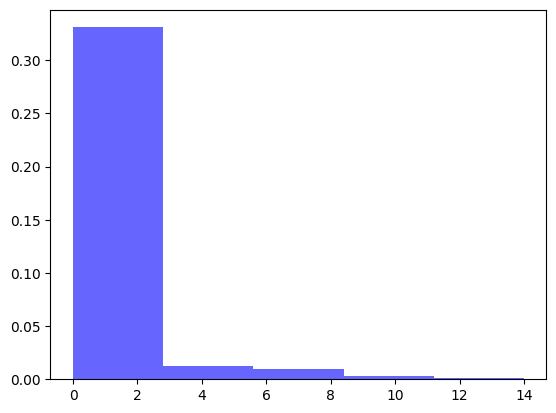

In [21]:
plt.hist(df['dirt_performance'], color='blue', label="First", density=True,alpha=0.6,  bins=5)

In [22]:
len(df)

75712

In [23]:
dlr_df = df.copy()
# drops columns based off threshhold
dlr_df.dropna( axis=1, thresh=len(df) - 10, inplace = True) 
dlr_df.shape
# drops rows if they have NA
dlr_df = dlr_df.dropna()
dlr_df.shape

(75710, 61)

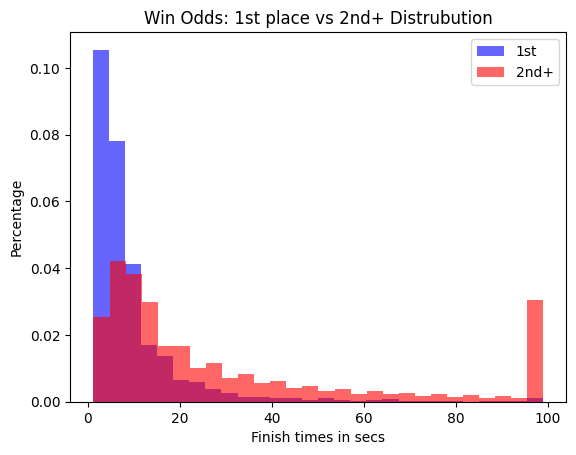

In [24]:
  plt.hist((df[df['result']==1]['win_odds']), color='blue', label="1st", density=True,alpha=0.6,  bins=28)
  plt.hist((df[df['result']>=2]['win_odds']), color='red', label="2nd+", density=True,alpha=0.6, bins=28)

  # plt.hist(dlr_df[dlr_df['result']==3]['finish_time'], color='pink', label="Third", alpha=0.6, bins=8)

  plt.title("Win Odds: 1st place vs 2nd+ Distrubution")
  plt.ylabel("Percentage")
  plt.xlabel("Finish times in secs")
  plt.legend()
  plt.show()

# Data Cleaning/Feature Engineering

In [25]:
# odds = dlr_df.groupby("race_id")["win_odds"].rank("dense").astype(int)
# print(classification_report(dlr_df['result'],odds))

In [26]:
dlr_df.head()

horse_id  race_id  horse_no  result  won  lengths_behind  horse_age  \
0      3917        0         1      10  0.0            8.00          3   
1      2157        0         2       8  0.0            5.75          3   
2       858        0         3       7  0.0            4.75          3   
3      1853        0         4       9  0.0            6.25          3   
4      2796        0         5       6  0.0            3.75          3   

  horse_country horse_type  horse_rating  ...  trainer_win_rate  \
0           AUS    Gelding            60  ...          0.103169   
1            NZ    Gelding            60  ...          0.075445   
2            NZ    Gelding            60  ...          0.067308   
3           SAF    Gelding            60  ...          0.065380   
4            GB    Gelding            60  ...          0.063804   

   Recent_performance_3  first_2_races  rolling_avg_speed  horse_weight  \
0              6.000000              0                0.0         887.0   
1             12.000000              0                0.0         847.0   
2             11.666667              0                0.0         950.0   
3              0.000000              1                0.0         991.0   
4              4.333333              0                0.0         841.0   

   cumulative_races  jockey_win_rate  rolling_win_rate  rolling_place_rate  \
0                 0         0.088235               0.0                 0.0   
1                 0         0.106557               0.0                 0.0   
2                 0         0.057880               0.0                 0.0   
3                 0         0.052925               0.0                 0.0   
4                 0         0.074419               0.0                 0.0   

   rolling_show_rate  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 61 columns]

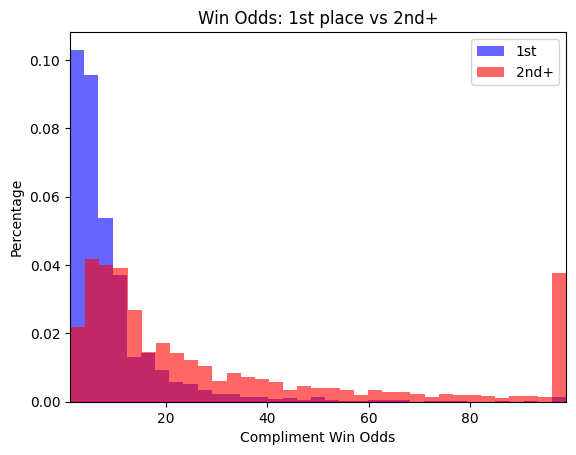

In [27]:
  plt.hist(dlr_df[dlr_df['result']==1]['win_odds'], color='blue', label="1st", density=True,alpha=0.6,  bins=35)
  plt.hist(dlr_df[dlr_df['result']>=2]['win_odds'], color='red', label="2nd+", density=True,alpha=0.6, bins=35)

  # plt.hist(dlr_df[dlr_df['result']==3]['finish_time'], color='pink', label="Third", alpha=0.6, bins=8)

  plt.title("Win Odds: 1st place vs 2nd+")
  plt.ylabel("Percentage")
  plt.xlabel("Compliment Win Odds")
  plt.margins(x=0)
  plt.legend()
  plt.show()

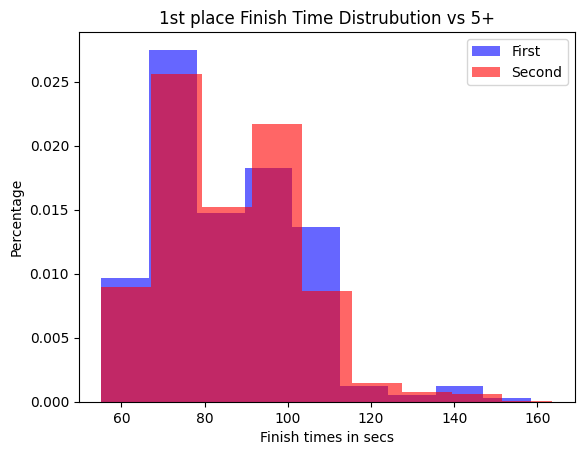

In [28]:
  plt.hist(dlr_df[dlr_df['result']==1]['finish_time'], color='blue', label="First", density=True,alpha=0.6,  bins=9)
  plt.hist(dlr_df[dlr_df['result']>=2]['finish_time'], color='red', label="Second", density=True,alpha=0.6, bins=9)

  # plt.hist(dlr_df[dlr_df['result']==3]['finish_time'], color='pink', label="Third", alpha=0.6, bins=8)

  plt.title("1st place Finish Time Distrubution vs 5+")
  plt.ylabel("Percentage")
  plt.xlabel("Finish times in secs")
  plt.legend()
  plt.show()

In [29]:
ddlr_df = dlr_df.drop(['date','won','horse_no','race_no','horse_id', 'jockey_id','trainer_id',
       'place_combination1', 'place_combination2',
       'place_dividend1', 'place_dividend2', 'win_combination1',
       'win_dividend1','sec_time1', 'sec_time2', 'sec_time3', 'time1_y',
       'time2_y', 'time3_y', 'position_sec1',
       'position_sec2', 'position_sec3', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'time1_x', 'time2_x', 'time3_x', 'lengths_behind'], axis = 1)

categorical_cols = ['horse_type', 
                    'venue',
                    'config', 
                    'going', 
                    'horse_ratings',
                    'horse_country',
                    'race_class']

continuous = ['horse_age',
              'horse_rating',
              'horse_gear',
              'win_odds',
              'place_odds',
              'declared_weight',
              'actual_weight',
              'distance',
              'turf_performance', 
              'dirt_performance',
              'trainer_win_rate',
              'Recent_performance_3',
              'rolling_avg_speed',
              'horse_weight',
              'jockey_win_rate',
              'rolling_win_rate',
              'rolling_place_rate',
              'rolling_show_rate']
ddlr_df.columns

Index(['race_id', 'result', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'finish_time', 'win_odds', 'place_odds', 'venue', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'race_class',
       'turf_performance', 'dirt_performance', 'trainer_win_rate',
       'Recent_performance_3', 'first_2_races', 'rolling_avg_speed',
       'horse_weight', 'cumulative_races', 'jockey_win_rate',
       'rolling_win_rate', 'rolling_place_rate', 'rolling_show_rate'],
      dtype='object')

In [30]:
def catagorize(df):
    for col in categorical_cols:
        df[col] = df[col].astype('category')
    return df

In [31]:
# df_keep_cata = catagorize(df_keep_cata)

In [32]:
df_keep_cata = ddlr_df.copy()

In [33]:
ddlr_df = pd.get_dummies(ddlr_df,columns=categorical_cols)


In [34]:
ddlr_df.head()

race_id  result  horse_age  horse_rating  horse_gear  declared_weight  \
0        0      10          3            60           0           1020.0   
1        0       8          3            60           0            980.0   
2        0       7          3            60           0           1082.0   
3        0       9          3            60           0           1118.0   
4        0       6          3            60           0            972.0   

   actual_weight  draw  finish_time  win_odds  ...  race_class_0  \
0            133     7        83.92       9.7  ...             0   
1            133    12        83.56      16.0  ...             0   
2            132     8        83.40       3.5  ...             0   
3            127    13        83.62      39.0  ...             0   
4            131    14        83.24      50.0  ...             0   

   race_class_1  race_class_2  race_class_3  race_class_4  race_class_5  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   
3             0             0             0             0             1   
4             0             0             0             0             1   

   race_class_6  race_class_11  race_class_12  race_class_13  
0             0              0              0              0  
1             0              0              0              0  
2             0              0              0              0  
3             0              0              0              0  
4             0              0              0              0  

[5 rows x 107 columns]

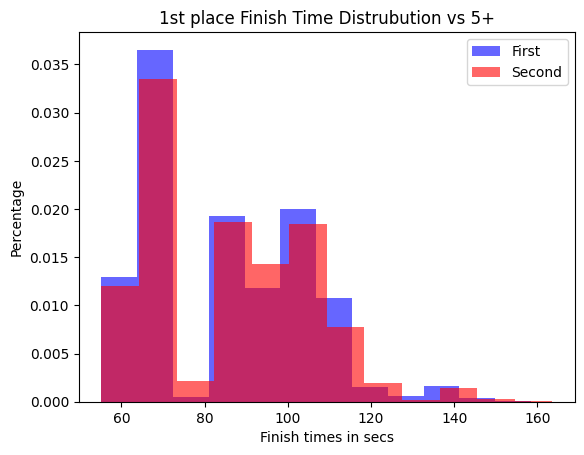

In [35]:
  plt.hist(ddlr_df[ddlr_df['result']==1]['finish_time'], color='blue', label="First", density=True,alpha=0.6,  bins=12)
  plt.hist(ddlr_df[ddlr_df['result']>=2]['finish_time'], color='red', label="Second", density=True,alpha=0.6, bins=12)

  # plt.hist(ddlr_df[ddlr_df['result']==3]['finish_time'], color='pink', label="Third", alpha=0.6, bins=8)

  plt.title("1st place Finish Time Distrubution vs 5+")
  plt.ylabel("Percentage")
  plt.xlabel("Finish times in secs")
  plt.legend()
  plt.show()

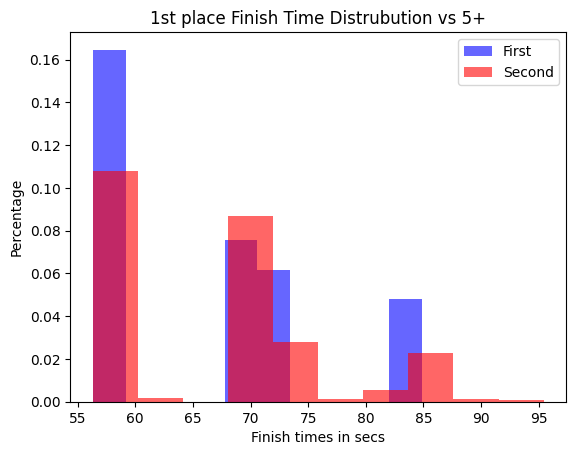

In [36]:
class_1 = ddlr_df.query('race_class_6 == 1')
plt.hist(class_1[class_1['result']==1]['finish_time'], color='blue', label="First", density=True,alpha=0.6,  bins=10)
plt.hist(class_1[class_1['result']>=2]['finish_time'], color='red', label="Second", density=True,alpha=0.6, bins=10)

plt.title("1st place Finish Time Distrubution vs 5+")
plt.ylabel("Percentage")
plt.xlabel("Finish times in secs")
plt.legend()
plt.show()

In [37]:
dlr_df.groupby('race_class')['finish_time'].mean().reset_index()

race_class  finish_time
0           0    80.264854
1           1    86.347938
2           2    85.387630
3           3    83.501175
4           4    84.157100
5           5    90.392773
6           6    67.190084
7          11   103.477190
8          12    89.012379
9          13    89.742084

In [38]:
df_onevsall = ddlr_df.copy()
df_top3vsall = ddlr_df.copy()
df_onevsall["result"] = (df_onevsall.result == 1).astype(int)
df_onevsall.drop(["finish_time"], axis=1, inplace=True)
ovaoddscheck = df_onevsall[df_onevsall['race_id'] >= 4761]['win_odds'].eq(df_onevsall[df_onevsall['race_id'] >= 4761].groupby('race_id').win_odds.transform('max')).astype(int)
alloddscheck = ddlr_df[ddlr_df['race_id'] >= 4761].groupby("race_id")["win_odds"].rank("dense").astype(int)

Finish time for regression, result for classification

## Datasets


## Setting A Baseline

Consider a horse race with $N$ participants, each denoted as $x_{i}$. If a horse is selected randomly, the probability of correctly predicting its placement is $\frac{1}{N}$. The probability of $x_{i}$ is represented as $P(x_{i})$. Therefore, the expected True Positive rate (TP), the probability of a correct prediction for $x_{i}$'s placement, is $\frac{1}{N}P(x_{i})$.

Simultaneously, the False Negative rate (FN), the probability of an incorrect prediction for $x_{i}$'s placement, would be equal to $(1 - \frac{1}{N})P(x_{i})$.

For performance metrics, recall serves as an indicator of the proportion of actual $x_{i}$ instances that were correctly identified. More formally, it is defined as the ratio of True Positives to the sum of True Positives and False Negatives.

Substituting the expressions for TP and FN into this formula, we get:

$$\frac{\frac{1}{N}P(x_{i})}{\frac{1}{N} P(x_{i}) + (1 - \frac{1}{N}) P(x_{i})}$$

This simplifies to:
$$\frac{\frac{1}{N}}{\frac{1}{N} + (1 - \frac{1}{N})}$$

Simplifying this expression further, we find that the $P(x_{i})$ terms cancel out, resulting in the formula for recall simplifying to $\frac{1}{N}$.


Likewise, precision measures the proportion of instances that were correctly identified as $x_{i}$ out of all instances that were predicted to be $x_{i}$. More formally, it is defined as the ratio of True Positives to the sum of True Positives and False Positives (FP). Here, a False Positive represents an event where we incorrectly assign a specific placement to $x_{i}$ when it actually corresponds to a different placement which is equal to $\frac{1}{N}(1 - P(x_{i})$

Substituting the expressions for TP and FP into this formula, we get:

$$\frac{\frac{1}{N}P(x_{i})}{\frac{1}{N}P(x_{i}) + \frac{1}{N}(1 - P(x_{i})}$$

Again, simplifying this expression, the $\frac{1}{N}$ terms cancel out, resulting in the formula for precision simplifying to $P(x_{i})$.

Given that a typical horse race consists of around 14 horses, we can approximate $\frac{1}{N}$ as $\frac{1}{14} \approx 0.07$.

It's also important to note that not all predictions are uniformly distributed across the test set of 15832 values due to dropped NaNs. The following table demonstrates the precision, recall, and support (number of instances of each placement in our dataset) for each placement:

| Placement | Expected Precision | Expected Recall | Support |
|-----------|-----------|--------|---------|
| 1         | 0.08      | 0.07   | 1271    |
| 2         | 0.08      | 0.07   | 1274    |
| 3         | 0.08      | 0.07   | 1276    |
| 4         | 0.08      | 0.07   | 1266    |
| 5         | 0.08      | 0.07   | 1267    |
| 6         | 0.08      | 0.07   | 1266    |
| 7         | 0.08      | 0.07   | 1264    |
| 8         | 0.08      | 0.07   | 1253    |
| 9         | 0.08      | 0.07   | 1241    |
| 10        | 0.08      | 0.07   | 1225    |
| 11        | 0.07      | 0.07   | 1175    |
| 12        | 0.07      | 0.07   | 1076    |
| 13        | 0.03      | 0.07   | 531     |
| 14        | 0.03      | 0.07   | 447     |


Likewise, for trying to predict strictly first place, the following table would represent the expected precision, recall, and support for both first place and others.

| Placement | Expected Precision | Expected Recall | Support |
|-----------|-----------|--------|---------|
| 0         | 0.92      | 0.50   | 141561  |
| 1         | 0.08      | 0.50   | 1271    |


For models that are trying to predict the placement of all horses, the following percentages will be calcuated: win rate, place rate, show rate, trifecta rate, quinella rate, exacta rate, and boxed trifecta rate.

For their expected percentages, 

Win rate: $\frac{1}{14}  \approx$ 0.07

Place rate: $\frac{2}{14}$ $\approx$ 0.14

Show rate: $\frac{2}{4} \approx$ 0.21

The geometric mean was chosen for an "all around" baseline due to the problem of classification models predicting on each horse independently resulting in repeat position predictions which could lead to inflated values for win, place, show, quinella, and boxed trifecta. This can be somewhat alleviated by using the geometric mean instead of the arithmetic mean. 

For example, suppose there is a model that has a place rate of 1.0 but an exacta rate of a 0.01. This would indicate that the model is most likely classifying a large majority of the horses as first place but almost none correctly as second place. If the arithmetic mean was used then the result would be $\frac{1.0 + 0.01}{2} = 0.505$ while the geometric mean would have $1.0 \cdot 0.01 =  0.01$ which is a more accurate representation of the performance of the model regarding these two metrics.

In [39]:
# Test Train Split based off of race_id

# Train
gss = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42).split(ddlr_df, groups=ddlr_df['race_id'])
X_train_inds, X_test_inds = next(gss)
train_data = ddlr_df.iloc[X_train_inds]
TrainX = train_data.loc[:, ~train_data.columns.isin(['race_id','result','finish_time'])]
TrainYClass = train_data.loc[:, train_data.columns.isin(['result'])]
TrainYReg = train_data.loc[:, train_data.columns.isin(['finish_time'])]
TrainYOVA = (TrainYClass.result == 1).astype(int)

# Eval sets
gss2 = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42).split(train_data, groups=train_data['race_id'])
X_train_val_inds, X_eval_inds = next(gss2)
train_val_data = train_data.iloc[X_train_val_inds]
eval_data = train_data.iloc[X_eval_inds]
TrainXNN = train_val_data.loc[:, ~train_val_data.columns.isin(['race_id','result','finish_time'])]
TrainYClassNN = train_val_data.loc[:, train_val_data.columns.isin(['result'])]
TrainYRegNN = train_val_data.loc[:, train_val_data.columns.isin(['finish_time'])]
TrainYOVANN = (TrainYClassNN.result == 1).astype(int)

EvalX = eval_data.loc[:, ~eval_data.columns.isin(['race_id','result','finish_time'])]
EvalY = eval_data.loc[:, eval_data.columns.isin(['result','race_id'])]
EvalYOVA = (EvalY.result == 1).astype(int)
EvalReg = eval_data.loc[:, eval_data.columns.isin(['finish_time'])]


# Test sets
test_data= ddlr_df.iloc[X_test_inds]

#We need to keep the id for later predictions
X_test = test_data.loc[:, ~test_data.columns.isin(['race_id','result','finish_time'])]
TestYClass = test_data.loc[:, test_data.columns.isin(['result','race_id'])]
Y_test_reg = test_data.loc[:, test_data.columns.isin(['finish_time','result','race_id'])]
TestYClassOVA = (TestYClass.result == 1).astype(int)
# print(TrainX_.head())
# print(TrainX_.head())
# print(TrainYReg_) 
# print(TrainYOVA_.head(12)) 

In [40]:
train_data_cat = df_keep_cata.iloc[X_train_inds]
test_data_cat = df_keep_cata.iloc[X_test_inds]
train_val_cat_data = train_data_cat.iloc[X_train_val_inds]
eval_cat_data = train_data_cat.iloc[X_eval_inds]

# Training for CatBoost
TrainXCat = train_val_cat_data.loc[:, ~train_val_cat_data.columns.isin(['race_id','result','finish_time'])]
TrainYCatClass = train_val_cat_data.loc[:, train_val_cat_data.columns.isin(['result'])]
TrainYCatReg = train_val_cat_data.loc[:, train_val_cat_data.columns.isin(['finish_time'])]
TrainYCatOVA = (TrainYCatClass.result == 1).astype(int)

# Eval for CatBoost
EvalXCat = eval_cat_data.loc[:, ~eval_cat_data.columns.isin(['race_id','result','finish_time'])]
EvalYCat = eval_cat_data.loc[:, eval_cat_data.columns.isin(['result','race_id'])]
EvalRegCat = eval_cat_data.loc[:, eval_cat_data.columns.isin(['finish_time'])]

# Testing for CatBoost 
X_testCat = test_data_cat.loc[:, ~test_data_cat.columns.isin(['race_id','result','finish_time'])]

In [41]:
train_data_cat.query('result == 13').groupby('race_class')['finish_time'].mean().reset_index()

race_class  finish_time
0           0    71.930000
1           1    88.623585
2           2    87.079330
3           3    85.175627
4           4    86.317093
5           5    93.157130
6           6    71.186250
7          11   104.982500
8          12    89.783000
9          13    87.585588

In [42]:
balancer = RandomOverSampler(random_state=42)
TrainXOVABalanced, TrainYOVABalanced = balancer.fit_resample(TrainX, TrainYOVA)
TrainXOVABalanced = pd.DataFrame(TrainXOVABalanced, columns=TrainX.columns)
TrainYOVABalanced = pd.DataFrame(TrainYOVABalanced, columns=["result"])
TrainXOVABalanced.shape, TrainYOVABalanced.shape

((111448, 104), (111448, 1))

In [43]:
TrainXOVABalancedNN, EvalXOVABalanced, TrainYOVABalancedNN, EvalYOVABalanced, = train_test_split(TrainXOVABalanced, TrainYOVABalanced,random_state=42, stratify=TrainYOVABalanced)

In [44]:
TrainXCatOVABalance, TrainYCatOVABalance = balancer.fit_resample(TrainXCat, TrainYCatOVA)
TrainXCatOVABalance.shape, TrainYCatOVABalance.shape

((89168, 29), (89168,))

In [45]:
TrainXCatOVABalancedNN, EvalXCatOVABalanced, TrainYCatOVABalancedNN, EvalYCatOVABalanced, = train_test_split(TrainXCatOVABalance, TrainYCatOVABalance,random_state=42, stratify=TrainYCatOVABalance)

In [46]:
TrainXCat = catagorize(TrainXCat)
EvalXCat = catagorize(EvalXCat)
catxtest = catagorize(X_testCat)
TrainXCatOVABalancedNN = catagorize(TrainXCatOVABalancedNN)
EvalXCatOVABalanced = catagorize(EvalXCatOVABalanced)
cat_features = [TrainXCat.columns.get_loc(col) for col in categorical_cols]

In [47]:
alloddscheck

59410     9
59411     1
59412     9
59413     9
59414     6
         ..
75707     6
75708    10
75709     3
75710     8
75711    10
Name: win_odds, Length: 16302, dtype: int32

In [48]:
TrainX.dtypes

horse_age            int64
horse_rating         int64
horse_gear           int32
declared_weight    float64
actual_weight        int64
                    ...   
race_class_5         uint8
race_class_6         uint8
race_class_11        uint8
race_class_12        uint8
race_class_13        uint8
Length: 104, dtype: object

In [49]:
# print(classification_report(TestYClassOVA,ovaoddscheck, zero_division=0))

In [50]:
# print(classification_report(TestYClass['result'],alloddscheck, zero_division=0))

(array([0.03450595, 0.02301865, 0.01143446, 0.0071669 , 0.00474906,
        0.00304909, 0.00277457, 0.00207432, 0.0016207 , 0.01185578]),
 array([ 1.2 , 10.98, 20.76, 30.54, 40.32, 50.1 , 59.88, 69.66, 79.44,
        89.22, 99.  ]),
 <BarContainer object of 10 artists>)

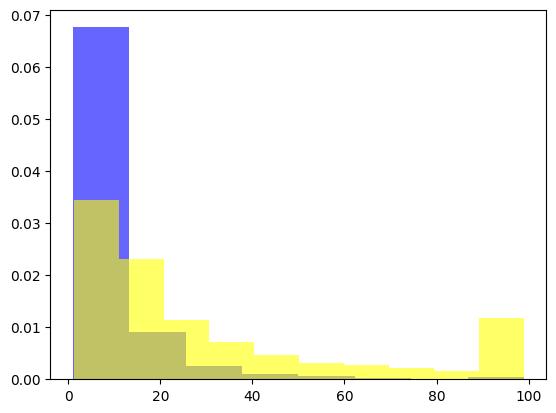

In [51]:
  plt.hist(dlr_df[dlr_df['result']==1]['win_odds'], color='blue', label="First", density=True,alpha=0.6,  bins=8)
  plt.hist(dlr_df[dlr_df['result']>=2]['win_odds'], color='yellow', label="Second", density=True,alpha=0.6, bins=10)

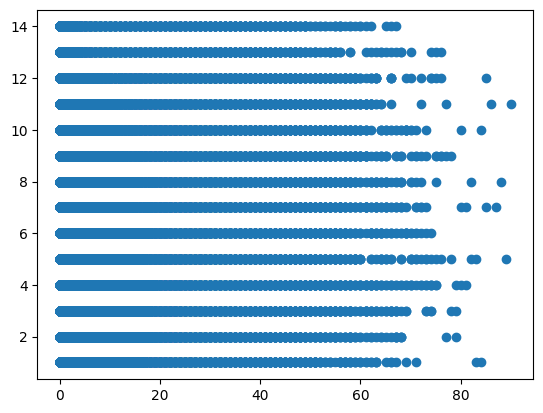

In [52]:
plt.scatter(dlr_df['cumulative_races'], dlr_df['result'])

In [53]:
# asdf = dlr_df.corr()
# fig, ax = plt.subplots(figsize=(10,12))
# sns.heatmap(asdf, annot=True)

In [54]:
def BettingResults(y_pred, output=False):
    df = TestYClass
    df['prediction'] = y_pred

    total_races = df['race_id'].nunique()
    accuracies = {}

    # Win
    win_correct = sum(df[df['result'] == 1]['prediction'] == 1)
    accuracies['win'] = win_correct / total_races

    # Place
    place_correct = sum(df[df['result'] <= 2].groupby('race_id')['prediction'].min() <= 2)
    accuracies['place'] = place_correct / total_races

    # Show
    show_correct = sum(df[df['result'] <= 3].groupby('race_id')['prediction'].min() <= 3)
    accuracies['show'] = show_correct / total_races
    
    # Filter rows where 'prediction' equals 'result' and 'result' is either 1 or 2
    exacta_df = df[(df['prediction'] == df['result']) & (df['result'] <= 2)]

    # Count the number of matching pairs per race_id
    matched_counts = exacta_df.groupby('race_id').size()

    # Count the number of 'race_id's with exactly 2 matching rows
    exacta_correct = sum(matched_counts == 2)

    # Calculate exacta accuracy
    accuracies['exacta'] = exacta_correct / total_races

    # Quinella
    quinella_df = df[(df['prediction'] <= 2) & (df['result'] <= 2)]
    # Count the number of matching pairs per race_id
    matched_counts = quinella_df.groupby('race_id').size()

    # Count the number of 'race_id's with exactly 2 matching rows
    quinella_correct = sum(matched_counts == 2)

    # Calculate quinella accuracy
    accuracies['quinella'] = quinella_correct / total_races

    # Trifecta
    # Filter rows where 'prediction' equals 'result' and 'result' is either 1, 2, or 3
    trifecta_df = df[(df['prediction'] == df['result']) & (df['result'] <= 3)]

    # Count the number of matching pairs per race_id
    matched_counts = trifecta_df.groupby('race_id').size()

    # Count the number of 'race_id's with exactly 3 matching rows
    trifecta_correct = sum(matched_counts == 3)

    # Calculate trifecta accuracy
    accuracies['trifecta'] = trifecta_correct / total_races

    boxed_trifecta = df[(df['prediction'] <= 3) & (df['result'] <= 3)]
    # Count the number of matching pairs per race_id
    matched_counts = boxed_trifecta.groupby('race_id').size()

    # Count the number of 'race_id's with exactly 2 matching rows
    boxed_trifecta_correct = sum(matched_counts == 3)

    # Calculate quinella accuracy
    accuracies['boxed trifecta'] = boxed_trifecta_correct / total_races
    
    # Calculate the geometric mean
    accuracies['Geometric Mean'] = scipy.stats.gmean(list(accuracies.values()))
    
    if output:
        return accuracies

    for key, value in accuracies.items():
        print("{}: {}".format(key, value))
        

In [55]:
def RegResults(prediction, results=True):
    df_dummy = Y_test_reg.copy()
    df_dummy['pred'] = prediction
    df_dummy['result_pred'] = df_dummy.groupby('race_id')['pred'].rank('dense').astype(int)
    if results:
        print(classification_report(TestYClass['result'], df_dummy['result_pred']))
        print('\n')
        BettingResults(df_dummy['result_pred'])
    else:
        return df_dummy['result_pred'].reset_index(drop=True)

In [58]:
ovaoddscheck = test_data[['win_odds','place_odds','race_id']].copy()
ovaoddscheck['total_odds'] = ovaoddscheck['win_odds'] + ovaoddscheck['place_odds']
ovaoddscheck = ovaoddscheck['total_odds'].eq(ovaoddscheck.groupby('race_id').total_odds.transform('max')).astype(int)
alloddscheck = pd.concat([test_data['race_id'], X_test['win_odds']], axis=1)
alloddscheck = alloddscheck.groupby("race_id")["win_odds"].rank("dense").astype(int)

In [59]:
odds_test = pd.concat([test_data['race_id'], X_test['win_odds'] + X_test['place_odds']], axis=1)
odds_test = odds_test.groupby("race_id")[0].rank("dense").astype(int)


In [60]:
print(classification_report(TestYClass['result'],odds_test))
BettingResults(odds_test)

              precision    recall  f1-score   support

           1       0.29      0.29      0.29      1211
           2       0.17      0.17      0.17      1212
           3       0.12      0.12      0.12      1214
           4       0.11      0.11      0.11      1209
           5       0.11      0.12      0.11      1208
           6       0.12      0.12      0.12      1209
           7       0.10      0.10      0.10      1202
           8       0.11      0.11      0.11      1201
           9       0.11      0.11      0.11      1188
          10       0.14      0.14      0.14      1165
          11       0.15      0.15      0.15      1135
          12       0.18      0.17      0.17      1026
          13       0.18      0.18      0.18       526
          14       0.28      0.23      0.25       432

    accuracy                           0.15     15138
   macro avg       0.15      0.15      0.15     15138
weighted avg       0.15      0.15      0.15     15138

win: 0.29256198347107437


In [62]:
ovaoddscheck.head()

107    0
108    0
109    0
110    0
111    0
Name: total_odds, dtype: int32

In [64]:
print(classification_report(ovaoddscheck,TestYClassOVA))
print(roc_auc_score(ovaoddscheck,TestYClassOVA))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     13911
           1       0.01      0.01      0.01      1227

    accuracy                           0.84     15138
   macro avg       0.46      0.46      0.46     15138
weighted avg       0.84      0.84      0.84     15138

0.4613511426727965


In [ ]:
print('testz')

In [ ]:
data = {'bet_type': ['win', 'place', 'show', 'exacta', 'quinella', 'trifecta', 'boxed trifecta']}
bet_type_results = pd.DataFrame(data)
bet_type_results.head()

In [ ]:
def add_betting_results(y_pred, model, reg=False, bet_type_results=bet_type_results):
    if reg:
        results = RegResults(y_pred, results=False)['result_pred']
        results = BettingResults(results, output=True)
    else:
        results = BettingResults(y_pred, output=True)
    temp_df = pd.DataFrame(list(results.items()), columns=['bet_type', model])
       
    df = bet_type_results.merge(temp_df, on='bet_type')
    return df


In [ ]:
profile = ProfileReport()
profile.config.interactions.targets = ['result','finish_time']

In [ ]:
ddlr_df.query('cumulative_races > 5 & rolling_win_rate > 0.5').sort_values('rolling_win_rate',ascending=False)[['cumulative_races','rolling_win_rate']]

In [ ]:
ddlr_df['rolling_win_rate'].median()

In [ ]:
ProfileReport(ddlr_df)

In [ ]:
# ProfileReport(df)

In [ ]:
df.race_class.nunique()

In [ ]:
# ProfileReport(train_data)

In [ ]:
# ProfileReport(train_val_cat_data)

In [ ]:
plt.scatter(TrainX['distance'],TrainYReg)
plt.show()

# Regression

## Least Squares Regression

$$\text{finish_time} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon$$

$\text{finish_time}$ is the dependent variable (time it takes for a horse to finish the race)
$x_1, x_2, \cdots, x_p$ are the independent variables (features such as horse age, weight, speed, etc.)
$\beta_0$ is the intercept
  $\beta_1, \beta_2, \cdots, \beta_p$ are the coefficients for the independent variables
  $\epsilon$ is the error term

$$\boldsymbol{\beta} = (X^TX)^{-1}X^Ty$$

where:

  $\boldsymbol{\beta}$ is the column vector of coefficients $(\beta_0, \beta_1, \cdots, \beta_p)^T$ of dimensions $((p+1) \times 1)$
  $X$ is the matrix of independent variables with dimensions $(n \times (p+1))$
  $y$ is the column vector of 'finish_time' values with dimensions $(n \times 1)$
  $X^T$ denotes the transpose of matrix $X$
  $(X^TX)^{-1}$ denotes the inverse of the matrix $X^TX$

Applying the normal equation, we can obtain the optimal coefficients $\boldsymbol{\beta}$ that minimize the sum of squared residuals. Once we have these coefficients, we can use them to predict the 'finish_time' for new races by plugging the independent variables of new samples into the linear regression equation:

$$\text{finish_time}_\text{predicted} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p$$

In [164]:
x_numpy = TrainX.to_numpy().astype('float32')
y_numpy = TrainYReg.to_numpy()
x_test_numpy = X_test.to_numpy()
X = np.hstack((np.ones((x_numpy.shape[0], 1)), x_numpy))
XT=x_numpy.T
XTX=XT@x_numpy

inv=np.linalg.pinv(XTX)

theta=(inv@XT)@y_numpy
y_hat = np.matmul(x_test_numpy,theta)

In [165]:
y_hat

array([[143.44219156],
       [144.36005617],
       [140.24801864],
       ...,
       [123.49668377],
       [121.52569212],
       [119.56020173]])

In [166]:
RegResults(y_hat)

              precision    recall  f1-score   support

           1       0.06      0.06      0.06      1211
           2       0.07      0.07      0.07      1212
           3       0.08      0.08      0.08      1214
           4       0.08      0.08      0.08      1209
           5       0.08      0.08      0.08      1208
           6       0.08      0.08      0.08      1209
           7       0.08      0.08      0.08      1202
           8       0.07      0.07      0.07      1201
           9       0.09      0.09      0.09      1188
          10       0.07      0.07      0.07      1165
          11       0.09      0.09      0.09      1135
          12       0.08      0.08      0.08      1026
          13       0.08      0.08      0.08       526
          14       0.07      0.07      0.07       432

    accuracy                           0.08     15138
   macro avg       0.08      0.08      0.08     15138
weighted avg       0.08      0.08      0.08     15138



win: 0.0603305785123967

## Elastic Net Regression

In [167]:
enet_cv = sklearn.linear_model.ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5,n_jobs=-1)

# Fit the model to the training data
enet_cv.fit(TrainX,TrainYReg)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_jobs=-1)

In [168]:
enet_pred = enet_cv.predict(X_test)
df_encv = RegResults(enet_pred)

              precision    recall  f1-score   support

           1       0.16      0.16      0.16      1211
           2       0.14      0.14      0.14      1212
           3       0.11      0.11      0.11      1214
           4       0.10      0.10      0.10      1209
           5       0.10      0.10      0.10      1208
           6       0.10      0.10      0.10      1209
           7       0.10      0.10      0.10      1202
           8       0.09      0.09      0.09      1201
           9       0.10      0.10      0.10      1188
          10       0.12      0.12      0.12      1165
          11       0.14      0.14      0.14      1135
          12       0.16      0.16      0.16      1026
          13       0.16      0.16      0.16       526
          14       0.21      0.21      0.21       432

    accuracy                           0.12     15138
   macro avg       0.13      0.13      0.13     15138
weighted avg       0.12      0.12      0.12     15138



win: 0.1578512396694215

In [262]:
def objective(trial):
    params = {
        "l1_ratio": trial.suggest_float("l1_ratio", 1e-3, 1, log=True),
        "alpha": trial.suggest_float("alpha", 1e-6,1, log=True),
        "max_iter": trial.suggest_int("max_iter", 50,2000),
        "random_state": 42,
    }
    
    model = sklearn.linear_model.ElasticNet(**params)
    model.fit(TrainXNN, TrainYRegNN)
    y_pred = model.predict(EvalX)
    return mean_squared_error(EvalReg, y_pred, squared=False)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


encv_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 1.0305603185102954
  Params: 
    l1_ratio: 0.0011986037171731426
    alpha: 0.0009649887771021301
    max_iter: 214


In [169]:
# Run this to skip hyperparameter tuning
encv_params = {'l1_ratio': 0.0011986037171731426,
    'alpha': 0.0009649887771021301,
    'max_iter': 214}

In [170]:
model = sklearn.linear_model.ElasticNet(**encv_params, random_state=42)
model.fit(TrainXNN, TrainYRegNN)
enet_pred = model.predict(X_test)
RegResults(enet_pred)

              precision    recall  f1-score   support

           1       0.21      0.21      0.21      1211
           2       0.14      0.14      0.14      1212
           3       0.13      0.13      0.13      1214
           4       0.09      0.09      0.09      1209
           5       0.10      0.10      0.10      1208
           6       0.12      0.12      0.12      1209
           7       0.10      0.10      0.10      1202
           8       0.10      0.10      0.10      1201
           9       0.11      0.11      0.11      1188
          10       0.13      0.13      0.13      1165
          11       0.13      0.13      0.13      1135
          12       0.17      0.17      0.17      1026
          13       0.16      0.16      0.16       526
          14       0.26      0.26      0.26       432

    accuracy                           0.13     15138
   macro avg       0.14      0.14      0.14     15138
weighted avg       0.13      0.13      0.13     15138



win: 0.2082644628099173

## Logistic Regression

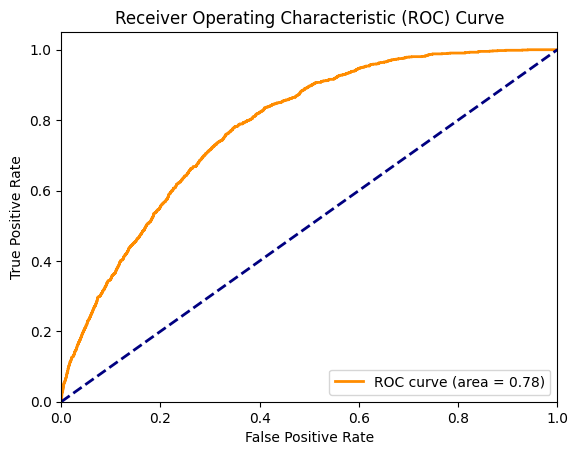

In [196]:
logreg = sklearn.linear_model.LogisticRegression()

# param_grid = {'n_estimators': n_estimators,
#               'learning_rate': learning_rate}

              
logreg.fit(TrainXOVABalanced, TrainYOVABalanced)

# Predict the probabilities for the test data
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(TestYClassOVA, y_pred_proba.ravel())
roc_auc = sklearn.metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [203]:
log_out_of_box = logreg.predict(X_test)
print(classification_report(TestYClassOVA,log_out_of_box))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74     14561
           1       0.15      0.82      0.26      1271

    accuracy                           0.62     15832
   macro avg       0.56      0.71      0.50     15832
weighted avg       0.91      0.62      0.70     15832



In [202]:
log_prob = logreg.predict_proba(X_test)
print(roc_auc_score(TestYClassOVA,log_prob[:,1]))

0.779960491772019


Inital params used and later fine tuned further:

``param_grid = [    
    {'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]``


In [65]:
param_grid = [    
    {'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

        

grid_search = GridSearchCV(sklearn.linear_model.LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_params = grid_search.fit(TrainXOVABalanced,TrainYOVABalanced)

best_params.best_estimator_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


LogisticRegression(C=0.00026366508987303583)

In [66]:
log_bal_params = best_params.best_params_
print(log_bal_params)

{'C': 0.00026366508987303583, 'max_iter': 100, 'solver': 'lbfgs'}


In [70]:
best_log = sklearn.linear_model.LogisticRegression(**log_bal_params)
best_log.fit(TrainX, TrainYOVA)
tester = best_log.predict_proba(X_test)
print(roc_auc_score(TestYClassOVA,tester[:,1]))

0.7795498910657253


In [72]:
best_log = sklearn.linear_model.LogisticRegression(**log_bal_params)
best_log.fit(TrainXOVABalanced, TrainYOVABalanced)
tester = best_log.predict_proba(X_test)
print(roc_auc_score(TestYClassOVA,tester[:,1]))

0.7782780501097124


In [189]:
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-8, 100.0, log=True),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "newton-cg", "liblinear"]),
        "max_iter": trial.suggest_int("max_iter", 100, 5000),
        "warm_start": trial.suggest_categorical("warm_start", [True, False]),
        "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }
    
    model = LogisticRegression(**params)
    model.fit(TrainXNN, TrainYOVANN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA, y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


log_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.780003239001277
  Params: 
    C: 4.134017048575714e-05
    solver: liblinear
    max_iter: 2496
    warm_start: False
    fit_intercept: False


In [190]:
# Run this to skip hyperparameter tuning
log_params= {"C":4.134017048575714e-05,
        "solver":'liblinear',
        "max_iter": 2496,
        "warm_start": False,
        "fit_intercept": False,
        "random_state": 42,
        "n_jobs": -1}

In [191]:
temp = LogisticRegression(**log_params)
temp.fit(TrainXNN, TrainYOVANN)
y_temp = temp.predict(X_test)
y_prob = temp.predict_proba(X_test)
print(classification_report(TestYClassOVA, y_temp))
print(roc_auc_score(TestYClassOVA, y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.7775963696986239


In [192]:
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-8, 1000.0, log=True),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "newton-cg", "liblinear"]),
        "max_iter": trial.suggest_int("max_iter", 100, 5000),
        "warm_start": trial.suggest_categorical("warm_start", [True, False]),
        "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }
    
    model = LogisticRegression(**params)
    model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA, y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


log_bal_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.778863018008847
  Params: 
    C: 2.2822634098451283e-06
    solver: newton-cg
    max_iter: 4012
    warm_start: False
    fit_intercept: False


In [ ]:
# Run this to skip hyperparameter tuning
log_bal_params = {'C':2.2822634098451283e-06
        'solver': 'newton-cg'
        'max_iter': 4012
        'warm_start': False
        'fit_intercept': False}

In [194]:
temp = LogisticRegression(**log_bal_params)
temp.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
y_temp = temp.predict(X_test)
y_proba = temp.predict_proba(X_test)
print(classification_report(TestYClassOVA, y_temp))
print(roc_auc_score(TestYClassOVA, y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.54      0.69     13927
           1       0.14      0.85      0.24      1211

    accuracy                           0.56     15138
   macro avg       0.56      0.69      0.47     15138
weighted avg       0.91      0.56      0.66     15138

0.7753974555421904


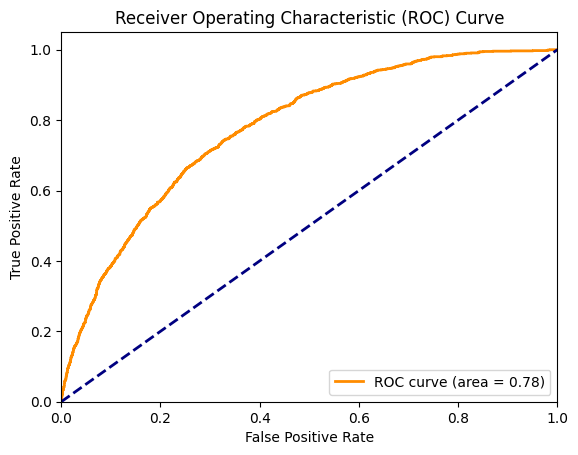

In [197]:

# Calculate the ROC curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(TestYClassOVA, y_prob[:,1])
roc_auc = sklearn.metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [200]:
feature_coef = temp.coef_[0]

abs_coef = np.abs(feature_coef)

# Create a dictionary to store column names and their corresponding absolute coefficients
coef_dict = dict(zip(TrainXOVABalanced.columns, abs_coef))

# Sort the dictionary by absolute coefficient values in descending order
sorted_coef = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted coefficients
for col, coef in sorted_coef:
    print(f"{col}: {coef:.4f}")


win_odds: 0.0503
place_odds: 0.0121
Recent_performance_3: 0.0111
cumulative_races: 0.0084
turf_performance: 0.0076
draw: 0.0035
horse_gear: 0.0020
horse_age: 0.0017
rolling_show_rate: 0.0013
rolling_place_rate: 0.0011
horse_rating: 0.0009
rolling_win_rate: 0.0008
dirt_performance: 0.0007
horse_weight: 0.0006
declared_weight: 0.0005
horse_country_AUS: 0.0004
horse_country_GB: 0.0003
venue_ST: 0.0003
venue_HV: 0.0003
horse_country_NZ: 0.0002
rolling_avg_speed: 0.0002
race_class_4: 0.0002
horse_ratings_60-40: 0.0002
horse_ratings_G: 0.0001
going_GOOD: 0.0001
horse_type_Gelding: 0.0001
surface: 0.0001
race_class_2: 0.0001
horse_type_Horse: 0.0001
actual_weight: 0.0001
horse_ratings_105-80: 0.0001
horse_country_IRE: 0.0001
horse_type_Brown: 0.0001
race_class_5: 0.0001
horse_country_GER: 0.0001
first_2_races: 0.0001
race_class_11: 0.0001
race_class_12: 0.0001
horse_country_FR: 0.0001
going_GOOD TO YIELDING: 0.0001
horse_country_SAF: 0.0000
race_class_13: 0.0000
horse_ratings_100-80: 0.0000
h

In [ ]:
TrainXOVA[continuous] = yeojohnson_data
TrainXOVA = TrainXOVA / TrainXOVA.max()
TrainXOVA.fillna(0)
logreg.fit(TrainXOVA, TrainYClassOVA)

# Predict the probabilities for the test data
y_pred_proba = logreg.predict_proba(TestXOVA)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(TestYClassOVA, y_pred_proba.ravel())
roc_auc = sklearn.metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost Regression

In [100]:
# Note the process is more convluated than needed to test intergrating optuna both as a function and functions interacting with optuna

In [173]:
trainxgb = xgb.DMatrix(TrainXCat,label=TrainYRegNN, enable_categorical=True)
evalsxgb = xgb.DMatrix(EvalXCat,label=EvalReg, enable_categorical=True)
testxgb = xgb.DMatrix(catxtest, enable_categorical=True)

def xgb_reg(trial: Trial, trainx,evals):
    param = {
        "objective": "reg:squarederror",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        'gpu_id': 0,
        'random_state': 42,
        'eval_metric': 'rmse'
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
    model = xgb.train(param,trainx, evals=[(evals, "validation")], verbose_eval=0)
    y_pred = model.predict(evals)
    return mean_squared_error(EvalReg, y_pred, squared=False)
# Create a study to optimize the hyperparameters
def tune_reg(train,evals, model):
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    study = optuna.create_study(
        pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3), direction="minimize")
    study = optuna.create_study(direction="minimize")
    study.optimize(
            lambda trial: model(
                trial, train, evals),
                   n_trials=1500, show_progress_bar=True)
    return study
    
def study_results(study):
    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    
def test_reg_model(model, params, trainx, evals, testx, output = False):
    temp = model.train(params, trainx,evals=[(evals, "validation")], verbose_eval=0)
    y_pred = temp.predict(testx)
    RegResults(y_pred)

In [183]:
xbg_all_study = tune_reg(trainxgb,evalsxgb, xgb_reg)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [184]:
study_results(xbg_all_study)
xbg_all_study = xbg_all_study.best_trial.params

Number of finished trials: 1500
Best trial:
  Value: 0.9657125284023589
  Params: 
    booster: dart
    lambda: 0.005633350331641957
    alpha: 1.1664562960129352e-05
    max_depth: 5
    eta: 0.5722653684323799
    gamma: 0.004447268132504723
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: forest
    rate_drop: 4.863844113530089e-06
    skip_drop: 0.022301269194589562


In [ ]:
test_reg_model(xgb, xbg_all_study, trainxgb, evalsxgb, testxgb)

In [62]:
# Run to skip hyperparameter tuning
def XGB_Reg():
    xbg_all_study = {'booster': 'dart',
        'lambda': 0.005633350331641957,
        'alpha': 1.1664562960129352e-05,
        'max_depth': 5,
        'eta': 0.5722653684323799,
        'gamma': 0.004447268132504723,
        'grow_policy': 'lossguide',
        'sample_type': 'weighted',
        'normalize_type': 'forest',
        'rate_drop': 4.863844113530089e-06,
        'skip_drop': 0.022301269194589562,
        'gpu_id': 0,
        'random_state': 42,
        'eval_metric': 'rmse',
        "objective": "reg:squarederror"}

    trainxgb = xgb.DMatrix(TrainXCat,label=TrainYRegNN, enable_categorical=True)
    evalsxgb = xgb.DMatrix(EvalXCat,label=EvalReg, enable_categorical=True)
    model = xgb.train(xbg_all_study, trainxgb,evals=[(evalsxgb, "validation")], verbose_eval=0)
    return model

In [178]:
testxgb = xgb.DMatrix(catxtest, enable_categorical=True)
xgbreg = XGB_Reg()
ypred = xgbreg.predict(testxgb)
RegResults(ypred)

              precision    recall  f1-score   support

           1       0.21      0.28      0.24      1211
           2       0.14      0.22      0.17      1212
           3       0.10      0.16      0.12      1214
           4       0.09      0.13      0.11      1209
           5       0.10      0.14      0.11      1208
           6       0.09      0.11      0.10      1209
           7       0.09      0.09      0.09      1202
           8       0.09      0.08      0.09      1201
           9       0.09      0.07      0.08      1188
          10       0.10      0.05      0.07      1165
          11       0.15      0.05      0.08      1135
          12       0.14      0.03      0.04      1026
          13       0.13      0.02      0.03       526
          14       0.27      0.01      0.02       432

    accuracy                           0.11     15138
   macro avg       0.13      0.10      0.10     15138
weighted avg       0.12      0.11      0.10     15138



win: 0.2851239669421487

## CatBoost Regression

In [201]:
trainreg = cb.Pool(TrainXCat,TrainYCatReg, cat_features=cat_features)
evals = cb.Pool(EvalXCat,EvalRegCat, cat_features=cat_features)

def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": trial.suggest_categorical("objective", ["RMSE"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "RMSE",
        "loss_function": "RMSE",
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    cat = cb.CatBoostRegressor(**param, random_state = 42)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "RMSE")
    cat.fit(trainreg,
        eval_set=[(evals)],
        verbose=False,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()
    results = cat.predict(EvalXCat)
    return mean_squared_error(EvalRegCat, results)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="minimize")
study.optimize(objective, n_trials=1500,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


catboost_reg_params = study.best_params

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of finished trials: 1500
Best trial:
  Value: 1.07688814278083
  Params: 
    learning_rate: 0.09125894359536063
    depth: 8
    l2_leaf_reg: 0.0003240380420799334
    random_strength: 5.973130780459945e-06
    od_type: IncToDec
    od_wait: 14
    objective: RMSE
    colsample_bylevel: 0.08743110279313847
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    subsample: 0.3459822807023087


In [63]:
# Run this to skip hyperparameter tuning
def Cat_Reg():
    catboost_reg_params = {"eval_metric": "RMSE",
            "loss_function": "RMSE",
            "learning_rate": 0.09125894359536063,
            "depth": 8,
            "l2_leaf_reg": 0.0003240380420799334,
            "random_strength": 5.973130780459945e-06,
            "od_type": "IncToDec",
            "od_wait": 14,
            "objective": "RMSE",
            "colsample_bylevel": 0.08743110279313847,
            "boosting_type": "Ordered",
            "bootstrap_type": "Bernoulli",
            "subsample": 0.3459822807023087}

    trainreg = cb.Pool(TrainXCat,TrainYCatReg, cat_features=cat_features)
    evals = cb.Pool(EvalXCat,EvalRegCat, cat_features=cat_features)
    model = cb.CatBoostRegressor(**catboost_reg_params, verbose=False)
    model.fit(trainreg,early_stopping_rounds=200)
    return model

In [180]:
model = Cat_Reg()
cat_all_pred = model.predict(catxtest)
RegResults(cat_all_pred)

              precision    recall  f1-score   support

           1       0.17      0.17      0.17      1211
           2       0.12      0.12      0.12      1212
           3       0.10      0.10      0.10      1214
           4       0.10      0.10      0.10      1209
           5       0.09      0.09      0.09      1208
           6       0.08      0.08      0.08      1209
           7       0.10      0.10      0.10      1202
           8       0.08      0.08      0.08      1201
           9       0.10      0.10      0.10      1188
          10       0.11      0.11      0.11      1165
          11       0.11      0.11      0.11      1135
          12       0.14      0.14      0.14      1026
          13       0.13      0.13      0.13       526
          14       0.22      0.22      0.22       432

    accuracy                           0.11     15138
   macro avg       0.12      0.12      0.12     15138
weighted avg       0.11      0.11      0.11     15138



win: 0.1694214876033057

## LightGBM Regression

In [185]:
lgtrain = lgb.Dataset(TrainXCat,label=TrainYRegNN,
                      categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=EvalReg,
                      categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "rmse",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "feature_pre_filter": False,
        "random_state": 42
    }
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "rmse")
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [pruning_callback])
    y_pred = gbm.predict(EvalXCat)
    return mean_squared_error(EvalReg, y_pred, squared=False)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_reg_params = trial.params

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of finished trials: 1500
Best trial:
  Value: 0.958701090896177
  Params: 
    lambda_l1: 0.0005246826952281005
    lambda_l2: 9.838757730011761e-08
    num_leaves: 118
    feature_fraction: 0.9673984233153814
    bagging_fraction: 0.6291579155929223
    bagging_freq: 4
    min_child_samples: 75


In [64]:
# Run to skip hyperparameter tuning
def Light_Reg():
    
    lgb_reg_params = {"lambda_l1": 0.0005246826952281005,
            "lambda_l2": 9.838757730011761e-08,
            "num_leaves": 118,
            "feature_fraction": 0.9673984233153814,
            "bagging_fraction": 0.6291579155929223,
            "bagging_freq": 4,
            "min_child_samples": 75,
            "objective": "rmse",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "feature_pre_filter": False,
            "random_state": 42}

    lgtrain = lgb.Dataset(TrainXCat,label=TrainYRegNN,
                          categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=EvalReg,
                          categorical_feature=cat_features, free_raw_data=False)
    model = lgb.train(lgb_reg_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(100, verbose=0)])
    return model

In [182]:
model = Light_Reg()
lgb_all_pred = model.predict(catxtest)
RegResults(lgb_all_pred)

              precision    recall  f1-score   support

           1       0.24      0.24      0.24      1211
           2       0.15      0.15      0.15      1212
           3       0.12      0.12      0.12      1214
           4       0.11      0.11      0.11      1209
           5       0.09      0.09      0.09      1208
           6       0.10      0.10      0.10      1209
           7       0.09      0.09      0.09      1202
           8       0.10      0.10      0.10      1201
           9       0.11      0.11      0.11      1188
          10       0.12      0.12      0.12      1165
          11       0.15      0.15      0.15      1135
          12       0.17      0.17      0.17      1026
          13       0.17      0.17      0.17       526
          14       0.27      0.27      0.27       432

    accuracy                           0.14     15138
   macro avg       0.14      0.14      0.14     15138
weighted avg       0.14      0.14      0.14     15138



win: 0.2404958677685950

## AdaBoost Regression

In [121]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 25, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 10, log=True),
        'loss': trial.suggest_categorical('loss',['linear', 'square', 'exponential']), 
}

    model = sklearn.ensemble.AdaBoostRegressor(**params)
    model.fit(TrainXNN, TrainYRegNN)
    y_pred = model.predict(EvalX)
    return mean_squared_error(EvalReg,y_pred,squared=False)

# Create a study to optimize the hyperparameters
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
ada_reg = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 1.7894945594090534
  Params: 
    n_estimators: 34
    learning_rate: 0.0003758935348208809
    loss: square


In [183]:
# Run this to skip hyperparameter tuning
ada_reg = {"n_estimators": 34,
    "learning_rate": 0.0003758935348208809,
    "loss": "square"}

In [184]:
ada_best_reg = sklearn.ensemble.AdaBoostRegressor(**ada_reg)
ada_best_reg.fit(TrainXNN, TrainYRegNN)
ada_df = ada_best_reg.predict(X_test)
RegResults(ada_df)

              precision    recall  f1-score   support

           1       0.08      0.88      0.15      1211
           2       0.08      0.02      0.03      1212
           3       0.09      0.02      0.04      1214
           4       0.08      0.02      0.04      1209
           5       0.08      0.02      0.04      1208
           6       0.07      0.02      0.03      1209
           7       0.07      0.02      0.03      1202
           8       0.08      0.01      0.02      1201
           9       0.08      0.01      0.01      1188
          10       0.15      0.00      0.00      1165
          11       0.00      0.00      0.00      1135
          12       0.00      0.00      0.00      1026
          13       0.00      0.00      0.00       526
          14       0.00      0.00      0.00       432

    accuracy                           0.08     15138
   macro avg       0.06      0.07      0.03     15138
weighted avg       0.07      0.08      0.03     15138



win: 0.8826446280991735

# Classification

## KNN

In [185]:
def KNNResults(train_x,train_y,title,weights='uniform', test="all"):
    minmax = MinMaxScaler()
    train_x[continuous] = minmax.fit_transform(train_x[continuous])
    new_test = X_test
    new_test[continuous] = minmax.transform(X_test[continuous])
    scaled_eval = EvalX.copy()
    scaled_eval[continuous] = minmax.transform(scaled_eval[continuous])
    accuracy = []
    neighbors = np.arange(1,50)
    if test == "all":
        ground_truth = EvalY['result']
    if test == "ova":
        ground_truth = EvalYOVA
    for i in neighbors:
        neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i, weights=weights,n_jobs=-1)
        neigh.fit(train_x,train_y)
        predict = neigh.predict(scaled_eval)
        accuracy.append(accuracy_score(ground_truth,predict))
    plt.plot(neighbors,accuracy)
    plt.title(f"K-Neighvbors vs Accuracy: {title}")
    plt.xlabel("K-Neighbors")
    plt.ylabel("Accuracy")
    plt.show()
    best_k = accuracy.index(sorted(accuracy)[-1])+1
    print("The highest accuracy occured at K =",best_k)
    return best_k, new_test, neigh

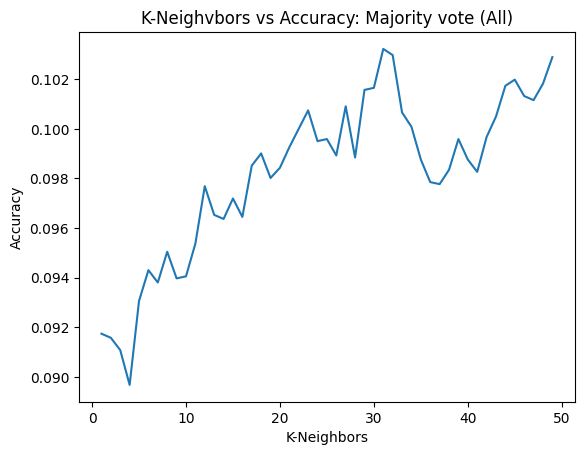

The highest accuracy occured at K = 31


In [186]:
best_k_all_maj, X_test_all_maj, knn_all_maj_model = KNNResults(TrainXNN,TrainYClassNN, "Majority vote (All)")

In [187]:
predict_mv = knn_all_maj_model.predict(X_test_all_maj)
print(classification_report(TestYClass['result'],predict_mv))
BettingResults(predict_mv)

              precision    recall  f1-score   support

           1       0.14      0.26      0.18      1211
           2       0.11      0.17      0.14      1212
           3       0.11      0.14      0.12      1214
           4       0.09      0.11      0.10      1209
           5       0.09      0.09      0.09      1208
           6       0.10      0.09      0.09      1209
           7       0.09      0.07      0.08      1202
           8       0.10      0.08      0.09      1201
           9       0.09      0.08      0.08      1188
          10       0.10      0.08      0.09      1165
          11       0.11      0.08      0.09      1135
          12       0.14      0.11      0.12      1026
          13       0.15      0.05      0.08       526
          14       0.14      0.05      0.07       432

    accuracy                           0.11     15138
   macro avg       0.11      0.10      0.10     15138
weighted avg       0.11      0.11      0.10     15138

win: 0.2578512396694215
p

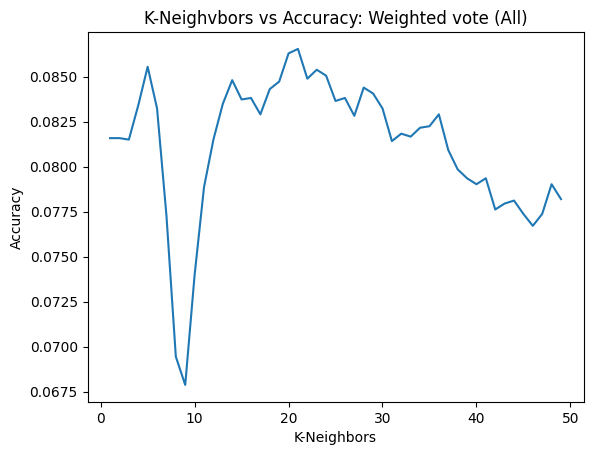

The highest accuracy occured at K = 21


In [188]:
best_k_all_dist, X_test_all_dist, knn_all_dist_model = KNNResults(TrainXNN,TrainYClassNN, "Weighted vote (All)",weights='distance')

In [189]:
predict_mv = knn_all_dist_model.predict(X_test_all_dist)
print(classification_report(TestYClass['result'],predict_mv))
BettingResults(predict_mv)

              precision    recall  f1-score   support

           1       0.15      0.21      0.17      1211
           2       0.12      0.15      0.13      1212
           3       0.10      0.11      0.11      1214
           4       0.08      0.09      0.08      1209
           5       0.09      0.09      0.09      1208
           6       0.10      0.09      0.10      1209
           7       0.09      0.08      0.09      1202
           8       0.09      0.09      0.09      1201
           9       0.09      0.08      0.08      1188
          10       0.09      0.08      0.09      1165
          11       0.11      0.10      0.10      1135
          12       0.14      0.13      0.14      1026
          13       0.13      0.06      0.08       526
          14       0.13      0.07      0.09       432

    accuracy                           0.11     15138
   macro avg       0.11      0.10      0.10     15138
weighted avg       0.11      0.11      0.10     15138

win: 0.20826446280991737


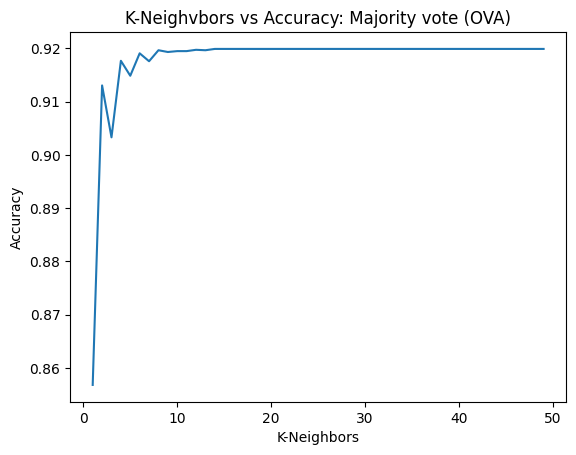

The highest accuracy occured at K = 14


In [209]:
best_k_ova_maj, X_test_ova_maj, knn_ova_maj_model = KNNResults(TrainXNN,TrainYOVANN, "Majority vote (OVA)", test="ova")

In [210]:
predict_mv = knn_ova_maj_model.predict(X_test_ova_maj)
pred_prob = knn_ova_maj_model.predict_proba(X_test_ova_maj)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.6268616225088267


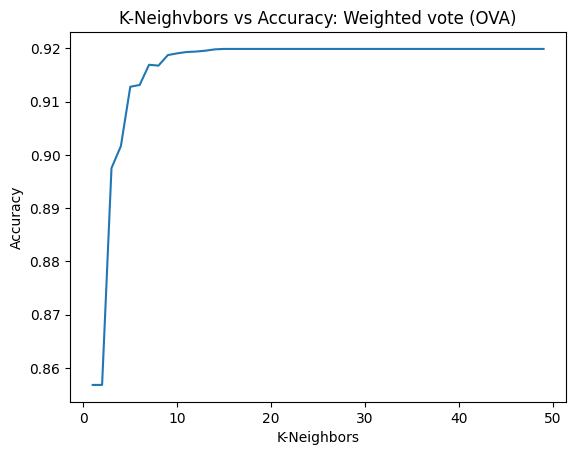

The highest accuracy occured at K = 15


In [211]:
best_k_ova_dist, X_test_ova_dist, knn_ova_dist_model= KNNResults(TrainXNN,TrainYOVANN, "Weighted vote (OVA)", weights='distance',test="ova")

In [212]:
predict_mv = knn_ova_dist_model.predict(X_test_ova_dist)
pred_prob = knn_ova_dist_model.predict_proba(X_test_ova_dist)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.6250615379935853


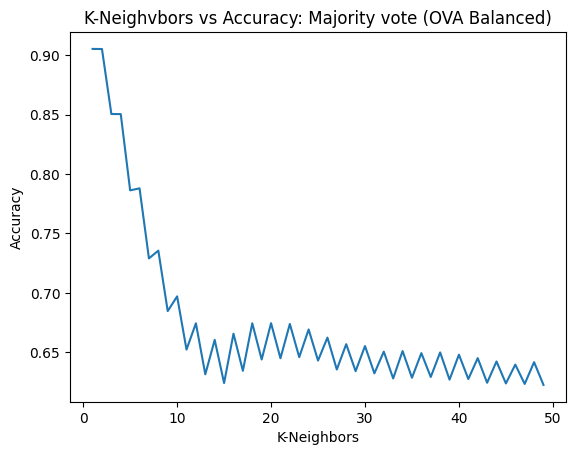

The highest accuracy occured at K = 1


In [213]:
best_k_ovab_maj, X_test_ovab_maj, knn_ovab_maj_model = KNNResults(TrainXOVABalancedNN,TrainYOVABalancedNN, "Majority vote (OVA Balanced)",test="ova")

In [214]:
predict_mv = knn_ovab_maj_model.predict(X_test_ovab_maj)
pred_prob = knn_ovab_maj_model.predict_proba(X_test_ovab_maj)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     13927
           1       0.10      0.49      0.16      1211

    accuracy                           0.60     15138
   macro avg       0.52      0.55      0.45     15138
weighted avg       0.87      0.60      0.69     15138

0.5633952358757297


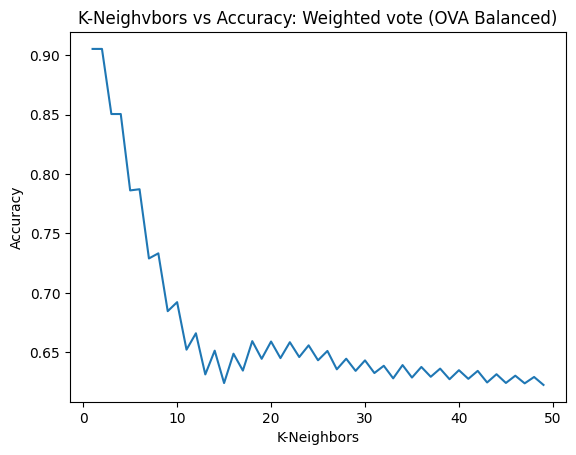

The highest accuracy occured at K = 1


In [215]:
best_k_ovab_dist, X_test_ovab_dist, knn_ovab_dist_model = KNNResults(TrainXOVABalancedNN,TrainYOVABalancedNN, "Weighted vote (OVA Balanced)", weights='distance', test="ova")

In [216]:
predict_mv = knn_ovab_dist_model.predict(X_test_ovab_dist)
pred_prob = knn_ovab_dist_model.predict_proba(X_test_ovab_dist)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     13927
           1       0.10      0.49      0.16      1211

    accuracy                           0.60     15138
   macro avg       0.51      0.55      0.45     15138
weighted avg       0.87      0.60      0.69     15138

0.5638660760126072


## Naive Bayes

In [300]:
def objective(trial):
    params = {
        "alpha": trial.suggest_float("alpha", 1e-10, 10, log=True)
    }
    
    NBMB = sklearn.naive_bayes.MultinomialNB(**params)
    NBMB.fit(TrainXNN, TrainYClassNN)

    y_pred = NBMB.predict(EvalX)
    return accuracy_score(EvalY['result'],y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
nb_mb_all = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.12138728323699421
  Params: 
    alpha: 3.18992031519118e-06


In [190]:
# Run to skip hyperparameter tuning
nb_mb_all = {'alpha': 3.18992031519118e-06}

In [191]:
temp = sklearn.naive_bayes.MultinomialNB(**nb_mb_all)
temp.fit(TrainXNN, TrainYClassNN)
y_pred = temp.predict(X_test)
print(classification_report(TestYClass['result'],y_pred))
BettingResults(y_pred)

              precision    recall  f1-score   support

           1       0.16      0.39      0.23      1211
           2       0.11      0.04      0.06      1212
           3       0.13      0.03      0.05      1214
           4       0.10      0.31      0.15      1209
           5       0.07      0.01      0.01      1208
           6       0.08      0.02      0.03      1209
           7       0.10      0.04      0.06      1202
           8       0.10      0.03      0.05      1201
           9       0.10      0.03      0.04      1188
          10       0.10      0.01      0.02      1165
          11       0.07      0.03      0.04      1135
          12       0.12      0.25      0.16      1026
          13       0.07      0.07      0.07       526
          14       0.08      0.50      0.14       432

    accuracy                           0.11     15138
   macro avg       0.10      0.13      0.08     15138
weighted avg       0.10      0.11      0.08     15138

win: 0.39173553719008264


In [303]:
def objective(trial):
    params = {
        "alpha": trial.suggest_float("alpha", 1e-10, 100, log=True)
    }
    
    NBMB = sklearn.naive_bayes.MultinomialNB(**params)
    NBMB.fit(TrainXNN, TrainYOVANN)

    y_pred = NBMB.predict_proba(EvalX)[:, 1]
    
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, n_jobs=-1, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

nb_mb_ova = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7815728590201557
  Params: 
    alpha: 0.9492438074465995


In [304]:
# Run this to skip hyperparameter tuning
nb_mb_ova = {"alpha": 0.9492438074465995}

In [305]:
temp = sklearn.naive_bayes.MultinomialNB(**nb_mb_ova)
temp.fit(TrainXNN, TrainYOVANN)
y_pred = temp.predict(X_test)
y_proba = temp.predict_proba(X_test)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.53      0.69     13927
           1       0.14      0.86      0.24      1211

    accuracy                           0.55     15138
   macro avg       0.56      0.69      0.46     15138
weighted avg       0.91      0.55      0.65     15138

0.7793272601023254


In [306]:
def objective(trial):
    params = {
        "alpha": trial.suggest_float("alpha", 1e-10, 100, log=True)
    }
    
    NBMB = sklearn.naive_bayes.MultinomialNB(**params)
    NBMB.fit(TrainXOVABalancedNN, np.hstack(TrainYOVABalancedNN.values))

    y_pred = NBMB.predict_proba(EvalX)[:, 1]
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
nb_mb_ova_bal = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7821167798774732
  Params: 
    alpha: 0.7774689605353391


In [307]:
# Run this to skip hyperparameter tuning
nb_mb_ova_bal = {"alpha": 0.7774689605353391}

In [308]:
temp = sklearn.naive_bayes.MultinomialNB(**nb_mb_ova_bal)
temp.fit(TrainXOVABalancedNN, np.hstack(TrainYOVABalancedNN.values))
y_pred = temp.predict(X_test)
y_proba = temp.predict_proba(X_test)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66     13927
           1       0.13      0.88      0.23      1211

    accuracy                           0.53     15138
   macro avg       0.56      0.69      0.44     15138
weighted avg       0.91      0.53      0.62     15138

0.7797141719916586


## SVM (Bagged for speed)

In [124]:
def objective(trial):
    params = {
            "C": trial.suggest_float("C", 1e-7, 10, log=True),
            "gamma": trial.suggest_float("gamma", 1e-4, 1),
            "kernel": trial.suggest_categorical("kernel", ['linear','rbf','sigmoid'])
        }
    n_estimators = trial.suggest_int('n_estimators', 5,10)
    model = BaggingClassifier(sklearn.svm.SVC(**params), max_samples=0.1, n_estimators=n_estimators,n_jobs=-1, random_state=42)
    model.fit(TrainXNN, TrainYClassNN)
    y_pred = model.predict(EvalX)
    return accuracy_score(EvalY['result'],y_pred)

# Create a study to optimize the hyperparameters
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout=3600)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

svm_params_all = study.best_params

  0%|          | 0/30 [00:00<?, ?it/s]

Number of finished trials: 15
Best trial:
  Value: 0.1274153592072667
  Params: 
    C: 0.05709281858781962
    gamma: 0.7414278440016849
    kernel: linear
    n_estimators: 7


In [192]:
# Run this to skip hyperparameter tuning
svm_params_all = {'C': 0.05709281858781962,
                  'gamma': 0.7414278440016849,
                  'kernel': 'linear'}

In [193]:
svm_model = BaggingClassifier(sklearn.svm.SVC(**svm_params_all),max_samples=0.1, n_jobs=-1, random_state=42, n_estimators=7)
svm_model.fit(TrainXNN, TrainYClassNN)
y_pred = svm_model.predict(X_test)
print(classification_report(TestYClass['result'], y_pred))
BettingResults(y_pred)

              precision    recall  f1-score   support

           1       0.16      0.46      0.23      1211
           2       0.10      0.22      0.14      1212
           3       0.09      0.09      0.09      1214
           4       0.09      0.14      0.11      1209
           5       0.10      0.03      0.05      1208
           6       0.10      0.04      0.06      1209
           7       0.10      0.08      0.09      1202
           8       0.10      0.08      0.09      1201
           9       0.11      0.04      0.06      1188
          10       0.11      0.05      0.07      1165
          11       0.14      0.07      0.09      1135
          12       0.17      0.24      0.20      1026
          13       0.43      0.01      0.01       526
          14       0.00      0.00      0.00       432

    accuracy                           0.12     15138
   macro avg       0.13      0.11      0.09     15138
weighted avg       0.12      0.12      0.10     15138

win: 0.46115702479338844


In [152]:
def objective(trial):
    params = {
            "C": trial.suggest_float("C", 1e-7, 10, log=True),
            "gamma": trial.suggest_float("gamma", 1e-4, 1),
            "kernel": trial.suggest_categorical("kernel", ['linear','rbf','sigmoid'])
        # "kernel": trial.suggest_categorical("kernel", ['linear','rbf','sigmoid','poly'])
        }
    estimators = trial.suggest_int('estimators', 5,10)
    model = BaggingClassifier(sklearn.svm.SVC(**params), max_samples=0.08, n_estimators=estimators,n_jobs=-1, random_state=42)
    model.fit(TrainXNN, TrainYOVANN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])

# Create a study to optimize the hyperparameters
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout = 3600)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

svm_params_ova = study.best_params

  0%|          | 0/30 [00:00<?, ?it/s]

Number of finished trials: 30
Best trial:
  Value: 0.5262358158537032
  Params: 
    C: 9.787365235322468
    gamma: 0.10885947749994632
    kernel: linear
    estimators: 9


In [154]:
# Run this to work
svm_params_ova = {'C':9.787365235322468, 'gamma': 0.10885947749994632, 'kernel': 'linear'}

In [155]:
svm_model = BaggingClassifier(sklearn.svm.SVC(**svm_params_ova), max_samples=0.1, n_estimators=9,n_jobs=-1, random_state=42)
svm_model.fit(TrainXNN, TrainYOVANN)
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA, y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14561
           1       0.56      0.00      0.01      1271

    accuracy                           0.92     15832
   macro avg       0.74      0.50      0.48     15832
weighted avg       0.89      0.92      0.88     15832

0.5197822114200813


In [160]:
def objective(trial):
    params = {
            "C": trial.suggest_float("C", 1e-7, 10, log=True),
            "gamma": trial.suggest_float("gamma", 1e-4, 1),
            "kernel": trial.suggest_categorical("kernel", ['linear','rbf','sigmoid'])
        }
    estimators = trial.suggest_int('estimators', 5,10)
    model = BaggingClassifier(sklearn.svm.SVC(**params), max_samples=0.1, n_estimators=estimators,n_jobs=-1, random_state=42)
    model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])

# Create a study to optimize the hyperparameters
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout=3600)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

svm_params_ova_bal = study.best_params

  0%|          | 0/30 [00:00<?, ?it/s]

Number of finished trials: 30
Best trial:
  Value: 0.9982699388224776
  Params: 
    C: 9.554515154785872
    gamma: 0.11165281607342496
    kernel: rbf
    estimators: 9


In [162]:
# Run this to work
svm_params_ova_bal = {"C": 9.554515154785872,"gamma": 0.11165281607342496,"kernel": "rbf"}

In [164]:
svm_model = BaggingClassifier(sklearn.svm.SVC(**svm_params_ova_bal), max_samples=0.1, n_estimators=9,n_jobs=-1, random_state=42)
svm_model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA, y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14561
           1       0.25      0.00      0.00      1271

    accuracy                           0.92     15832
   macro avg       0.58      0.50      0.48     15832
weighted avg       0.87      0.92      0.88     15832

0.5012465262526442


## AdaBoost Classifier

In [309]:
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate",1e-3,100, log=True),
    "n_estimators": trial.suggest_int("n_estimators", 20, 500),
    "random_state": 42
    }
    
    model = sklearn.ensemble.AdaBoostClassifier(**params)
    model.fit(TrainXNN,TrainYClassNN)
    y_pred = model.predict(EvalX)
    return accuracy_score(EvalY['result'],y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
ada_all_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 89
Best trial:
  Value: 0.14227910817506192
  Params: 
    learning_rate: 0.0070630280470046275
    n_estimators: 240


In [194]:
# Run this to skip hyperparameter tuning
ada_all_params = {"learning_rate": 0.0070630280470046275,
                  "n_estimators": 240}

In [195]:
model = sklearn.ensemble.AdaBoostClassifier(**ada_all_params, random_state=42)
model.fit(TrainXNN, TrainYClassNN)
y_pred = model.predict(X_test)
print(classification_report(TestYClass['result'],y_pred))
BettingResults(y_pred)

              precision    recall  f1-score   support

           1       0.21      0.59      0.31      1211
           2       0.11      0.13      0.12      1212
           3       0.13      0.05      0.07      1214
           4       0.09      0.12      0.10      1209
           5       0.10      0.04      0.06      1208
           6       0.10      0.02      0.04      1209
           7       0.10      0.07      0.08      1202
           8       0.09      0.06      0.08      1201
           9       0.11      0.13      0.12      1188
          10       0.13      0.09      0.11      1165
          11       0.13      0.17      0.15      1135
          12       0.17      0.32      0.22      1026
          13       0.00      0.00      0.00       526
          14       0.00      0.00      0.00       432

    accuracy                           0.14     15138
   macro avg       0.10      0.13      0.10     15138
weighted avg       0.11      0.14      0.11     15138

win: 0.5917355371900826
p

In [312]:
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate",1e-3,100, log=True),
    "n_estimators": trial.suggest_int("n_estimators", 20, 500),
    "random_state": 42,
    }
    
    model = sklearn.ensemble.AdaBoostClassifier(**params)
    model.fit(TrainXNN,TrainYOVANN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    

ada_ova_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.7881332247496715
  Params: 
    learning_rate: 0.12184627422874357
    n_estimators: 87


In [313]:
# Run this to skip hyperparameter tuning
ada_ova_params = {"learning_rate": 0.12184627422874357,
        "n_estimators": 87,
        "random_state": 42}

In [314]:
model = sklearn.ensemble.AdaBoostClassifier(**ada_ova_params)
model.fit(TrainXNN, TrainYOVANN)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.7846649009815663


In [315]:
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate",1e-3,100, log=True),
    "n_estimators": trial.suggest_int("n_estimators", 20, 500),
    "random_state": 42
    }
    
    model = sklearn.ensemble.AdaBoostClassifier(**params)
    model.fit(TrainXOVABalancedNN,TrainYOVABalancedNN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, timeout = 3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
ada_ova_bal_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

[W 2023-06-01 14:07:03,542] Trial 1 failed with parameters: {'learning_rate': 36.393108287038075, 'n_estimators': 312} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\adrga\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\adrga\AppData\Local\Temp\ipykernel_21436\3341396453.py", line 9, in objective
    model.fit(TrainXOVABalancedNN,TrainYOVABalancedNN)
  File "C:\Users\adrga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 162, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\adrga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 569, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\adrga\AppData\Local\Programs\Python\Python3

KeyboardInterrupt: 

In [189]:
# Run this to skip hyperparameter tuning
ada_ova_bal_params = {"learning_rate": 1.7016569438354876,
        "n_estimators": 297,
        "random_state": 42}

In [190]:
model = sklearn.ensemble.AdaBoostClassifier(**ada_ova_bal_params)
model.fit(TrainXOVABalancedNN,TrainYOVABalancedNN)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.7781311269325362


In [363]:
n_estimators = [ 25,  75, 125, 175, 225]
learning_rate = [0.001, 0.015, 0.030, 0.045, 0.060, 0.075, 0.1]
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

grid_search = GridSearchCV(estimator = AdaClass, param_grid=param_grid, cv=5, n_jobs=-1)

In [367]:
n_estimators = [225,250,300,325,350]
learning_rate = [0.075]
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

grid_search = GridSearchCV(estimator = AdaClass, param_grid=param_grid, cv=5, n_jobs=-1)

In [368]:
grid_search.fit(TrainX,TrainYOVA)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.075],
                         'n_estimators': [225, 250, 300, 325, 350]})

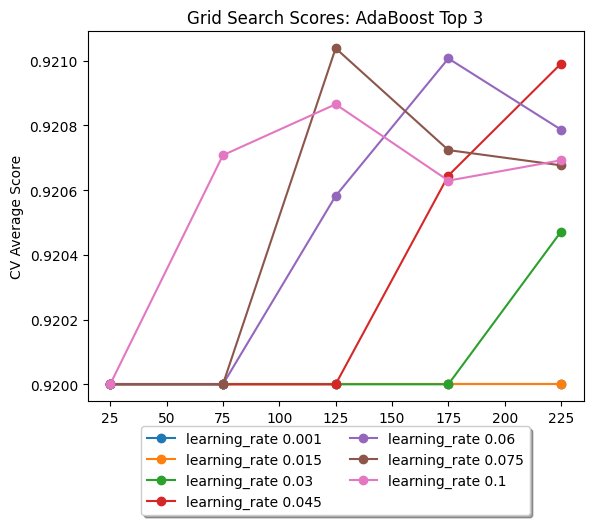

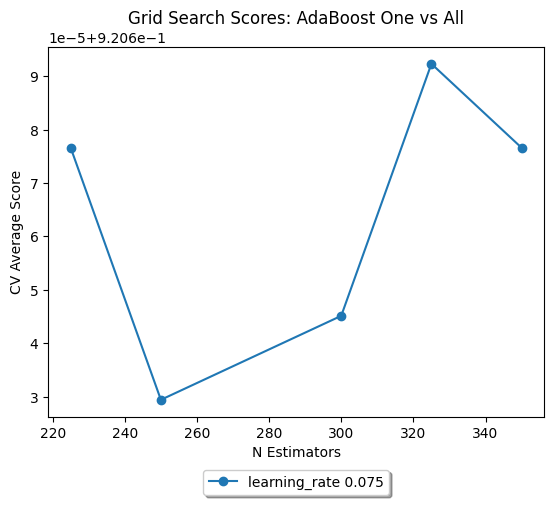

In [369]:
mean_scores = grid_search.cv_results_['mean_test_score']
mean_scores = np.array(mean_scores).reshape(len(learning_rate),len(n_estimators))
fig, ax = plt.subplots(1,1)
hyperparams = param_grid.keys()
for idx, val in enumerate(learning_rate):
    test_scores = mean_scores[idx,:]
    # Plot the test scores
    ax.plot(n_estimators,mean_scores[idx,:], '-o', label = 'learning_rate ' + str(val))
# Set the title and labels for the plot
ax.set_title('Grid Search Scores: AdaBoost One vs All')
ax.set_xlabel('N Estimators')
ax.set_ylabel('CV Average Score')

# Add a legend to the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),
          fancybox=True, shadow=True, ncol=2)

# Show the plot
plt.show()

In [370]:
ada_ova_best = grid_search.best_params_
ada_ova_best

{'learning_rate': 0.075, 'n_estimators': 325}

In [377]:
n_estimators = [5, 10, 15, 20, 25]
learning_rate = [0.045]
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

grid_search = GridSearchCV(estimator = AdaClass, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
# n_estimators = [20]
# learning_rate = [0.60,0.70,0.80,0.90,0.1]
# param_grid = {'n_estimators': n_estimators,
#               'learning_rate': learning_rate}

# grid_search = GridSearchCV(estimator = AdaClass, param_grid=param_grid, cv=5, n_jobs=-1)

In [378]:
# .values.ravel() to convert the y column into a flattened numpy array
grid_search.fit(TrainXOVABalanced,np.ravel(TrainYOVABalanced))

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.075,
                                          n_estimators=325),
             n_jobs=-1,
             param_grid={'learning_rate': [0.045],
                         'n_estimators': [5, 10, 15, 20, 25]})

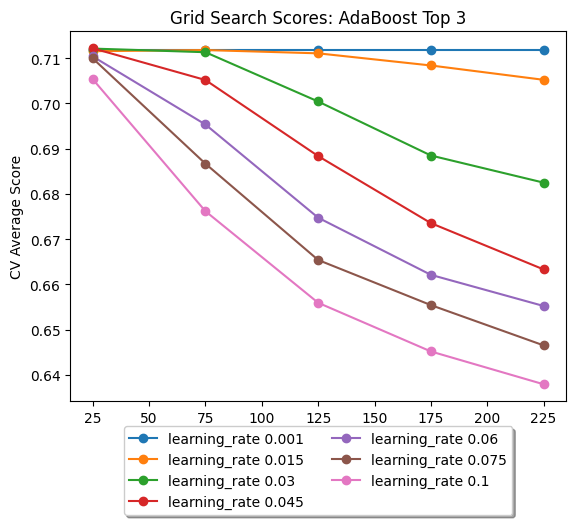

In [375]:
# mean_scores = grid_search.cv_results_['mean_test_score']
# mean_scores = np.array(mean_scores).reshape(len(learning_rate),len(n_estimators))
# fig, ax = plt.subplots(1,1)
# hyperparams = param_grid.keys()
# for idx, val in enumerate(learning_rate):
#     test_scores = mean_scores[idx,:]
#     # Plot the test scores
#     ax.plot(n_estimators,mean_scores[idx,:], '-o', label = 'learning_rate ' + str(val))
# # Set the title and labels for the plot
# ax.set_title('Grid Search Scores: AdaBoost Top 3')
# ax.set_xlabel('N Estimators')
# ax.set_ylabel('CV Average Score')

# # Add a legend to the plot
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=2)

# # Show the plot
# plt.show()

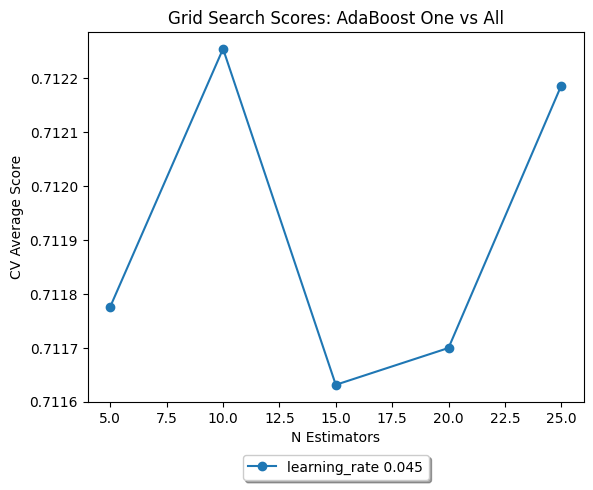

In [379]:
mean_scores = grid_search.cv_results_['mean_test_score']
mean_scores = np.array(mean_scores).reshape(len(learning_rate),len(n_estimators))
fig, ax = plt.subplots(1,1)
hyperparams = param_grid.keys()
for idx, val in enumerate(learning_rate):
    test_scores = mean_scores[idx,:]
    # Plot the test scores
    ax.plot(n_estimators,mean_scores[idx,:], '-o', label = 'learning_rate ' + str(val))
# Set the title and labels for the plot
ax.set_title('Grid Search Scores: AdaBoost One vs All')
ax.set_xlabel('N Estimators')
ax.set_ylabel('CV Average Score')

# Add a legend to the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),
          fancybox=True, shadow=True, ncol=2)

# Show the plot
plt.show()

In [380]:
ada_ova_bal_best = grid_search.best_params_
ada_ova_bal_best

{'learning_rate': 0.045, 'n_estimators': 10}

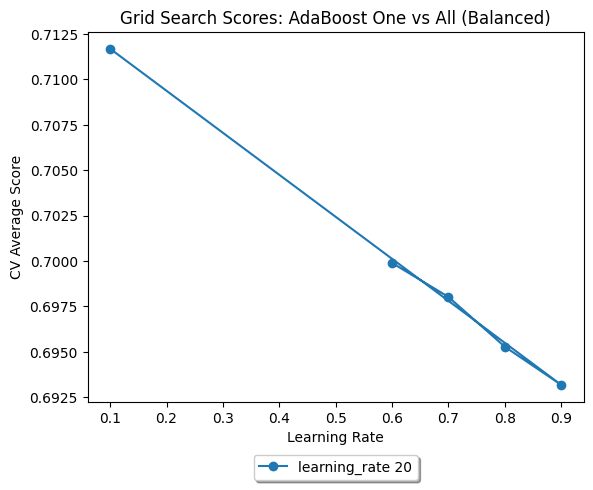

In [ ]:
# mean_scores = grid_search.cv_results_['mean_test_score']
# mean_scores = np.array(mean_scores).reshape(len(n_estimators),len(learning_rate))
# fig, ax = plt.subplots(1,1)
# hyperparams = param_grid.keys()
# for idx, val in enumerate(n_estimators):
#     test_scores = mean_scores[idx,:]
#     # Plot the test scores
#     ax.plot(learning_rate,mean_scores[idx,:], '-o', label = 'n_estimators ' + str(val))
# # Set the title and labels for the plot
# ax.set_title('Grid Search Scores: AdaBoost One vs All (Balanced)')
# ax.set_xlabel('Learning Rate')
# ax.set_ylabel('CV Average Score')

# # Add a legend to the plot
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),
#           fancybox=True, shadow=True, ncol=2)

# # Show the plot
# plt.show()

In [ ]:
# grid_search.best_params_

In [ ]:
# n_estimators = [ 25,  75, 125, 175, 225]
# learning_rate = [0.001, 0.015, 0.030, 0.045, 0.060, 0.075, 0.1]
# param_grid = {'n_estimators': n_estimators,
#               'learning_rate': learning_rate}

# grid_search = GridSearchCV(estimator = AdaClass, param_grid=param_grid, cv=5, n_jobs=-1)

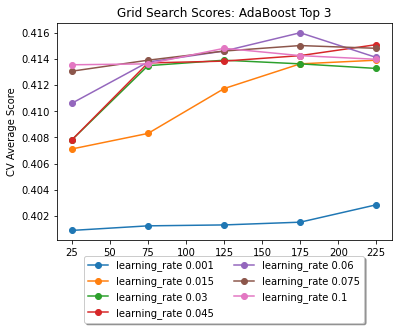

In [ ]:
# grid_search.fit(TrainXTop3, TrainYClassTop3)

# mean_scores = grid_search.cv_results_['mean_test_score']
# mean_scores = np.array(mean_scores).reshape(len(learning_rate),len(n_estimators))
# fig, ax = plt.subplots(1,1)
# hyperparams = param_grid.keys()
# for idx, val in enumerate(learning_rate):
#     test_scores = mean_scores[idx,:]
#     # Plot the test scores
#     ax.plot(n_estimators,mean_scores[idx,:], '-o', label = 'learning_rate ' + str(val))
# # Set the title and labels for the plot
# ax.set_title('Grid Search Scores: AdaBoost Top 3')
# ax.set_xlabel('N Estimators')
# ax.set_ylabel('CV Average Score')

# # Add a legend to the plot
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=2)

# # Show the plot
# plt.show()

In [ ]:
# grid_search.best_params_

{'learning_rate': 0.06, 'n_estimators': 175}

In [385]:
n_estimators = [ 25,  75, 125, 175, 225]
learning_rate = [0.001, 0.015, 0.030, 0.045, 0.060, 0.075, 0.1]
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate}

grid_search = GridSearchCV(estimator = AdaClass, param_grid=param_grid, cv=5, n_jobs=-1)

In [386]:
grid_search.fit(TrainX, TrainYClass)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.045, n_estimators=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.015, 0.03, 0.045, 0.06,
                                           0.075, 0.1],
                         'n_estimators': [25, 75, 125, 175, 225]})

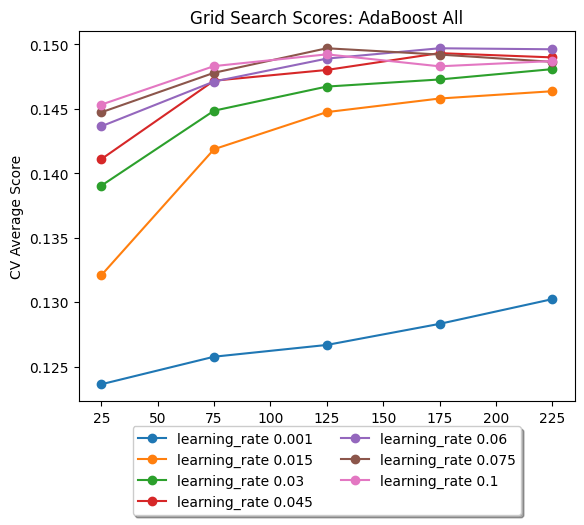

In [387]:
mean_scores = grid_search.cv_results_['mean_test_score']
mean_scores = np.array(mean_scores).reshape(len(learning_rate),len(n_estimators))
fig, ax = plt.subplots(1,1)
hyperparams = param_grid.keys()
for idx, val in enumerate(learning_rate):
    test_scores = mean_scores[idx,:]
    # Plot the test scores
    ax.plot(n_estimators,mean_scores[idx,:], '-o', label = 'learning_rate ' + str(val))
# Set the title and labels for the plot
ax.set_title('Grid Search Scores: AdaBoost All')
ax.set_xlabel('N Estimators')
ax.set_ylabel('CV Average Score')

# Add a legend to the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

# Show the plot
plt.show()

In [391]:
ada_all_best = grid_search.best_params_
ada_all_best

{'learning_rate': 0.075, 'n_estimators': 125}

## Random Forests

In [140]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'random_state': 42,
        'n_jobs': -1

    }
    
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(TrainXNN, TrainYClassNN)

    y_pred = rf_model.predict(EvalX)
    return accuracy_score(EvalY['result'], y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

rf_all_best = study.best_params


  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.14227910817506192
  Params: 
    n_estimators: 246
    max_depth: 7
    max_features: None
    min_samples_split: 7
    min_samples_leaf: 7
    bootstrap: True
    criterion: gini
    class_weight: None


In [1]:
# Run to skip hyperparameter tuning
def RF_All():
    rf_all_best = {"n_estimators": 1447,
            "max_depth": 12,
            "max_features": "sqrt",
            "min_samples_split": 7,
            "min_samples_leaf": 2,
            "bootstrap": False,
            "criterion": "gini",
            "class_weight": None,
            "random_state": 42,
            "n_jobs": -1}

    rf_class_all = RandomForestClassifier(**rf_all_best)
    rf_class_all.fit(TrainXNN, TrainYClassNN)
    return rf_class_all

In [197]:
rf_class_all = RF_All()
rf_all_pred = rf_class_all.predict(X_test)
print(classification_report(TestYClass['result'],rf_all_pred))
BettingResults(rf_all_pred)

              precision    recall  f1-score   support

           1       0.23      0.53      0.32      1211
           2       0.12      0.20      0.15      1212
           3       0.12      0.06      0.08      1214
           4       0.12      0.11      0.11      1209
           5       0.11      0.07      0.08      1208
           6       0.12      0.07      0.09      1209
           7       0.09      0.04      0.05      1202
           8       0.11      0.09      0.10      1201
           9       0.10      0.12      0.11      1188
          10       0.11      0.10      0.11      1165
          11       0.13      0.14      0.14      1135
          12       0.16      0.22      0.19      1026
          13       0.19      0.09      0.12       526
          14       0.24      0.15      0.18       432

    accuracy                           0.14     15138
   macro avg       0.14      0.14      0.13     15138
weighted avg       0.13      0.14      0.13     15138

win: 0.5289256198347108
p

In [141]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', {0:1,1:15}]),
        'random_state': 42,
        'n_jobs': -1

    }
    
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(TrainXNN, TrainYOVANN)

    y_pred = rf_model.predict_proba(EvalX)[:, 1]
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, timeout=5400)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

rf_ova_best = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.7832458494512207
  Params: 
    n_estimators: 968
    max_depth: 13
    max_features: sqrt
    min_samples_split: 2
    min_samples_leaf: 4
    bootstrap: False
    criterion: entropy
    class_weight: None


In [93]:
# Run this to skip hyperparameter tuning
def RF_OVA():
    rf_ova_best = {"n_estimators": 968,
        "max_depth": 13,
        "max_features": 'sqrt',
        "min_samples_split": 2,
        "min_samples_leaf": 4,
        "bootstrap": False,
        "criterion": "entropy",
        "class_weight": None,
        'random_state': 42,
        'n_jobs': -1}
    rf_model = RandomForestClassifier(**rf_ova_best)
    rf_model.fit(TrainXNN, TrainYOVANN)
    return rf_model

In [63]:
rf_model = RF_OVA()
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.62      0.01      0.02      1211

    accuracy                           0.92     15138
   macro avg       0.77      0.51      0.49     15138
weighted avg       0.90      0.92      0.88     15138

0.7791055958469777


In [142]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'random_state': 42,
        'n_jobs': -1

    }
    
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)

    y_pred = rf_model.predict_proba(EvalX)[:, 1]
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

rf_ova_bal_best = study.best_params


  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.9996471339465843
  Params: 
    n_estimators: 601
    max_depth: 20
    max_features: None
    min_samples_split: 3
    min_samples_leaf: 1
    bootstrap: True
    criterion: entropy
    class_weight: balanced


In [138]:
# Run this to skip hyperparameter tuning
def RF_Bal():
    rf_ova_bal_best = {"n_estimators": 601,
    "max_depth": 20,
    "max_features": None,
    "min_samples_split": 3,
    "min_samples_leaf": 1,
    "bootstrap": True,
    "criterion": "entropy",
    "class_weight": 'balanced',
    "random_state": 42,
    "n_jobs": -1}
    
    rf_model = RandomForestClassifier(**rf_ova_bal_best)
    rf_model.fit(TrainXOVABalancedNN, np.hstack(TrainYOVABalancedNN.values))
    return rf_model

In [69]:
rf_model = RF_Bal()
y_proba = rf_model.predict_proba(X_test)
y_pred = rf_model.predict(X_test)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     13927
           1       0.24      0.33      0.27      1211

    accuracy                           0.86     15138
   macro avg       0.59      0.62      0.60     15138
weighted avg       0.88      0.86      0.87     15138

0.758401674129887


## XGBoost Classifier

In [156]:
le = LabelEncoder()
encoded_y = le.fit_transform(TrainYClassNN)
encoded_y_val = le.fit_transform(EvalY['result'])

dtrain = xgb.DMatrix(TrainXCat, label=encoded_y, enable_categorical=True)
deval = xgb.DMatrix(EvalXCat,label=encoded_y_val, enable_categorical=True)


def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "multi:softmax",
        "eval_metric": "mlogloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "num_class": 14,
        "verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    model = xgb.train(param, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    results = model.predict(deval)
    results = results.astype(int)
    results =  le.inverse_transform(results)
    return accuracy_score(EvalY['result'],results)
    # CV version: remove eval_set and eval_metric
    
    #     score = cross_val_score(model, TrainX, encoded_y, cv=5, scoring="accuracy")
    
    #     mean_score = score.mean()
    
    #     return mean_score


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
xgb_all_Best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.14269199009083403
  Params: 
    booster: dart
    lambda: 0.0010305970521699243
    alpha: 2.9590999268750783e-05
    max_depth: 3
    eta: 7.971270329329855e-07
    gamma: 3.626911977854771e-08
    grow_policy: lossguide
    sample_type: uniform
    normalize_type: tree
    rate_drop: 1.0230412678097064e-08
    skip_drop: 0.6544303903637052


In [2]:
# Run this to skip hyperparameter tuning step
def XGB_Class_All():
    xgb_all_Best = {"verbosity": 0,
            "objective": "multi:softmax",
            "eval_metric": "mlogloss",
            "num_class": 14,
            "verbosity": 0,
            "tree_method":'gpu_hist',
            "gpu_id": 0,
            "predictor":'gpu_predictor',
            "random_state": 42,
            "early_stopping_rounds": 300,
            'booster': 'dart',
            'lambda': 0.0010305970521699243,
            'alpha': 2.9590999268750783e-05,
            'max_depth': 3,
            'eta': 7.971270329329855e-07,
            'gamma': 3.626911977854771e-08,
            'grow_policy': 'lossguide',
            'sample_type': 'uniform',
            'normalize_type': 'tree',
            'rate_drop': 1.0230412678097064e-08,
            'skip_drop': 0.6544303903637052}

    le = LabelEncoder()
    encoded_y = le.fit_transform(TrainYClassNN)
    encoded_y_val = le.transform(EvalY['result'])

    dtrain = xgb.DMatrix(TrainXCat, label=encoded_y, enable_categorical=True)
    deval = xgb.DMatrix(EvalXCat,label=encoded_y_val, enable_categorical=True)
    xgb_all_class = xgb.train(xgb_all_Best, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    return xgb_all_class

In [199]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_all_class = XGB_Class_All()
y_pred = xgb_all_class.predict(xtest)
#Model predict outputs [0.,14.)
y_pred = y_pred.astype(int)
#Restore placements back to [1,14] 
xgboost_all_class =  y_pred + 1
print(classification_report(TestYClass['result'],xgboost_all_class))
print('\n')
BettingResults(xgboost_all_class)

              precision    recall  f1-score   support

           1       0.22      0.55      0.31      1211
           2       0.10      0.25      0.14      1212
           3       0.10      0.03      0.05      1214
           4       0.10      0.11      0.11      1209
           5       0.08      0.09      0.08      1208
           6       0.08      0.00      0.00      1209
           7       0.00      0.00      0.00      1202
           8       0.11      0.06      0.08      1201
           9       0.11      0.06      0.08      1188
          10       0.10      0.02      0.04      1165
          11       0.11      0.21      0.15      1135
          12       0.15      0.25      0.19      1026
          13       0.16      0.11      0.13       526
          14       0.26      0.13      0.18       432

    accuracy                           0.13     15138
   macro avg       0.12      0.13      0.11     15138
weighted avg       0.11      0.13      0.10     15138



win: 0.5462809917355372

In [174]:
dtrain = xgb.DMatrix(TrainXCat, label=TrainYOVANN, enable_categorical=True)
deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)


def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1,20),
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    model = xgb.train(param, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    results = model.predict(deval)
    return roc_auc_score(EvalYOVA,results)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
xgb_ova_Best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7881920357585741
  Params: 
    scale_pos_weight: 15
    booster: gbtree
    lambda: 6.504617121879726e-06
    alpha: 1.2687784288137063e-05
    max_depth: 3
    eta: 0.37645414580756553
    gamma: 1.2162933916029757e-07
    grow_policy: depthwise


In [86]:
# Run this to skip hyperparameter tuning
def XGB_Class_OVA():
    xgb_ova_Best = {
            'scale_pos_weight': 15,
            'booster': 'gbtree',
            'lambda': 6.504617121879726e-06,
            'alpha': 1.2687784288137063e-05,
            'max_depth': 3,
            'eta': 0.37645414580756553,
            'gamma': 1.2162933916029757e-07,
            'grow_policy': 'depthwise',
            "verbosity": 0,
            "objective": "binary:logistic",
            "eval_metric": "auc",
            "verbosity": 0,
            "tree_method":'gpu_hist',
            "gpu_id": 0,
            "predictor":'gpu_predictor',
            "random_state": 42,
            "early_stopping_rounds": 100}

    dtrain = xgb.DMatrix(TrainXCat, label=TrainYOVANN, enable_categorical=True)
    deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)
    model = xgb.train(xgb_ova_Best, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    return model

In [177]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
model = XGB_Class_OVA()
y_proba = model.predict(xtest)
#Model predict outputs [0.,14.)
y_pred = np.rint(y_proba)
#Restore placements back to [1,14] 
print(classification_report(TestYClassOVA,y_pred))
print('\n')
print(roc_auc_score(TestYClassOVA,y_proba))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74     13927
           1       0.15      0.81      0.25      1211

    accuracy                           0.61     15138
   macro avg       0.56      0.70      0.49     15138
weighted avg       0.91      0.61      0.70     15138



0.7829213813184319


In [178]:
dtrain = xgb.DMatrix(TrainXCatOVABalancedNN, label=TrainYCatOVABalancedNN, enable_categorical=True)
deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)


def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    model = xgb.train(param, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    results = model.predict(deval)
    return roc_auc_score(EvalYOVA,results)
    # CV version: remove eval_set and eval_metric
    
    #     score = cross_val_score(model, TrainX, encoded_y, cv=5, scoring="accuracy")
    
    #     mean_score = score.mean()
    
    #     return mean_score


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
xgb_bal_ova_Best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7878273704862203
  Params: 
    booster: gbtree
    lambda: 2.3339283480140298e-08
    alpha: 0.00383404922965509
    max_depth: 2
    eta: 0.49710860062384415
    gamma: 4.1732470770159154e-06
    grow_policy: lossguide


In [139]:
def XGB_Class_Balance():    
    xgb_bal_ova_Best = {'booster': 'gbtree',
            'lambda': 2.3339283480140298e-08,
            'alpha': 0.00383404922965509,
            'max_depth': 2,
            'eta': 0.49710860062384415,
            'gamma': 4.1732470770159154e-06,
            'grow_policy': 'lossguide',
            "verbosity": 0,
            "objective": "binary:logistic",
            "eval_metric": "auc",
            "verbosity": 0,
            "tree_method":'gpu_hist',
            "gpu_id": 0,
            "predictor":'gpu_predictor',
            "random_state": 42,
            "early_stopping_rounds": 100}
    dtrain = xgb.DMatrix(TrainXCatOVABalancedNN, label=TrainYCatOVABalancedNN, enable_categorical=True)
    deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)
    model = xgb.train(xgb_bal_ova_Best, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    return model

In [181]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
model = XGB_Class_Balance()
y_prob = model.predict(xtest)
y_pred = np.rint(y_pred)
print(classification_report(TestYClassOVA,y_pred))
print('\n')
print(roc_auc_score(TestYClassOVA,y_prob))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74     13927
           1       0.15      0.81      0.25      1211

    accuracy                           0.61     15138
   macro avg       0.56      0.70      0.49     15138
weighted avg       0.91      0.61      0.70     15138



0.7827478031166049


## CatBoost Classifier

**All**

In [65]:
cat_features = [TrainXCat.columns.get_loc(col) for col in categorical_cols]
train = cb.Pool(TrainXCat,TrainYCatClass, cat_features=cat_features)
evals = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features)


def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": trial.suggest_categorical("objective", ["MultiClass"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "Accuracy",
        "loss_function": "MultiClass",
        "random_state": 42
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "Accuracy")
    gbm.fit(train,
        eval_set=evals,
        verbose=0,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict(evals)
    accuracy = accuracy_score(EvalYCat['result'], preds)

    return accuracy


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="maximize")
study.optimize(objective, n_trials=500,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


catboost_all_params = study.best_params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.1471511147811726
  Params: 
    learning_rate: 0.05049113914181088
    depth: 7
    l2_leaf_reg: 1.5491444918179988e-06
    random_strength: 4.4444764295588715e-05
    od_type: IncToDec
    od_wait: 35
    objective: MultiClass
    colsample_bylevel: 0.09485557961889983
    boosting_type: Ordered
    bootstrap_type: Bayesian
    bagging_temperature: 0.5989711035644039


In [3]:
# Run this to skip hyperparameter tuning
def Cat_Class_All():
    catboost_all_params = {"verbose": False,
        "eval_metric": "Accuracy",
        "loss_function": "MultiClass",
        "random_state": 42,
        "learning_rate": 0.05049113914181088,
        "depth": 7,
        "l2_leaf_reg": 1.5491444918179988e-06,
        "random_strength": 4.4444764295588715e-05,
        "od_type": "IncToDec",
        "od_wait": 24,
        "objective": "MultiClass",
        "colsample_bylevel": 0.09485557961889983,
        "boosting_type": "Ordered",
        "bootstrap_type": "Bayesian",
        "bagging_temperature": 0.5989711035644039}

    cat_features = [TrainXCat.columns.get_loc(col) for col in categorical_cols]
    train = cb.Pool(TrainXCat,TrainYCatClass, cat_features=cat_features)
    evals = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features)
    cat_class_all = cb.CatBoostClassifier(**catboost_all_params)
    cat_class_all.fit(train,eval_set=evals,verbose=0)
    return cat_class_all

In [201]:
cat_class_all = Cat_Class_All()
cat_all_pred = cat_class_all.predict(catxtest)
print(classification_report(TestYClass['result'],cat_all_pred))
BettingResults(cat_all_pred)

              precision    recall  f1-score   support

           1       0.24      0.50      0.32      1211
           2       0.12      0.18      0.15      1212
           3       0.11      0.05      0.07      1214
           4       0.11      0.14      0.13      1209
           5       0.12      0.06      0.08      1208
           6       0.13      0.08      0.10      1209
           7       0.10      0.04      0.06      1202
           8       0.10      0.10      0.10      1201
           9       0.10      0.12      0.11      1188
          10       0.12      0.09      0.10      1165
          11       0.12      0.12      0.12      1135
          12       0.17      0.23      0.20      1026
          13       0.17      0.11      0.14       526
          14       0.24      0.20      0.22       432

    accuracy                           0.14     15138
   macro avg       0.14      0.15      0.14     15138
weighted avg       0.13      0.14      0.13     15138

win: 0.49586776859504134


**OVA**

In [103]:
train = cb.Pool(TrainXCat,TrainYOVANN, cat_features=cat_features)
evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)

def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1,20),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": "Logloss",
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "AUC",
        "random_state": 42
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "AUC")
    gbm.fit(train,
        eval_set=evals,
        verbose=0,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict_proba(EvalXCat)
    return roc_auc_score(EvalYOVA, preds[:,1])


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="maximize")
study.optimize(objective, n_trials=500,show_progress_bar=True, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


catboost_ova_params = study.best_params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 11
Best trial:
  Value: 0.7824061152344111
  Params: 
    learning_rate: 0.005652301946453826
    depth: 8
    scale_pos_weight: 18
    l2_leaf_reg: 0.49730827844792175
    random_strength: 0.014863578405226782
    od_type: IncToDec
    od_wait: 45
    colsample_bylevel: 0.07700602122717151
    boosting_type: Plain
    bootstrap_type: Bayesian
    bagging_temperature: 0.05447029569757178


In [87]:
# Run this to skip hyperparameter tuning
def Cat_Class_OVA():
    catboost_ova_params = {
            'learning_rate': 0.005652301946453826,
            'depth': 8,
            'scale_pos_weight': 18,
            'l2_leaf_reg': 0.49730827844792175,
            'random_strength': 0.014863578405226782,
            'od_type': 'IncToDec',
            'od_wait': 45,
            'colsample_bylevel': 0.07700602122717151,
            'boosting_type': 'Plain',
            'bootstrap_type': 'Bayesian',
            "verbose": False,
            "objective": "Logloss",
            "eval_metric": "AUC",
            "random_state": 42}

    train = cb.Pool(TrainXCat,TrainYOVANN, cat_features=cat_features)
    evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)
    model = cb.CatBoostClassifier(**(catboost_ova_params))
    model.fit(train,
            eval_set=evals,verbose=0,early_stopping_rounds=200)
    return model

In [107]:
model = Cat_Class_OVA()
cat_ova_pred = model.predict(catxtest)
cat_ova_prob = model.predict_proba(catxtest)
print(classification_report(TestYClassOVA,cat_ova_pred))
print(roc_auc_score(TestYClassOVA, cat_ova_prob[:,1]))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72     13927
           1       0.14      0.83      0.25      1211

    accuracy                           0.59     15138
   macro avg       0.56      0.70      0.48     15138
weighted avg       0.91      0.59      0.68     15138

0.7810955639459427


**OVA Balanced**

In [250]:
TrainXCatOVABalancedNN[categorical_cols].dtypes

horse_type       object
venue            object
config           object
going            object
horse_ratings    object
horse_country    object
race_class        int64
dtype: object

In [104]:
train = cb.Pool(TrainXCatOVABalancedNN,TrainYCatOVABalancedNN, cat_features=cat_features)
evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)

def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "AUC",
        "random_state": 42
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "AUC")
    gbm.fit(train,
        eval_set=evals,
        callbacks=[pruning_callback],
        
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict_proba(EvalXCat)
    return roc_auc_score(EvalYOVA, preds[:,1])



optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True, timeout = 3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

catboost_bal_ova_params = study.best_params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 13
Best trial:
  Value: 0.7838471931740362
  Params: 
    learning_rate: 0.04722121113468437
    depth: 5
    l2_leaf_reg: 0.21800898127234203
    random_strength: 5.268208547712614e-05
    od_type: IncToDec
    od_wait: 25
    objective: Logloss
    colsample_bylevel: 0.06881857557138349
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    subsample: 0.2040827543682774


In [140]:
# Run this to skip hyperparameter tuning
def Cat_Class_Balance():
    catboost_bal_ova_params = {"learning_rate": 0.04722121113468437,
        "depth": 5,
        "l2_leaf_reg": 0.21800898127234203,
        "random_strength": 5.268208547712614e-05,
        "od_type": "IncToDec",
        "od_wait": 25,
        "objective": "Logloss",
        "colsample_bylevel": 0.06881857557138349,
        "boosting_type": "Ordered",
        "bootstrap_type": "Bernoulli",
        "subsample": 0.2040827543682774,
        "eval_metric": "AUC",
        "random_state": 42,
        "verbose": False}

    train = cb.Pool(TrainXCatOVABalancedNN,TrainYCatOVABalancedNN, cat_features=cat_features)
    evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)
    model = cb.CatBoostClassifier(**catboost_bal_ova_params)
    model.fit(train,eval_set=[(evals)],verbose=0,early_stopping_rounds=100)
    return model

In [110]:
model = Cat_Class_Balance()
cat_bal_ova_pred = model.predict(catxtest)
cat_bal_ova_prob = model.predict_proba(catxtest)
print(classification_report(TestYClassOVA, cat_bal_ova_pred))
print(roc_auc_score(TestYClassOVA,cat_bal_ova_prob[:,1]))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     13927
           1       0.17      0.71      0.28      1211

    accuracy                           0.70     15138
   macro avg       0.57      0.71      0.54     15138
weighted avg       0.90      0.70      0.77     15138

0.7819621801706753


## LightGBM Classifier

In [160]:
le = LabelEncoder()
encoded_y = le.fit_transform(TrainYClassNN)
encoded_y_val = le.fit_transform(EvalY['result'])

lgtrain = lgb.Dataset(TrainXCat,label=encoded_y,
                     categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=encoded_y_val,
                     categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 14,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "feature_pre_filter": False,
        "random_state": 42
    }
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)], categorical_feature=cat_features)
    y_pred = gbm.predict(EvalXCat)
    y_pred = [np.argmax(x) + 1 for x in y_pred]
    y_pred = np.hstack(y_pred)
        # predictions = predictions.apply(lambda x: np.argsort(x) + 1)
    # 
    return accuracy_score(EvalY['result'],y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_all_params = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.1476465730800991
  Params: 
    lambda_l1: 0.2392878864433801
    lambda_l2: 3.8862947758569e-05
    num_leaves: 7
    feature_fraction: 0.6980771433280335
    bagging_fraction: 0.7479328680003059
    bagging_freq: 1
    min_child_samples: 22


In [4]:
# Run this to skip hyperparameter tuning
def Light_Class_All():
    lgb_all_params = { 'lambda_l1': 0.2392878864433801,
            'lambda_l2': 3.8862947758569e-05,
            'num_leaves': 7,
            'feature_fraction': 0.6980771433280335,
            'bagging_fraction': 0.7479328680003059,
            'bagging_freq': 1,
            'min_child_samples': 22,
            "objective": "multiclass",
            "metric": "multi_logloss",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "num_class": 14}


    le = LabelEncoder()
    encoded_y = le.fit_transform(TrainYClassNN)
    encoded_y_val = le.fit_transform(EvalY['result'])

    lgtrain = lgb.Dataset(TrainXCat,label=encoded_y,
                         categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=encoded_y_val,
                         categorical_feature=cat_features, free_raw_data=False)

    model = lgbm_all_class = lgb.train(lgb_all_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    return model

In [203]:
lgbm_all_class = Light_Class_All()
lgbm_all_probs = lgbm_all_class.predict(catxtest)
y_pred = [np.argmax(x) + 1 for x in lgbm_all_probs]
lgbm_all_results = np.hstack(y_pred)

print(classification_report(TestYClass['result'],lgbm_all_results))
      
BettingResults(lgbm_all_results)


              precision    recall  f1-score   support

           1       0.23      0.47      0.31      1211
           2       0.12      0.19      0.15      1212
           3       0.12      0.08      0.10      1214
           4       0.09      0.11      0.10      1209
           5       0.10      0.07      0.08      1208
           6       0.10      0.06      0.07      1209
           7       0.12      0.04      0.06      1202
           8       0.11      0.08      0.09      1201
           9       0.10      0.11      0.10      1188
          10       0.11      0.09      0.10      1165
          11       0.10      0.12      0.11      1135
          12       0.18      0.21      0.20      1026
          13       0.16      0.13      0.14       526
          14       0.20      0.22      0.21       432

    accuracy                           0.14     15138
   macro avg       0.13      0.14      0.13     15138
weighted avg       0.13      0.14      0.13     15138

win: 0.47107438016528924


In [ ]:
bet_type_results = add_betting_results(cat_all_pred, 'LightGBM Class')

In [138]:
lgbm_probs = model.predict(EvalXCat)
lgbm_probs = pd.DataFrame(lgbm_probs, columns=[f'lgbm_{i + 1}' for i in range(15)])
lgbm_probs.head()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [321]:
lgtrain = lgb.Dataset(TrainXCat,label=TrainYOVANN, 
                      categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                      categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "unbalance": True,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "feature_pre_filter": False,
        "random_state": 42
    }
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    y_pred = gbm.predict(EvalXCat)
    y_pred = np.rint(y_pred)
    return accuracy_score(EvalYOVA,y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_ova_params = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.9201486374896779
  Params: 
    lambda_l1: 6.583149331738682
    lambda_l2: 5.369801032730379e-08
    num_leaves: 63
    feature_fraction: 0.45377840066427194
    bagging_fraction: 0.5402682828602083
    bagging_freq: 2
    min_child_samples: 71


In [88]:
# Run this to skip hyperparameter tuning
def Light_Class_OVA():
    lgb_ova_params = {"lambda_l1": 0.01936858541423188,
            "lambda_l2": 0.4168550677695767,
            "num_leaves": 23,
            "feature_fraction": 0.9208216279473694,
            "bagging_fraction": 0.8870424767254557,
            "bagging_freq": 4,
            "min_child_samples": 56,
            "objective": "binary",
            "metric": "auc",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "unbalance": True}

    lgtrain = lgb.Dataset(TrainXCat,label=TrainYOVANN, 
                          categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                          categorical_feature=cat_features, free_raw_data=False)
    model = lgb.train(lgb_ova_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    return model

In [325]:
model = Light_Class_OVA()
y_proba = model.predict(catxtest)
y_pred = np.rint(y_proba)
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA,y_proba))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     13927
           1       0.27      0.42      0.33      1211

    accuracy                           0.86     15138
   macro avg       0.61      0.66      0.62     15138
weighted avg       0.89      0.86      0.87     15138

0.7817347942085893


In [326]:
lgtrain = lgb.Dataset(TrainXCatOVABalancedNN,label=TrainYCatOVABalancedNN,
                      categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                      categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "random_state": 42
    }
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(100, verbose=0)])
    y_pred = gbm.predict(EvalXCat)
    return roc_auc_score(EvalYOVA,y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_ova_params = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7889372374095394
  Params: 
    lambda_l1: 4.547271951185619e-06
    lambda_l2: 3.048147123443626
    num_leaves: 13
    feature_fraction: 0.9216644424814373
    bagging_fraction: 0.4302603564473942
    bagging_freq: 1
    min_child_samples: 97


In [141]:
# Run this to skip hyperparameter tuning
def Light_Class_Balance():
    lgb_ova_params = {"lambda_l1": 4.547271951185619e-06,
            "lambda_l2": 3.048147123443626,
            "num_leaves": 13,
            "feature_fraction": 0.9216644424814373,
            "bagging_fraction": 0.4302603564473942,
            "bagging_freq": 1,
            "min_child_samples": 97,
            "objective": "binary",
            "metric": "auc",
            "verbosity": -1,
            "boosting_type": "gbdt"}

    lgtrain = lgb.Dataset(TrainXCatOVABalancedNN,label=TrainYCatOVABalancedNN,
                          categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                          categorical_feature=cat_features, free_raw_data=False)
    model = lgb.train(lgb_ova_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    return model

In [328]:
model = Light_Class_Balance()
y_prob = model.predict(catxtest)
y_pred = np.rint(y_prob)
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA,y_prob))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     13927
           1       0.17      0.71      0.27      1211

    accuracy                           0.70     15138
   macro avg       0.57      0.70      0.54     15138
weighted avg       0.90      0.70      0.77     15138

0.7831270366533719


# Ranking

In [97]:
# Run before ranking models
le = LabelEncoder()
groups = train_val_cat_data.groupby('race_id').size().to_numpy()
eval_groups = eval_data.groupby('race_id').size().to_numpy()
grouped_eval = EvalX.copy()
grouped_eval['race_id'] = eval_data['race_id'].copy()
grouped_test = catxtest.copy()
grouped_test['race_id'] = test_data_cat['race_id'].copy()
group_test = test_data_cat.groupby('race_id').size().to_numpy()

## XGBoost Ranking

In [331]:
# test_list = [15 - x for x in TrainYClassNN]
le = LabelEncoder()
encoded_y = le.fit_transform(TrainYClassNN)
encoded_y_val = le.transform(EvalY['result'])

dtrain = xgb.DMatrix(TrainXCat, label=encoded_y, enable_categorical=True, group=groups)
deval = xgb.DMatrix(EvalXCat,label=encoded_y_val, enable_categorical=True,group=eval_groups)

dtrain.set_group(groups)
deval.set_group(eval_groups)
def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "rank:pairwise",
        "eval_metric": "ndcg",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 14)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    model = xgb.train(param, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    results = model.predict(deval)
    tester = []
    start = 0

    for size in group_test:
        subset = results[start:start+size]
        argmax_index = np.argsort(subset) + 1
        tester.append(argmax_index)
        start += size

    tester = np.hstack(tester)
    return accuracy_score(EvalY['result'],tester)
    # CV version: remove eval_set and eval_metric
    
    #     score = cross_val_score(model, TrainX, encoded_y, cv=5, scoring="accuracy")
    
    #     mean_score = score.mean()
    
    #     return mean_score


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

# Print the best trial and parameters
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
xgb_all_Best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.08389760528488852
  Params: 
    booster: gblinear
    lambda: 0.000719982370058389
    alpha: 0.11374179801576044


In [204]:
test = {"verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100,
        "booster": "gblinear",
        "lambda": 0.000719982370058389,
        "alpha": 0.11374179801576044,
        "objective": "rank:pairwise",
        "eval_metric": "ndcg"
       }

le = LabelEncoder()
encoded_y = le.fit_transform(TrainYClassNN)
encoded_y_val = le.transform(EvalY['result'])

dtrain = xgb.DMatrix(TrainXCat, label=encoded_y, enable_categorical=True, group=groups)
deval = xgb.DMatrix(EvalXCat,label=encoded_y_val, enable_categorical=True,group=eval_groups)

dtrain.set_group(groups)
deval.set_group(eval_groups)
dtest = xgb.DMatrix(catxtest,label=encoded_test, enable_categorical=True,group=group_test)
model = xgb.train(test, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
results = model.predict(dtest)
tester = []
start = 0

for size in group_test:
    subset = results[start:start+size]
    argmax_index = np.argsort(subset) + 1
    tester.append(argmax_index)
    start += size

tester = np.hstack(tester)
print(classification_report(TestYClass['result'],tester))
BettingResults(tester)
# Calculates their score then ranks each horse within their race_id
# predictions = (dtest.groupby('race_id')
#                .apply(lambda x: predict(model, x)))
# predictions = predictions.apply(lambda x: np.argsort(x) + 1)
# xgb_rank = np.hstack(predictions)
# print(classification_report(TestYClass['result'],xgb_rank))
# BettingResults(xgb_rank)

NameError: name 'encoded_test' is not defined

In [131]:
groups = train_data.groupby('race_id').size().to_numpy()
eval_groups = eval_data.groupby('race_id').size().to_numpy()
grouped_eval = EvalX.copy()
grouped_eval['race_id'] = eval_data['race_id'].copy()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()

In [125]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

def objective(trial):
    params = {
        'verbosity': 0,
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e2),
        'lambda': trial.suggest_float('lambda', 1e-5, 1e2),
        'objective': trial.suggest_categorical('objective',['rank:pairwise','rank:ndcg','rank:map']), 
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 5),
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        'predictor': 'gpu_predictor',
        'random_state': 42,
        'early_stopping_rounds': 100,
        'eval_metric': 'ndcg'
    }
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation_0-ndcg")
    model = xgb.XGBRanker(**params)
    model.fit(TrainX, TrainYClass, group=groups, verbose=0, 
              eval_set=[(EvalX,EvalY['result'])],eval_group=[eval_groups])
    predictions = (grouped_eval.groupby('race_id')
               .apply(lambda x: predict(model, x)))
    predictions = predictions.apply(lambda x: np.argsort(x) + 1)
    predicted = np.hstack(predictions)
    return accuracy_score(EvalY['result'],predicted)
    

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3), direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)


print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


xgb_ranker_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.15791532983801548
  Params: 
    n_estimators: 1406
    learning_rate: 0.09376524049684233
    max_depth: 18
    colsample_bytree: 0.84942525764359
    alpha: 0.041879517084221746
    lambda: 0.07552241701625206
    objective: rank:pairwise
    min_child_weight: 1


In [93]:
def XGB_Rank():
    xgb_ranker_params = {"n_estimators": 1406,
            "learning_rate": 0.09376524049684233,
            "max_depth": 18,
            "colsample_bytree": 0.84942525764359,
            "alpha": 0.041879517084221746,
            "lambda": 0.07552241701625206,
            "objective": "rank:pairwise",
            "min_child_weight": 1,
            "tree_method": "gpu_hist",
            "gpu_id": 0,
            "predictor": "gpu_predictor",
            "random_state": 42,
            "early_stopping_rounds": 300,
            "eval_metric": "ndcg"}

    groups = train_data.groupby('race_id').size().to_numpy()
    eval_groups = eval_data.groupby('race_id').size().to_numpy()
    model = xgb.XGBRanker(**(xgb_ranker_params))
    model.fit(TrainX, TrainYClass, group=groups, 
              eval_set=[(EvalX,EvalY['result'])],eval_group=[eval_groups], verbose=0)
    return model

In [207]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

model = XGB_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
# Calculates their score then ranks each horse within their race_id
predictions = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = predictions.apply(lambda x: np.argsort(x) + 1)
xgb_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],xgb_rank))
BettingResults(xgb_rank)

              precision    recall  f1-score   support

           1       0.09      0.09      0.09      1211
           2       0.09      0.09      0.09      1212
           3       0.08      0.08      0.08      1214
           4       0.09      0.09      0.09      1209
           5       0.08      0.08      0.08      1208
           6       0.08      0.08      0.08      1209
           7       0.08      0.08      0.08      1202
           8       0.07      0.07      0.07      1201
           9       0.08      0.08      0.08      1188
          10       0.06      0.06      0.06      1165
          11       0.07      0.07      0.07      1135
          12       0.08      0.08      0.08      1026
          13       0.06      0.06      0.06       526
          14       0.07      0.07      0.07       432

    accuracy                           0.08     15138
   macro avg       0.08      0.08      0.08     15138
weighted avg       0.08      0.08      0.08     15138

win: 0.09338842975206611


## CatBoost Ranking

In [394]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

# Get the indices of the categorical features
groups_cat = train_val_cat_data['race_id'].to_numpy()
eval_groups_cat = eval_cat_data['race_id'].to_numpy()

grouped_evalcatx = EvalXCat.copy()
grouped_evalcatx['race_id'] = eval_cat_data['race_id'].copy()

# Prepare the Pool objects
train_pool = cb.Pool(TrainXCat, TrainYCatClass, cat_features=cat_features, group_id=groups_cat)
eval_pool = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features, group_id=eval_groups_cat)

def objective(trial):
    # Define the hyperparameters to be tuned
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'depth': trial.suggest_int('depth', 2, 8),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
        'eval_metric': 'NDCG:type=Base',
        'od_type': 'Iter',
        'od_wait': 20,
        'random_seed': 42,
    }
    
    # Create the CatBoostRanker model with the trial parameters
    model = cb.CatBoostRanker(**params)
    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "NDCG:type=Base")


    # Train the model
    model.fit(train_pool, eval_set=eval_pool, callbacks=[pruning_callback],verbose=False)
    pruning_callback.check_pruned()
    predictions = (grouped_evalcatx.groupby('race_id')
               .apply(lambda x: predict(model, x)))
    predictions = predictions.apply(lambda x: np.argsort(x) + 1)
    predicted = np.hstack(predictions)
    return accuracy_score(EvalY['result'],predicted)



# Create an Optuna study to optimize the hyperparameters
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective, n_trials=100,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
cat_rank_params = trial.params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.0916597853014038
  Params: 
    iterations: 977
    learning_rate: 0.007077264094773226
    depth: 8
    l2_leaf_reg: 3.3359932175452007
    random_strength: 9.696584631219286


In [94]:
# Run to skip hyperparameter tuning
def Cat_Rank():
    cat_rank_params = {"iterations": 977,
            "learning_rate": 0.007077264094773226,
            "depth": 8,
            "l2_leaf_reg": 3.3359932175452007,
            "random_strength": 9.696584631219286,
            "eval_metric": "NDCG:type=Base",
            "od_type": "Iter",
            "od_wait": 20,
            "random_seed": 42,}

    def predict(model, df):
        return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

    # Get the groups for ranking
    groups_cat = train_val_cat_data['race_id'].to_numpy()
    eval_groups_cat = eval_cat_data['race_id'].to_numpy()

    # Attaches race_id to rank per race
    grouped_evalcatx = EvalXCat.copy()
    grouped_evalcatx['race_id'] = eval_cat_data['race_id'].copy()

    # Prepare the Pool objects
    train_pool = cb.Pool(TrainXCat, TrainYCatClass, cat_features=cat_features, group_id=groups_cat)
    eval_pool = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features, group_id=eval_groups_cat)

    model = cb.CatBoostRanker(**cat_rank_params)
    model.fit(train_pool,verbose=False)
    return model

In [61]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])
X_testCatR = test_data_cat.loc[:, ~test_data_cat.columns.isin(['result','finish_time'])].copy()
model = Cat_Rank()
predictions = (X_testCatR.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = predictions.apply(lambda x: np.argsort(x) + 1)
cat_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],cat_rank))
BettingResults(cat_rank)

              precision    recall  f1-score   support

           1       0.12      0.12      0.12      1211
           2       0.10      0.10      0.10      1212
           3       0.09      0.08      0.08      1214
           4       0.08      0.08      0.08      1209
           5       0.09      0.09      0.09      1208
           6       0.08      0.08      0.08      1209
           7       0.08      0.08      0.08      1202
           8       0.09      0.09      0.09      1201
           9       0.09      0.09      0.09      1188
          10       0.09      0.09      0.09      1165
          11       0.08      0.08      0.08      1135
          12       0.09      0.09      0.09      1026
          13       0.09      0.09      0.09       526
          14       0.09      0.09      0.09       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.12231404958677686


## LightGBM Ranking

In [397]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

grouped_evalx = EvalX.copy()
grouped_evalx['race_id'] = eval_data['race_id'].copy()

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e2),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 5),
        'random_state': 42,
        'metric': "ndcg",
        'objective': 'rank_xendcg',
        'n_jobs': -1
    }
    model = lgb.LGBMRanker(**params, verbose=-1)
    model.fit(TrainXNN, 
              TrainYClassNN['result'], 
              group=groups, 
              verbose=0, 
              eval_set=[(EvalX,EvalY['result'])],
              eval_group=([eval_groups])),
    callbacks = [early_stopping(200, verbose=0)]
    predictions = (grouped_evalx.groupby('race_id')
               .apply(lambda x: predict(model, x)))
    predictions = predictions.apply(lambda x: np.argsort(x) + 1)
    predicted = np.hstack(predictions)
    return accuracy_score(EvalY['result'],predicted)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_ranking_params = trial.params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.0939719240297275
  Params: 
    n_estimators: 538
    learning_rate: 0.06395565107830939
    max_depth: 10
    colsample_bytree: 0.7428688443654359
    alpha: 92.14476365863547
    min_child_weight: 5


In [95]:
# Run to skip hyperparameter tuning
def Light_Rank():
    lgb_ranking_params ={"n_estimators": 1288,
            "learning_rate": 0.038484187157713595,
            "max_depth": 12,
            "colsample_bytree": 0.5213976806764086,
            "alpha": 36.87437137592393,
            "min_child_weight": 3,
            "random_state": 42,
            "metric": "ndcg",
            "n_jobs": -1,}

    def predict(model, df):
        return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])


    grouped_evalx = EvalX.copy()
    grouped_evalx['race_id'] = eval_data['race_id'].copy()
    groups = train_data.groupby('race_id').size().to_numpy()
    eval_groups = eval_data.groupby('race_id').size().to_numpy()

    model = lgb.LGBMRanker(**lgb_ranking_params)
    model.fit(TrainX, 
                  TrainYClass, 
                  group=groups, 
                  verbose=0, 
                  eval_set=[(EvalX,EvalY['result'])],
                  eval_group=([eval_groups]),
        callbacks = [early_stopping(200, verbose=0)])
    return model

In [91]:
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()

model = Light_Rank()
          
predictions = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = predictions.apply(lambda x: np.argsort(x) + 1)
cat_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],cat_rank))
BettingResults(cat_rank)

              precision    recall  f1-score   support

           1       0.12      0.12      0.12      1211
           2       0.09      0.09      0.09      1212
           3       0.09      0.09      0.09      1214
           4       0.08      0.08      0.08      1209
           5       0.09      0.09      0.09      1208
           6       0.09      0.09      0.09      1209
           7       0.09      0.09      0.09      1202
           8       0.09      0.09      0.09      1201
           9       0.08      0.08      0.08      1188
          10       0.08      0.08      0.08      1165
          11       0.09      0.09      0.09      1135
          12       0.09      0.09      0.09      1026
          13       0.10      0.10      0.10       526
          14       0.09      0.09      0.09       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.11983471074380166


0.007540891731868199

# Ensemble

## Class

In [65]:
xgb_model = XGB_Class_All()
cat_model = Cat_Class_All()
lgb_model = Light_Class_All()
rf_model = RF_All()

In [66]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

xgbtest = xgb.DMatrix(EvalXCat, enable_categorical=True)
xgb_margins = xgb_model.predict(xgbtest, output_margin=True)
xgb_probs = softmax(xgb_margins)
print(xgb_probs)

[[0.07142847 0.07142853 0.07142851 ... 0.07142853 0.07142834 0.07142831]
 [0.07142847 0.0714284  0.07142851 ... 0.07142872 0.07142854 0.07142831]
 [0.0714285  0.07142856 0.07142854 ... 0.07142856 0.07142837 0.07142834]
 ...
 [0.07142849 0.07142855 0.0714287  ... 0.07142838 0.07142836 0.07142834]
 [0.07142831 0.07142831 0.07142831 ... 0.0714289  0.07142883 0.07142887]
 [0.07142945 0.07142902 0.07142877 ... 0.07142833 0.07142835 0.07142833]]


In [67]:
lgb_probs = lgb_model.predict(EvalXCat)
print(lgb_probs)

[[0.03831635 0.04530929 0.06444975 ... 0.08308651 0.03357349 0.03591552]
 [0.03738329 0.04868625 0.0552637  ... 0.09338868 0.05384314 0.03983619]
 [0.07272725 0.07058832 0.07242734 ... 0.06738029 0.0305326  0.02262182]
 ...
 [0.05099694 0.06493142 0.09136546 ... 0.03640875 0.02154739 0.01132348]
 [0.00379736 0.00781906 0.01700185 ... 0.12362031 0.10238769 0.10021835]
 [0.25981942 0.15494654 0.14173149 ... 0.0132605  0.01438073 0.00540085]]


In [68]:
cat_probs = cat_model.predict_proba(EvalXCat)
print(cat_probs)

[[0.03646633 0.05556481 0.06261749 ... 0.07842342 0.03768507 0.03118159]
 [0.02991692 0.03894343 0.0563814  ... 0.08913033 0.04858948 0.03978266]
 [0.05227324 0.06368853 0.07669078 ... 0.06757253 0.03267033 0.02868574]
 ...
 [0.05338586 0.07502815 0.09520548 ... 0.03972702 0.01938755 0.01207036]
 [0.00473763 0.00914574 0.01614226 ... 0.13860371 0.09925925 0.09072154]
 [0.29762926 0.18053999 0.12530575 ... 0.01003137 0.00684044 0.003787  ]]


In [69]:
rf_probs = rf_model.predict_proba(EvalX)
print(rf_probs)

[[0.045309   0.04860432 0.05916817 ... 0.08175051 0.0437468  0.04361541]
 [0.04882398 0.0483659  0.06377168 ... 0.07391267 0.0473036  0.03931082]
 [0.07580052 0.07676934 0.08748358 ... 0.0632746  0.03399184 0.02972187]
 ...
 [0.0642588  0.0777042  0.08746851 ... 0.04855254 0.02271312 0.01598844]
 [0.01140067 0.01624321 0.03016211 ... 0.12361276 0.10100321 0.08555605]
 [0.25697445 0.16428423 0.10798863 ... 0.0209298  0.00719943 0.00564658]]


In [73]:
ensemble_all_probs_train = rf_probs + cat_probs + lgb_probs + xgb_probs
ensemble_all_pred_train = np.argmax(ensemble_all_probs_train, axis=1)+1
print(classification_report(EvalY['result'],ensemble_all_pred_train))

              precision    recall  f1-score   support

           1       0.23      0.49      0.31       970
           2       0.12      0.21      0.16       966
           3       0.12      0.06      0.08       970
           4       0.11      0.13      0.12       971
           5       0.12      0.08      0.09       967
           6       0.10      0.06      0.07       964
           7       0.11      0.04      0.05       963
           8       0.11      0.09      0.10       954
           9       0.10      0.14      0.12       948
          10       0.10      0.08      0.09       939
          11       0.13      0.15      0.14       909
          12       0.20      0.24      0.22       831
          13       0.16      0.11      0.13       415
          14       0.21      0.17      0.19       343

    accuracy                           0.14     12110
   macro avg       0.14      0.14      0.13     12110
weighted avg       0.13      0.14      0.13     12110



In [ ]:
xgb_model = XGB_Class_All()
cat_model = Cat_Class_All()
lgb_model = Light_Class_All()
rf_model = RF_All()

In [75]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

xgbtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_margins = xgb_model.predict(xgbtest, output_margin=True)
xgb_probs = softmax(xgb_margins)
print(xgb_probs)

[[0.07142852 0.07142857 0.07142872 ... 0.07142843 0.07142839 0.07142836]
 [0.07142849 0.07142875 0.07142871 ... 0.0714284  0.07142837 0.07142834]
 [0.07142849 0.07142855 0.07142853 ... 0.07142855 0.07142836 0.07142834]
 ...
 [0.07142891 0.07142887 0.07142891 ... 0.07142834 0.07142837 0.07142834]
 [0.07142832 0.07142832 0.07142841 ... 0.07142857 0.07142857 0.07142857]
 [0.0714283  0.0714283  0.0714283  ... 0.07142889 0.07142881 0.07142855]]


In [76]:
lgb_probs = lgb_model.predict(catxtest)
print(lgb_probs)

[[0.0754188  0.07866777 0.10402926 ... 0.04360732 0.02609389 0.02898501]
 [0.08002662 0.09140851 0.09040827 ... 0.04866768 0.03368782 0.04080378]
 [0.04334178 0.04770051 0.06498991 ... 0.08592293 0.04723419 0.04308641]
 ...
 [0.1571076  0.14981558 0.13853926 ... 0.01769151 0.00842119 0.00501384]
 [0.00844013 0.01596561 0.05476844 ... 0.12573485 0.06463064 0.03936514]
 [0.00838467 0.0119227  0.02054752 ... 0.11983587 0.07642463 0.05352972]]


In [77]:
cat_probs = cat_model.predict_proba(catxtest)
print(cat_probs)

[[0.06777184 0.08005572 0.09320092 ... 0.04561154 0.03557871 0.03040624]
 [0.07499076 0.09189228 0.09086386 ... 0.04380601 0.04205885 0.03608442]
 [0.03629812 0.04154366 0.05799403 ... 0.084878   0.05772968 0.04821062]
 ...
 [0.15569574 0.15152448 0.14299322 ... 0.0179265  0.00788146 0.00559982]
 [0.01185517 0.01753972 0.03150634 ... 0.12432001 0.07869001 0.05571865]
 [0.01058611 0.01790055 0.02958615 ... 0.10628198 0.08347295 0.06098469]]


In [78]:
rf_probs = rf_model.predict_proba(X_test)
print(rf_probs)

[[0.0876576  0.08211667 0.08638496 ... 0.04782499 0.03423202 0.02968199]
 [0.10577156 0.09364327 0.08766288 ... 0.04505307 0.03002163 0.02699813]
 [0.04833487 0.04869065 0.06125665 ... 0.08064538 0.05568825 0.05184113]
 ...
 [0.14758784 0.13876249 0.13656262 ... 0.02359822 0.00952482 0.0072426 ]
 [0.01505615 0.02340065 0.04062353 ... 0.09487216 0.07738806 0.0556741 ]
 [0.02113561 0.02755791 0.03851984 ... 0.10132171 0.08695461 0.06810619]]


In [79]:
ensemble_all_probs = rf_probs + cat_probs + lgb_probs + xgb_probs
ensemble_all_pred = np.argmax(ensemble_all_probs, axis=1)+1
print(classification_report(TestYClass['result'],ensemble_all_pred))
BettingResults(ensemble_all_pred)

              precision    recall  f1-score   support

           1       0.23      0.49      0.32      1211
           2       0.12      0.20      0.15      1212
           3       0.12      0.06      0.07      1214
           4       0.11      0.12      0.11      1209
           5       0.11      0.07      0.08      1208
           6       0.11      0.07      0.08      1209
           7       0.10      0.03      0.05      1202
           8       0.10      0.08      0.09      1201
           9       0.09      0.12      0.10      1188
          10       0.12      0.09      0.10      1165
          11       0.12      0.14      0.12      1135
          12       0.18      0.23      0.20      1026
          13       0.18      0.10      0.13       526
          14       0.23      0.20      0.22       432

    accuracy                           0.14     15138
   macro avg       0.14      0.14      0.13     15138
weighted avg       0.13      0.14      0.13     15138

win: 0.49504132231404957


In [80]:
test_data_cat['race_id'].shape

(15138,)

In [81]:
ensemble_all_probs.shape

(15138, 14)

In [82]:
tester = pd.DataFrame(ensemble_all_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
tester['race_id'] = ground_truth
tester['winner'] = tester.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
tester.head(14)

0         1         2         3         4         5         6  \
0   0.302277  0.312269  0.355044  0.345326  0.350453  0.291960  0.339814   
1   0.332217  0.348373  0.340364  0.343268  0.343530  0.315830  0.346052   
2   0.199403  0.209363  0.255669  0.280493  0.301712  0.293152  0.319370   
3   0.313525  0.325702  0.348603  0.353672  0.337275  0.297607  0.321658   
4   0.579018  0.475582  0.473047  0.388096  0.358616  0.289891  0.269827   
5   0.122341  0.141449  0.178134  0.225110  0.233819  0.239972  0.289269   
6   1.027256  0.523954  0.403680  0.342123  0.309463  0.258872  0.180060   
7   0.113027  0.124288  0.161492  0.197330  0.222173  0.265393  0.303000   
8   0.470593  0.399223  0.407603  0.399031  0.367810  0.322690  0.287705   
9   0.106977  0.119557  0.141700  0.164233  0.194840  0.215203  0.257763   
10  0.086881  0.095907  0.107815  0.130708  0.166150  0.178097  0.206664   
11  0.084026  0.092874  0.101692  0.117724  0.149104  0.162629  0.202615   
12  0.286422  0.303606  0.360624  0.365450  0.351927  0.285257  0.320095   
13  0.090084  0.098037  0.109957  0.129530  0.171979  0.187336  0.218251   

           7         8         9        10        11        12        13  \
0   0.311802  0.316771  0.307590  0.230388  0.208472  0.167333  0.160502   
1   0.265129  0.297828  0.272400  0.233542  0.208955  0.177197  0.175315   
2   0.316316  0.363966  0.340450  0.350584  0.322875  0.232080  0.214566   
3   0.283423  0.311618  0.275214  0.249341  0.222379  0.184216  0.175765   
4   0.232750  0.208178  0.190446  0.161671  0.155804  0.112736  0.104338   
5   0.330590  0.367358  0.392040  0.406366  0.402709  0.361962  0.308880   
6   0.166856  0.153989  0.165381  0.136686  0.124697  0.103603  0.103379   
7   0.339990  0.352904  0.417138  0.393875  0.437046  0.382747  0.289596   
8   0.262153  0.229172  0.216264  0.208485  0.171676  0.138398  0.119197   
9   0.309697  0.354498  0.408946  0.407065  0.461610  0.460834  0.397077   
10  0.247260  0.291044  0.382190  0.399344  0.544808  0.581804  0.581329   
11  0.225977  0.314580  0.366244  0.415423  0.562918  0.606618  0.597575   
12  0.318709  0.314214  0.276994  0.251371  0.208258  0.178776  0.178297   
13  0.253234  0.318581  0.393474  0.416588  0.580224  0.555642  0.477082   

    race_id  winner  
0         8       6  
1         8       4  
2         8       8  
3         8       5  
4         8       2  
5         8       9  
6         8       1  
7         8      10  
8         8       3  
9         8      11  
10        8      13  
11        8      14  
12        8       7  
13        8      12

In [83]:
print(classification_report(TestYClass['result'],tester['winner']))
BettingResults(tester['winner'])

              precision    recall  f1-score   support

           1       0.29      0.29      0.29      1211
           2       0.17      0.17      0.17      1212
           3       0.13      0.13      0.13      1214
           4       0.12      0.12      0.12      1209
           5       0.10      0.10      0.10      1208
           6       0.11      0.11      0.11      1209
           7       0.09      0.09      0.09      1202
           8       0.11      0.11      0.11      1201
           9       0.10      0.10      0.10      1188
          10       0.15      0.16      0.16      1165
          11       0.14      0.14      0.14      1135
          12       0.18      0.18      0.18      1026
          13       0.18      0.18      0.18       526
          14       0.25      0.25      0.25       432

    accuracy                           0.15     15138
   macro avg       0.15      0.15      0.15     15138
weighted avg       0.15      0.15      0.15     15138

win: 0.02231404958677686


In [84]:
xgb_test = pd.DataFrame(xgb_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
xgb_test['race_id'] = ground_truth
xgb_test['winner'] = xgb_test.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
xgb_test

0         1         2         3         4         5         6  \
0      0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
1      0.071428  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
2      0.071428  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
3      0.071428  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
4      0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.071428  0.071428  0.071429  0.071429  0.071429  0.071429  0.071429   
15134  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
15135  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
15136  0.071428  0.071428  0.071428  0.071428  0.071429  0.071429  0.071429   
15137  0.071428  0.071428  0.071428  0.071428  0.071429  0.071428  0.071429   

              7         8         9        10        11        12        13  \
0      0.071429  0.071429  0.071429  0.071428  0.071428  0.071428  0.071428   
1      0.071429  0.071429  0.071429  0.071429  0.071428  0.071428  0.071428   
2      0.071429  0.071429  0.071429  0.071429  0.071429  0.071428  0.071428   
3      0.071429  0.071429  0.071429  0.071429  0.071428  0.071428  0.071428   
4      0.071428  0.071428  0.071428  0.071428  0.071428  0.071428  0.071428   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071428   
15134  0.071429  0.071429  0.071429  0.071428  0.071428  0.071428  0.071428   
15135  0.071428  0.071428  0.071428  0.071428  0.071428  0.071428  0.071428   
15136  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
15137  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   

       race_id  winner  
0            8       3  
1            8       5  
2            8       6  
3            8       5  
4            8       2  
...        ...     ...  
15133     6124       5  
15134     6124       4  
15135     6124       2  
15136     6124       6  
15137     6124       8  

[15138 rows x 16 columns]

In [85]:
print(classification_report(TestYClass['result'],xgb_test['winner']))
BettingResults(xgb_test['winner'])

              precision    recall  f1-score   support

           1       0.28      0.30      0.29      1211
           2       0.17      0.20      0.18      1212
           3       0.11      0.14      0.12      1214
           4       0.11      0.15      0.13      1209
           5       0.10      0.14      0.11      1208
           6       0.11      0.15      0.12      1209
           7       0.09      0.13      0.11      1202
           8       0.09      0.12      0.11      1201
           9       0.11      0.12      0.12      1188
          10       0.13      0.09      0.11      1165
          11       0.12      0.04      0.06      1135
          12       0.17      0.02      0.03      1026
          13       0.11      0.01      0.01       526
          14       0.00      0.00      0.00       432

    accuracy                           0.13     15138
   macro avg       0.12      0.11      0.11     15138
weighted avg       0.13      0.13      0.12     15138

win: 0.017355371900826446

In [86]:
lgb_test = pd.DataFrame(lgb_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
lgb_test['race_id'] = ground_truth
lgb_test['winner'] = lgb_test.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
lgb_test

0         1         2         3         4         5         6  \
0      0.075419  0.078668  0.104029  0.090403  0.085225  0.073187  0.099113   
1      0.080027  0.091409  0.090408  0.090752  0.090524  0.071086  0.091072   
2      0.043342  0.047701  0.064990  0.066363  0.082039  0.070627  0.086836   
3      0.074630  0.080381  0.100401  0.103881  0.089758  0.064120  0.089006   
4      0.170205  0.138842  0.134349  0.114175  0.105844  0.064802  0.065429   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.018854  0.038427  0.063035  0.061705  0.088394  0.097661  0.095265   
15134  0.075859  0.102400  0.113589  0.112233  0.098994  0.102378  0.093148   
15135  0.157108  0.149816  0.138539  0.127596  0.101257  0.088649  0.062303   
15136  0.008440  0.015966  0.054768  0.040477  0.047796  0.062535  0.079668   
15137  0.008385  0.011923  0.020548  0.029866  0.050095  0.068873  0.079111   

              7         8         9        10        11        12        13  \
0      0.086657  0.086239  0.076277  0.046098  0.043607  0.026094  0.028985   
1      0.059336  0.085048  0.071561  0.055618  0.048668  0.033688  0.040804   
2      0.084843  0.101755  0.089142  0.086120  0.085923  0.047234  0.043086   
3      0.064083  0.084944  0.070464  0.063337  0.050022  0.033809  0.031164   
4      0.051867  0.044293  0.038799  0.027805  0.024915  0.010579  0.008095   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.104212  0.110586  0.098668  0.083980  0.089005  0.027302  0.022907   
15134  0.084751  0.062582  0.055446  0.042948  0.031340  0.013443  0.010890   
15135  0.049065  0.038360  0.031555  0.024625  0.017692  0.008421  0.005014   
15136  0.107508  0.096413  0.137610  0.119088  0.125735  0.064631  0.039365   
15137  0.104339  0.115059  0.141302  0.120710  0.119836  0.076425  0.053530   

       race_id  winner  
0            8       5  
1            8       4  
2            8       8  
3            8       6  
4            8       2  
...        ...     ...  
15133     6124       7  
15134     6124       5  
15135     6124       2  
15136     6124       8  
15137     6124       9  

[15138 rows x 16 columns]

In [87]:
print(classification_report(TestYClass['result'],lgb_test['winner']))
BettingResults(lgb_test['winner'])

              precision    recall  f1-score   support

           1       0.29      0.29      0.29      1211
           2       0.17      0.17      0.17      1212
           3       0.12      0.12      0.12      1214
           4       0.12      0.12      0.12      1209
           5       0.11      0.11      0.11      1208
           6       0.11      0.11      0.11      1209
           7       0.09      0.09      0.09      1202
           8       0.11      0.11      0.11      1201
           9       0.09      0.09      0.09      1188
          10       0.14      0.14      0.14      1165
          11       0.14      0.14      0.14      1135
          12       0.17      0.17      0.17      1026
          13       0.17      0.17      0.17       526
          14       0.25      0.25      0.25       432

    accuracy                           0.14     15138
   macro avg       0.15      0.15      0.15     15138
weighted avg       0.14      0.14      0.14     15138

win: 0.021487603305785124

In [88]:
cat_test = pd.DataFrame(cat_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
cat_test['race_id'] = ground_truth
cat_test['winner'] = cat_test.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
cat_test

0         1         2         3         4         5         6  \
0      0.067772  0.080056  0.093201  0.087253  0.106390  0.074958  0.085808   
1      0.074991  0.091892  0.090864  0.088525  0.088342  0.086932  0.093020   
2      0.036298  0.041544  0.057994  0.067571  0.074377  0.079633  0.080797   
3      0.073219  0.080551  0.084315  0.083460  0.087048  0.082511  0.083496   
4      0.176989  0.139693  0.138481  0.105080  0.090574  0.079237  0.063358   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.026642  0.043107  0.062362  0.073532  0.086254  0.099337  0.099202   
15134  0.072924  0.099085  0.106205  0.116960  0.107287  0.100619  0.095779   
15135  0.155696  0.151524  0.142993  0.121413  0.095157  0.083653  0.071042   
15136  0.011855  0.017540  0.031506  0.036584  0.058772  0.059836  0.071222   
15137  0.010586  0.017901  0.029586  0.040793  0.055291  0.068351  0.082303   

              7         8         9        10        11        12        13  \
0      0.078776  0.076339  0.081959  0.055892  0.045612  0.035579  0.030406   
1      0.066777  0.071547  0.066592  0.058568  0.043806  0.042059  0.036084   
2      0.084201  0.099331  0.089161  0.098275  0.084878  0.057730  0.048211   
3      0.074710  0.080075  0.067130  0.060321  0.054799  0.046874  0.041491   
4      0.052675  0.043334  0.035254  0.027380  0.025279  0.012949  0.009717   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.103967  0.105048  0.089915  0.083626  0.068732  0.034985  0.023291   
15134  0.079892  0.064833  0.052475  0.046344  0.030282  0.016456  0.010859   
15135  0.053850  0.036651  0.030510  0.026103  0.017927  0.007881  0.005600   
15136  0.088340  0.112155  0.132643  0.120817  0.124320  0.078690  0.055719   
15137  0.098908  0.100228  0.129167  0.116146  0.106282  0.083473  0.060985   

       race_id  winner  
0            8       6  
1            8       4  
2            8       8  
3            8       5  
4            8       2  
...        ...     ...  
15133     6124       7  
15134     6124       6  
15135     6124       2  
15136     6124       8  
15137     6124       9  

[15138 rows x 16 columns]

In [89]:
print(classification_report(TestYClass['result'],cat_test['winner']))
BettingResults(cat_test['winner'])

              precision    recall  f1-score   support

           1       0.28      0.28      0.28      1211
           2       0.17      0.17      0.17      1212
           3       0.12      0.12      0.12      1214
           4       0.12      0.12      0.12      1209
           5       0.11      0.11      0.11      1208
           6       0.12      0.12      0.12      1209
           7       0.09      0.09      0.09      1202
           8       0.10      0.10      0.10      1201
           9       0.11      0.11      0.11      1188
          10       0.15      0.15      0.15      1165
          11       0.15      0.15      0.15      1135
          12       0.19      0.19      0.19      1026
          13       0.20      0.20      0.20       526
          14       0.27      0.27      0.27       432

    accuracy                           0.15     15138
   macro avg       0.16      0.16      0.16     15138
weighted avg       0.15      0.15      0.15     15138

win: 0.021487603305785124

In [90]:
big_test = pd.concat([xgb_test['winner'], lgb_test['winner'], cat_test['winner']], axis=1, keys=['xgb','lgb','cat'])
results = big_test.mode(axis=1)[0].astype(int)
print(classification_report(TestYClass['result'], results))
BettingResults(results)

              precision    recall  f1-score   support

           1       0.28      0.30      0.29      1211
           2       0.18      0.19      0.18      1212
           3       0.12      0.13      0.12      1214
           4       0.12      0.14      0.13      1209
           5       0.11      0.14      0.12      1208
           6       0.10      0.13      0.11      1209
           7       0.09      0.10      0.10      1202
           8       0.10      0.10      0.10      1201
           9       0.10      0.09      0.10      1188
          10       0.14      0.12      0.13      1165
          11       0.16      0.11      0.13      1135
          12       0.20      0.14      0.17      1026
          13       0.19      0.13      0.15       526
          14       0.27      0.22      0.25       432

    accuracy                           0.14     15138
   macro avg       0.15      0.14      0.15     15138
weighted avg       0.15      0.14      0.14     15138

win: 0.02231404958677686


### OVA

In [148]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_ova = XGB_Class_OVA()
xgb_ova_prob = xgb_ova.predict(xtest)

In [149]:
cat_ova = Cat_Class_OVA()
cat_ova_prob = cat_ova.predict_proba(catxtest)

In [150]:
lgb_ova = Light_Class_OVA()
lgb_ova_prob = lgb_ova.predict(catxtest)

In [151]:
rf_ova = RF_OVA()
rf_ova_prob = rf_ova.predict_proba(X_test)

In [152]:
test = np.vstack(xgb_ova_prob + cat_ova_prob[:,1] + lgb_ova_prob + rf_ova_prob[:,1])
test = pd.DataFrame(test, columns=['odds'])
print(test.head(10))
test['race_id'] = test_data['race_id'].reset_index(drop=True)
test['pred'] = np.where(test['odds'] == test.groupby('race_id')['odds'].transform('max'), 1, 0)
print(classification_report(TestYClassOVA,test['pred']))
print(roc_auc_score(TestYClassOVA, test['pred']/4))

       odds
0  1.476425
1  1.637323
2  1.157615
3  1.480342
4  2.207657
5  0.495412
6  2.645810
7  0.374319
8  2.075511
9  0.376375
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13927
           1       0.29      0.29      0.29      1211

    accuracy                           0.89     15138
   macro avg       0.61      0.61      0.61     15138
weighted avg       0.89      0.89      0.89     15138

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: pred, dtype: int32


### Balanced

In [142]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_ova = XGB_Class_Balance()
xgb_bal_prob = xgb_ova.predict(xtest)

In [143]:
cat_ova = Cat_Class_Balance()
cat_bal_prob = cat_ova.predict_proba(catxtest)

In [144]:
lgb_ova = Light_Class_Balance()
lgb_bal_prob = lgb_ova.predict(catxtest)

In [145]:
rf_ova = RF_OVA()
rf_bal_prob = rf_ova.predict_proba(X_test)

In [146]:
test = np.vstack(xgb_bal_prob + cat_bal_prob[:,1] + lgb_bal_prob + rf_bal_prob[:,1])
test = pd.DataFrame(test, columns=['odds'])
print(test.head(10))
test['race_id'] = test_data['race_id'].reset_index(drop=True)
test['pred'] = np.where(test['odds'] == test.groupby('race_id')['odds'].transform('max'), 1, 0)
print(classification_report(TestYClassOVA,test['pred']))
print(roc_auc_score(TestYClassOVA, test['pred']/4))

       odds
0  1.407266
1  1.534170
2  1.061625
3  1.460726
4  2.182289
5  0.517146
6  2.756584
7  0.460540
8  2.068591
9  0.389827
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13927
           1       0.28      0.28      0.28      1211

    accuracy                           0.89     15138
   macro avg       0.61      0.61      0.61     15138
weighted avg       0.89      0.89      0.89     15138

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: pred, dtype: int32


## Rank

In [98]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

In [99]:
model = XGB_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
# Calculates their score then ranks each horse within their race_id
xgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))

In [101]:
X_testCatR = test_data_cat.loc[:, ~test_data_cat.columns.isin(['result','finish_time'])].copy()
model = Cat_Rank()
cat_scores = (X_testCatR.groupby('race_id')
               .apply(lambda x: predict(model, x)))

In [103]:
model = Light_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
# Calculates their score then ranks each horse within their race_id
lgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))

In [105]:
test = xgb_scores + lgb_scores + cat_scores
predictions = test.apply(lambda x: np.argsort(x) + 1)
test_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],test_rank))
BettingResults(test_rank)

              precision    recall  f1-score   support

           1       0.10      0.10      0.10      1211
           2       0.08      0.08      0.08      1212
           3       0.08      0.08      0.08      1214
           4       0.08      0.08      0.08      1209
           5       0.08      0.08      0.08      1208
           6       0.08      0.08      0.08      1209
           7       0.10      0.10      0.10      1202
           8       0.09      0.09      0.09      1201
           9       0.09      0.09      0.09      1188
          10       0.10      0.10      0.10      1165
          11       0.08      0.08      0.08      1135
          12       0.09      0.09      0.09      1026
          13       0.09      0.09      0.09       526
          14       0.08      0.08      0.08       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.09834710743801653


In [106]:
model = XGB_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
# Calculates their score then ranks each horse within their race_id
xgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = xgb_scores.apply(lambda x: np.argsort(x) + 1)
xgb_rank = np.hstack(predictions)
xgb_rank = np.vstack(xgb_rank)

In [107]:
X_testCatR = test_data_cat.loc[:, ~test_data_cat.columns.isin(['result','finish_time'])].copy()
model = Cat_Rank()
cat_scores = (X_testCatR.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = cat_scores.apply(lambda x: np.argsort(x) + 1)
cat_rank = np.hstack(predictions)
cat_rank = np.vstack(cat_rank)

In [108]:
model = Light_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
# Calculates their score then ranks each horse within their race_id
lgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = lgb_scores.apply(lambda x: np.argsort(x) + 1)
lgb_rank = np.hstack(predictions)
lgb_rank = np.vstack(lgb_rank)

In [109]:
votes = np.column_stack((lgb_rank,xgb_rank,cat_rank))
result = mode(votes, axis=1)
result = np.hstack(result.mode)
print(classification_report(TestYClass['result'],result))
BettingResults(result)

              precision    recall  f1-score   support

           1       0.11      0.18      0.13      1211
           2       0.09      0.13      0.10      1212
           3       0.08      0.11      0.09      1214
           4       0.08      0.10      0.09      1209
           5       0.09      0.10      0.09      1208
           6       0.09      0.09      0.09      1209
           7       0.09      0.08      0.08      1202
           8       0.09      0.07      0.08      1201
           9       0.09      0.07      0.08      1188
          10       0.09      0.06      0.07      1165
          11       0.09      0.06      0.07      1135
          12       0.10      0.06      0.08      1026
          13       0.10      0.06      0.08       526
          14       0.11      0.06      0.08       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.17768595041322313


## Reg

In [65]:
testxgb = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_model = XGB_Reg()
xgb_times = xgb_model.predict(testxgb)

In [66]:
print(xgb_times)

[82.90376  82.90376  83.10608  ... 69.77258  70.509415 70.84948 ]


In [67]:
cat_model = Cat_Reg()
cat_times = cat_model.predict(catxtest)

In [68]:
print(cat_times)

[83.47811965 83.14875227 83.54413533 ... 69.44889625 69.8392772
 70.22464859]


In [69]:
lgb_model = Light_Reg()
lgb_times = lgb_model.predict(catxtest)

In [70]:
print(lgb_times)

[83.22880318 83.16555913 83.24333992 ... 69.89853314 70.09069237
 70.39253784]


In [71]:
soft_vote_reg = ((xgb_times + cat_times + lgb_times) / 3)
RegResults(soft_vote_reg)

              precision    recall  f1-score   support

           1       0.23      0.23      0.23      1211
           2       0.14      0.14      0.14      1212
           3       0.11      0.11      0.11      1214
           4       0.10      0.10      0.10      1209
           5       0.11      0.11      0.11      1208
           6       0.10      0.10      0.10      1209
           7       0.10      0.10      0.10      1202
           8       0.10      0.10      0.10      1201
           9       0.13      0.13      0.13      1188
          10       0.13      0.13      0.13      1165
          11       0.15      0.15      0.15      1135
          12       0.18      0.18      0.18      1026
          13       0.17      0.17      0.17       526
          14       0.24      0.24      0.24       432

    accuracy                           0.13     15138
   macro avg       0.14      0.14      0.14     15138
weighted avg       0.13      0.13      0.13     15138



win: 0.2305785123966942

In [137]:
xgb_reg_votes = RegResults(xgb_times, results=False)
lgb_reg_votes = RegResults(lgb_times, results=False)
cat_reg_votes = RegResults(cat_times, results=False)
reg_test = pd.concat([xgb_reg_votes, lgb_reg_votes, cat_reg_votes], axis=1, keys=['xgb','lgb','cat'])
print(reg_test)
results = reg_test.mode(axis=1)[0].astype(int)
print(classification_report(TestYClass['result'],results))
BettingResults(results)

       xgb  lgb  cat
0        3    7    7
1        3    5    3
2        5    8    9
3        4    4    8
4        2    3    5
...    ...  ...  ...
15133    5    7   10
15134    2    6    5
15135    3    5    3
15136    5    8    7
15137    7    9   11

[15138 rows x 3 columns]
0        7
1        3
2        5
3        4
4        2
        ..
15133    5
15134    2
15135    3
15136    5
15137    7
Name: 0, Length: 15138, dtype: int32
              precision    recall  f1-score   support

           1       0.18      0.38      0.25      1211
           2       0.13      0.24      0.16      1212
           3       0.09      0.15      0.11      1214
           4       0.08      0.12      0.10      1209
           5       0.09      0.11      0.10      1208
           6       0.09      0.09      0.09      1209
           7       0.09      0.07      0.08      1202
           8       0.09      0.06      0.08      1201
           9       0.10      0.05      0.07      1188
          10       0.11

# Neural Nets

In [86]:
def plot_losses(history, metric,val_metric):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend(loc='upper right')

    axes[1].plot(history.history[metric], label=f'Train {metric}')
    axes[1].plot(history.history[val_metric], label=f'Validation {metric}')
    axes[1].set_title(f'Model {metric}')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel(f'{metric}')
    axes[1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

## Regression

In [102]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainXNN)
Eval_train = minmax.transform(X=EvalX)
y_train = TrainYRegNN
y_eval = EvalReg
# One-hot encode the target variable (result)

def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))



def create_optimizer(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))
    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate0))
    
    for i in range(n_layers1):
        nb_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))
    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))
        
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    # Compile and train the model
    model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize,
              validation_split=validation_split, verbose=0, callbacks=callbacks)
    results = model.evaluate(Eval_train, y_eval, batch_size=batchsize, verbose=1, return_dict=True)
    return results['root_mean_squared_error']

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="minimize")
study.optimize(objective, n_trials=200,show_progress_bar=True, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

20/20 [==============================] - 0s 3ms/step - loss: 83.7532 - root_mean_squared_error: 9.1517
Number of finished trials: 200
Best trial:
  Value: 1.026343584060669
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.005542907240634212
    activation_0: sigmoid
    activation_1: relu
    activation_2: selu
    n_layers0: 2
    n_layers1: 1
    n_layers2: 2
    batch_size: 727
    epochs: 30
    validation: 0.20666218398694286
    n0_units_l0: 160
    n0_units_l1: 180
    Dropout0: 0.009179930231682674
    n1_units_l0: 258
    Dropout1: 0.13287933978131103
    n2_units_l0: 5
    n2_units_l1: 1014


In [60]:
import tensorflow as tf

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainXNN)
y_train = TrainYRegNN
tester = minmax.transform(X_test)
learning_rate = 0.005542907240634212
dropout_rate_1 = 0.009179930231682674
dropout_rate_2 = 0.13287933978131103
validation_split = 0.20666218398694286
epochs = 30
batch_size = 727

# Define the model structure in a function for reproducibility and flexibility
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(160, activation='sigmoid'),
        tf.keras.layers.Dense(180, activation='sigmoid'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dense(258, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(5, activation='selu'),
        tf.keras.layers.Dense(1014, activation='selu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, 
              loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history_reg = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=validation_split, verbose=1)

results = model.predict(tester,verbose=1)
RegResults(results)

Epoch 1/30
53/53 [==============================] - 1s 11ms/step - loss: 1003.6870 - root_mean_squared_error: 31.6810 - val_loss: 356.3293 - val_root_mean_squared_error: 18.8767
Epoch 2/30
53/53 [==============================] - 0s 7ms/step - loss: 339.3990 - root_mean_squared_error: 18.4228 - val_loss: 347.0231 - val_root_mean_squared_error: 18.6286
Epoch 3/30
53/53 [==============================] - 0s 7ms/step - loss: 322.3275 - root_mean_squared_error: 17.9535 - val_loss: 306.1245 - val_root_mean_squared_error: 17.4964
Epoch 4/30
53/53 [==============================] - 0s 7ms/step - loss: 198.7921 - root_mean_squared_error: 14.0994 - val_loss: 31.0184 - val_root_mean_squared_error: 5.5694
Epoch 5/30
53/53 [==============================] - 0s 7ms/step - loss: 24.9282 - root_mean_squared_error: 4.9928 - val_loss: 2.7575 - val_root_mean_squared_error: 1.6606
Epoch 6/30
53/53 [==============================] - 0s 7ms/step - loss: 10.2376 - root_mean_squared_error: 3.1996 - val_loss:

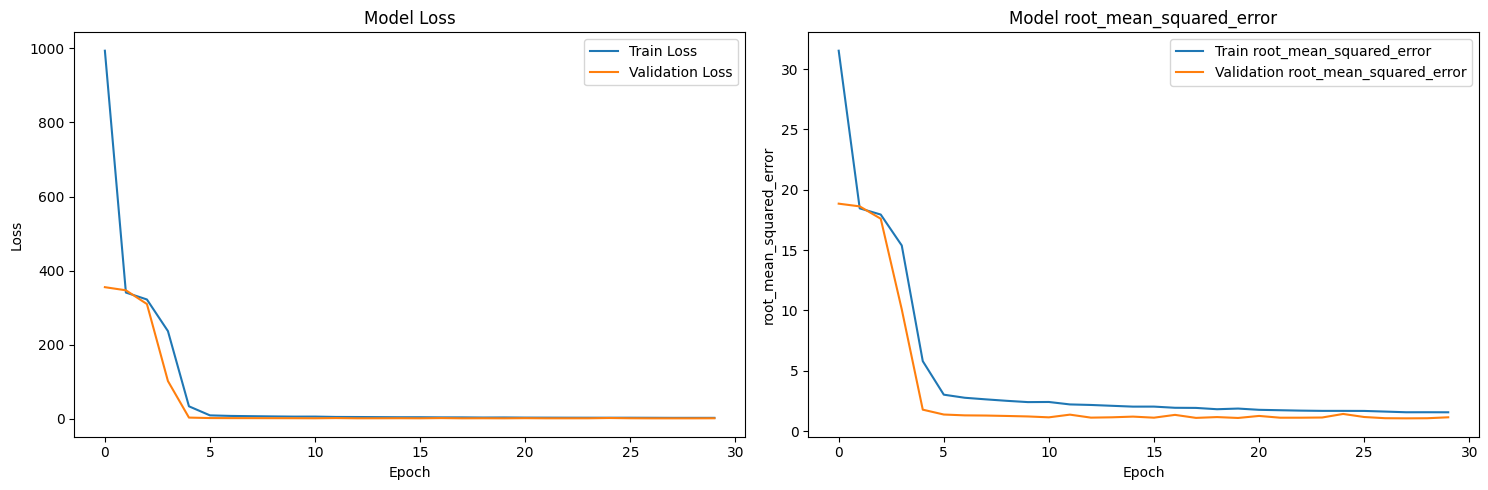

In [116]:
plot_losses(history_reg, "root_mean_squared_error", "val_root_mean_squared_error")

## Classification

In [105]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainXNN)
Eval_train = minmax.transform(X=EvalX)
y_train = TrainYClassNN - 1
y_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=14)
y_eval = EvalY['result'] - 1
y_eval = tf.keras.utils.to_categorical(y_eval, num_classes=14)
# One-hot encode the target variable (result)

def create_optimizer(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    tf.keras.layers.InputLayer(input_shape=(48462,)),
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))
    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate0))
    
    for i in range(n_layers1):
        n_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))
    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))
        
    model.add(tf.keras.layers.Dense(14, activation='softmax'))
    # Compile and train the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_one_hot, epochs=epochs, batch_size=batchsize,
              validation_split=validation_split, verbose=0, callbacks=callbacks)
    results = model.evaluate(Eval_train, y_eval, batch_size=batchsize, verbose=1, return_dict=True)
    return results['accuracy']

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=200,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

20/20 [==============================] - 0s 4ms/step - loss: 2.4133 - accuracy: 0.1402
Number of finished trials: 200
Best trial:
  Value: 0.14591246843338013
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.0008343065417337932
    activation_0: elu
    activation_1: relu
    activation_2: sigmoid
    n_layers0: 2
    n_layers1: 1
    n_layers2: 0
    batch_size: 449
    epochs: 47
    validation: 0.16310182141062926
    n0_units_l0: 272
    n0_units_l1: 26
    Dropout0: 0.10321632818004398
    n1_units_l0: 4
    Dropout1: 0.008655193852117146


In [61]:
import tensorflow as tf

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainX)
y_train = TrainYClass['result'] - 1
y_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=14)
tester = minmax.transform(X_test)
# optimizer = create_optimizer(trial)
# Define hyperparameters
learning_rate = 0.0008343065417337932
dropout_rate_1 = 0.10321632818004398
dropout_rate_2 = 0.008655193852117146
validation_split = 0.16310182141062926
epochs = 37
batch_size = 449

# Define the model structure in a function for reproducibility and flexibility
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(272, activation='elu'),
        tf.keras.layers.Dense(26, activation='elu'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(14, activation='softmax')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history_all = model.fit(X_train, 
                    y_one_hot, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=validation_split, 
                    verbose=1)

results = model.predict(tester,verbose=1)
results = np.argmax(results,axis=1)+1
print(classification_report(TestYClass['result'],np.rint(results)))
BettingResults(results)

Epoch 1/37
113/113 [==============================] - 1s 7ms/step - loss: 2.6158 - accuracy: 0.0899 - val_loss: 2.5946 - val_accuracy: 0.1007
Epoch 2/37
113/113 [==============================] - 1s 5ms/step - loss: 2.5672 - accuracy: 0.1041 - val_loss: 2.5306 - val_accuracy: 0.1105
Epoch 3/37
113/113 [==============================] - 1s 5ms/step - loss: 2.5138 - accuracy: 0.1152 - val_loss: 2.4857 - val_accuracy: 0.1225
Epoch 4/37
113/113 [==============================] - 1s 5ms/step - loss: 2.4783 - accuracy: 0.1181 - val_loss: 2.4625 - val_accuracy: 0.1226
Epoch 5/37
113/113 [==============================] - 1s 6ms/step - loss: 2.4618 - accuracy: 0.1217 - val_loss: 2.4497 - val_accuracy: 0.1216
Epoch 6/37
113/113 [==============================] - 1s 6ms/step - loss: 2.4524 - accuracy: 0.1238 - val_loss: 2.4406 - val_accuracy: 0.1290
Epoch 7/37
113/113 [==============================] - 1s 6ms/step - loss: 2.4478 - accuracy: 0.1278 - val_loss: 2.4364 - val_accuracy: 0.1328
Epoch 

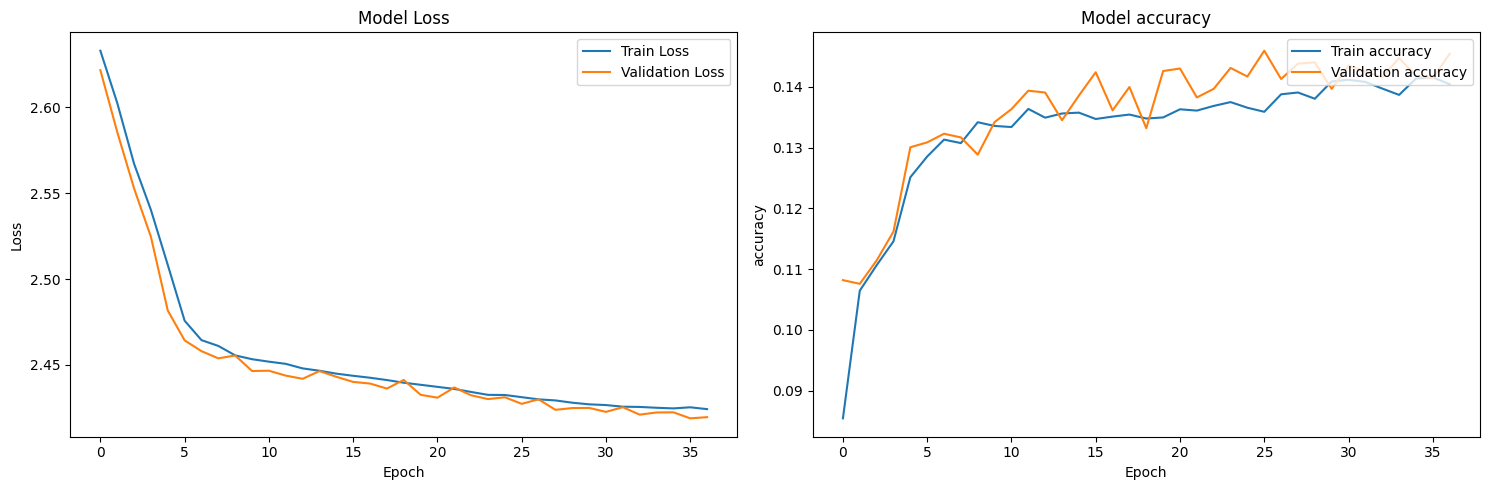

In [133]:
plot_losses(history_all, "accuracy", "val_accuracy")

In [61]:
X_train = TrainXNN
y_train = TrainYOVANN
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=X_train)
# One-hot encode the target variable (result)

X_eval = minmax.transform(EvalX)

def create_optimizer(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))
    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate0))
    
    for i in range(n_layers1):
        n_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))
    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # Compile and train the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize,
              validation_split=validation_split, verbose=0, callbacks=callbacks)
    results = model.evaluate(X_eval, EvalYOVA, batch_size=batchsize, verbose=1, return_dict=True)
    return results['auc']

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=200,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

76/76 [==============================] - 0s 4ms/step - loss: 0.2428 - auc: 0.7806
Number of finished trials: 200
Best trial:
  Value: 0.7849088907241821
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.000379373290269667
    activation_0: elu
    activation_1: elu
    activation_2: relu
    n_layers0: 3
    n_layers1: 0
    n_layers2: 3
    batch_size: 573
    epochs: 36
    validation: 0.1274637378184694
    n0_units_l0: 433
    n0_units_l1: 5
    n0_units_l2: 121
    Dropout0: 0.24762509547813696
    Dropout1: 0.1997904632821083
    n2_units_l0: 21
    n2_units_l1: 8
    n2_units_l2: 260


In [119]:
import tensorflow as tf

X_train = TrainXNN
y_train = TrainYOVANN
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)

max_placement = y_train.max()

learning_rate = 0.0008343065417337932
dropout_rate_1 = 0.1740239700984295
dropout_rate_2 = 0.10362363673596568
validation_split = 0.29948534027728146
epochs = 13
batch_size = 116

# Define the model structure in a function for reproducibility and flexibility
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(123, activation='elu'),
        tf.keras.layers.Dense(4, activation='elu'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dense(69, activation='relu'),
        tf.keras.layers.Dense(49, activation='elu'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(37, activation='elu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy', 
              metrics=['AUC'])

history_ova = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=validation_split, 
                    verbose=1)

xtest = minmax.transform(X_test)
results = model.predict(xtest,verbose=1)
print(classification_report(TestYClassOVA,np.rint(results)))
print(roc_auc_score(TestYClassOVA,results))

Epoch 1/13
293/293 [==============================] - 3s 9ms/step - loss: 0.2787 - auc: 0.6308 - val_loss: 0.2545 - val_auc: 0.7391
Epoch 2/13
293/293 [==============================] - 3s 9ms/step - loss: 0.2517 - auc: 0.7358 - val_loss: 0.2509 - val_auc: 0.7662
Epoch 3/13
293/293 [==============================] - 3s 11ms/step - loss: 0.2475 - auc: 0.7532 - val_loss: 0.2423 - val_auc: 0.7758
Epoch 4/13
293/293 [==============================] - 3s 9ms/step - loss: 0.2460 - auc: 0.7593 - val_loss: 0.2439 - val_auc: 0.7740
Epoch 5/13
293/293 [==============================] - 3s 9ms/step - loss: 0.2440 - auc: 0.7673 - val_loss: 0.2465 - val_auc: 0.7755
Epoch 6/13
293/293 [==============================] - 3s 9ms/step - loss: 0.2430 - auc: 0.7703 - val_loss: 0.2461 - val_auc: 0.7756
Epoch 7/13
293/293 [==============================] - 3s 9ms/step - loss: 0.2432 - auc: 0.7689 - val_loss: 0.2398 - val_auc: 0.7820
Epoch 8/13
293/293 [==============================] - 3s 9ms/step - loss: 0

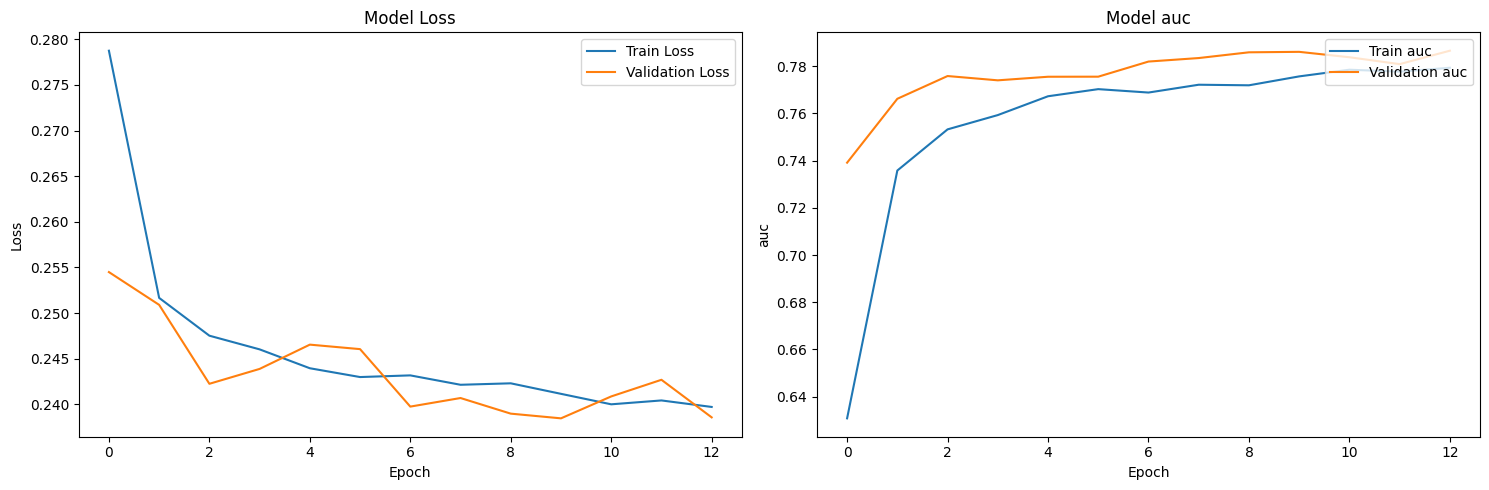

In [120]:
plot_losses(history_ova, "auc","val_auc")

In [92]:
X_train = TrainXOVABalancedNN
y_train = TrainYOVABalancedNN
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=X_train)
# One-hot encode the target variable (result)

X_eval = minmax.transform(EvalX)

def create_optimizer(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))
    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate0))
    
    for i in range(n_layers1):
        n_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))
    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # Compile and train the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize,
              validation_data=(X_eval, EvalYOVA), verbose=0, callbacks=callbacks)
    return np.mean(history.history['val_auc'])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=200,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

Number of finished trials: 200
Best trial:
  Value: 0.9697861496995135
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.0005065829820800355
    activation_0: relu
    activation_1: selu
    activation_2: sigmoid
    n_layers0: 2
    n_layers1: 1
    n_layers2: 0
    batch_size: 175
    epochs: 41
    validation: 0.3812671905643616
    n0_units_l0: 632
    n0_units_l1: 691
    Dropout0: 0.10242356023789509
    n1_units_l0: 96
    Dropout1: 0.16882025955633662


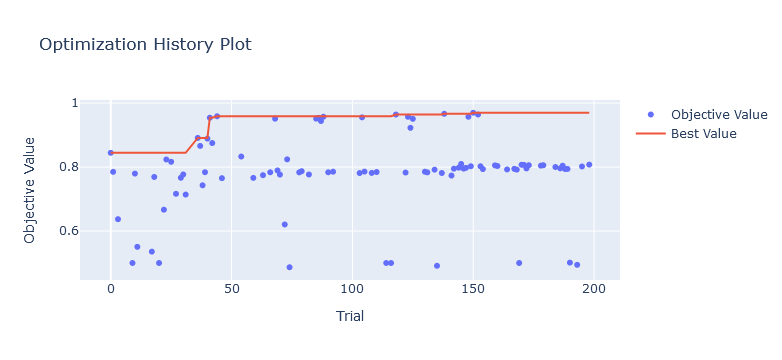

In [93]:
optuna.visualization.plot_optimization_history(study)

In [107]:
study.trials[142].params

{'optimizer': 'Adam',
 'adam_learning_rate': 0.0037028682053881173,
 'activation_0': 'relu',
 'activation_1': 'sigmoid',
 'activation_2': 'selu',
 'n_layers0': 2,
 'n_layers1': 2,
 'n_layers2': 2,
 'batch_size': 504,
 'epochs': 21,
 'validation': 0.0725017553406844,
 'n0_units_l0': 15,
 'n0_units_l1': 45,
 'Dropout0': 0.09727394897828079,
 'n1_units_l0': 61,
 'n1_units_l1': 16,
 'Dropout1': 0.20690660894611193,
 'n2_units_l0': 168,
 'n2_units_l1': 129}

In [102]:
TrainXOVABalancedNN.shape

(83586, 104)

In [108]:
import tensorflow as tf

X_train = TrainXOVABalancedNN
y_train = TrainYOVABalancedNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# One-hot encode the target variable (result)
max_placement = y_train.max()
X_eval = minmax.transform(EvalX)

learning_rate = 0.0037028682053881173
dropout_rate_1 = 0.09727394897828079
dropout_rate_2 = 0.20690660894611193
validation_split = 0.0725017553406844
epochs = 21
batch_size = 504

# Define the model structure in a function for reproducibility and flexibility
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(104,)),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(45, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dense(61, activation='sigmoid'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(168, activation='selu'),
        tf.keras.layers.Dense(129, activation='selu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy', 
              metrics=['AUC'])

history_bal = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_eval, EvalYOVA),
                    verbose=1)

xtest = minmax.transform(X_test)
results = model.predict(xtest,verbose=1)
print(classification_report(TestYClassOVA,np.rint(results)))
print(roc_auc_score(TestYClassOVA,results))

Epoch 1/21
166/166 [==============================] - 2s 10ms/step - loss: 0.6465 - auc: 0.6681 - val_loss: 0.3999 - val_auc: 0.7361
Epoch 2/21
166/166 [==============================] - 1s 9ms/step - loss: 0.5636 - auc: 0.7747 - val_loss: 0.3592 - val_auc: 0.7072
Epoch 3/21
166/166 [==============================] - 2s 9ms/step - loss: 0.5527 - auc: 0.7861 - val_loss: 0.3698 - val_auc: 0.6858
Epoch 4/21
166/166 [==============================] - 2s 9ms/step - loss: 0.5449 - auc: 0.7930 - val_loss: 0.3391 - val_auc: 0.6590
Epoch 5/21
166/166 [==============================] - 1s 9ms/step - loss: 0.5393 - auc: 0.7975 - val_loss: 0.3071 - val_auc: 0.6423
Epoch 6/21
166/166 [==============================] - 2s 9ms/step - loss: 0.5356 - auc: 0.8002 - val_loss: 0.3495 - val_auc: 0.6144
Epoch 7/21
166/166 [==============================] - 2s 9ms/step - loss: 0.5301 - auc: 0.8043 - val_loss: 0.3050 - val_auc: 0.5905
Epoch 8/21
166/166 [==============================] - 2s 9ms/step - loss: 0

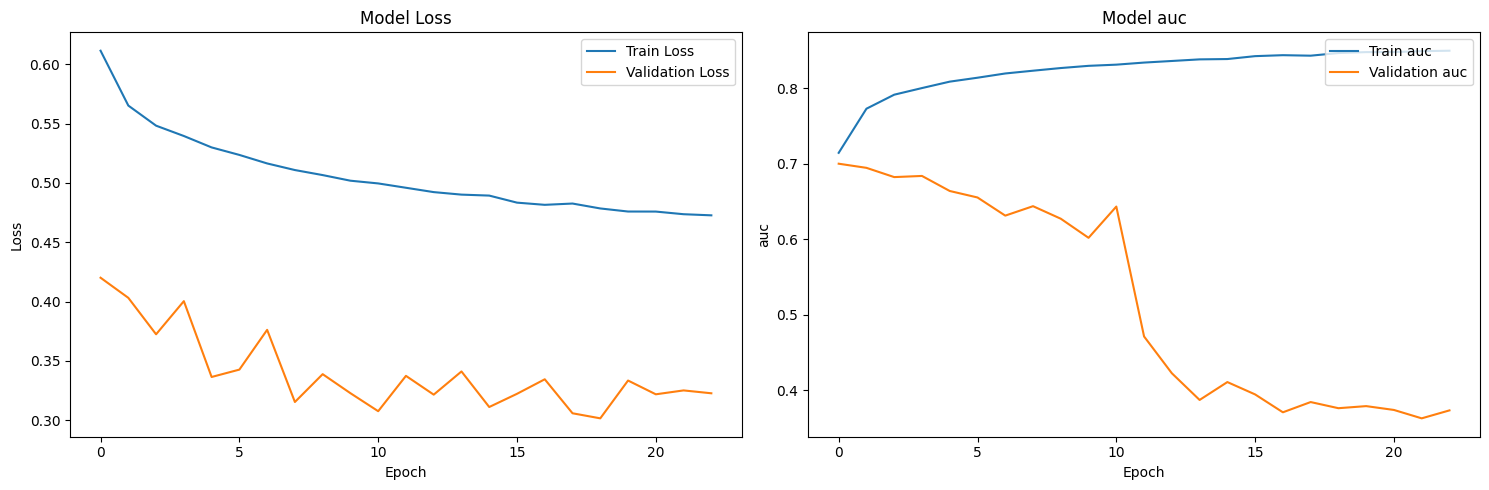

In [106]:
plot_losses(history_bal, 'auc','val_auc')

This is an expected result, given that the model's training data comes from a distinct distribution due to the oversampling of winners. The model quickly adjusts to the characteristics of the training distribution, resulting in significantly inferior performance on the validation set. This contrasts with other models where validation and training losses and metrics exhibit similar trends.